<h1>Import Libraries</h1>

In [1]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
sb.set(font_scale=1.5)
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
from itertools import combinations

In [2]:
import warnings
warnings.filterwarnings('ignore') # to ignore warnings

<h2>Data Loading</h2>

In [3]:
df_math = pd.read_csv("student-mat.csv")
df_math

school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M   20       U     LE3       A     2     2  services  services   
391     MS   M   17       U     LE3       T     3     1  services  services   
392     MS   M   21       R     GT3       T     1     1     other     other   
393     MS   M   18       R     LE3       T     3     2  services     other   
394     MS   M   19       U     LE3       T     1     1     other   at_home   

     ... famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0    ...      4        3      4     1     1      3        6   5   6   6  
1    ...      5        3      3     1     1      3        4   5   5   6  
2    ...      4        3      2     2     3      3       10   7   8  10  
3    ...      3        2      2     1     1      5        2  15  14  15  
4    ...      4        3      2     1     2      5        4   6  10  10  
..   ...    ...      ...    ...   ...   ...    ...      ...  ..  ..  ..  
390  ...      5        5      4     4     5      4       11   9   9   9  
391  ...      2        4      5     3     4      2        3  14  16  16  
392  ...      5        5      3     3     3      3        3  10   8   7  
393  ...      4        4      1     3     4      5        0  11  12  10  
394  ...      3        2      3     3     3      5        5   8   9   9  

[395 rows x 33 columns]

In [4]:
df_por = pd.read_csv("student-por.csv")
df_por

school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
644     MS   F   19       R     GT3       T     2     3  services     other   
645     MS   F   18       U     LE3       T     3     1   teacher  services   
646     MS   F   18       U     GT3       T     1     1     other     other   
647     MS   M   17       U     LE3       T     3     1  services  services   
648     MS   M   18       R     LE3       T     3     2  services     other   

     ... famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0    ...      4        3      4     1     1      3        4   0  11  11  
1    ...      5        3      3     1     1      3        2   9  11  11  
2    ...      4        3      2     2     3      3        6  12  13  12  
3    ...      3        2      2     1     1      5        0  14  14  14  
4    ...      4        3      2     1     2      5        0  11  13  13  
..   ...    ...      ...    ...   ...   ...    ...      ...  ..  ..  ..  
644  ...      5        4      2     1     2      5        4  10  11  10  
645  ...      4        3      4     1     1      1        4  15  15  16  
646  ...      1        1      1     1     1      5        6  11  12   9  
647  ...      2        4      5     3     4      2        6  10  10  10  
648  ...      4        4      1     3     4      5        4  10  11  11  

[649 rows x 33 columns]

<h3>Pre-Processing</h3>

In [5]:
renameCol = {
    'school': 'School',
    'sex': 'Sex',
    'address': 'Address',
    'famsize': 'FamilySize',
    'Pstatus': 'ParentsCohab',
    'Mjob': 'MotherJob',
    'Fjob': 'FatherJob',
    'reason': 'Reason',
    'guardian': 'Guardian',
    'schoolsup': 'SchoolSup',
    'famsup': 'FamSup',
    'paid': 'Paid',
    'activities': 'Activities',
    'nursery': 'Nursery',
    'higher': 'Higher',
    'internet': 'Internet',
    'romantic': 'Romantic',
    'age': 'Age',
    'Medu': 'MotherEdu',
    'Fedu': 'FatherEdu',
    'traveltime': 'TravelTime',
    'studytime': 'StudyTime',
    'failures': 'Failures',
    'famrel': 'FamRelation',
    'freetime': 'FreeTime',
    'goout': 'GoOut',
    'Dalc': 'WorkdayAlc',
    'Walc': 'WeekendAlc',
    'health': 'Health',
    'absences': 'Absences',
    'G1': 'FirstGrade',
    'G2': 'SecondGrade',
    'G3': 'FinalGrade'
}

df_math = df_math.rename(columns=renameCol)
df_por = df_por.rename(columns=renameCol)

In [6]:
df_math.info()
print("\n\n")
df_por.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   School        395 non-null    object
 1   Sex           395 non-null    object
 2   Age           395 non-null    int64 
 3   Address       395 non-null    object
 4   FamilySize    395 non-null    object
 5   ParentsCohab  395 non-null    object
 6   MotherEdu     395 non-null    int64 
 7   FatherEdu     395 non-null    int64 
 8   MotherJob     395 non-null    object
 9   FatherJob     395 non-null    object
 10  Reason        395 non-null    object
 11  Guardian      395 non-null    object
 12  TravelTime    395 non-null    int64 
 13  StudyTime     395 non-null    int64 
 14  Failures      395 non-null    int64 
 15  SchoolSup     395 non-null    object
 16  FamSup        395 non-null    object
 17  Paid          395 non-null    object
 18  Activities    395 non-null    object
 19  Nursery 

In [7]:
df_mathSumm = df_math.describe()
df_porSumm = df_por.describe()

df_mathSumm, df_porSumm 

(              Age   MotherEdu   FatherEdu  TravelTime   StudyTime    Failures  \
 count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
 mean    16.696203    2.749367    2.521519    1.448101    2.035443    0.334177   
 std      1.276043    1.094735    1.088201    0.697505    0.839240    0.743651   
 min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
 25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
 50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
 75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
 max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   
 
        FamRelation    FreeTime       GoOut  WorkdayAlc  WeekendAlc  \
 count   395.000000  395.000000  395.000000  395.000000  395.000000   
 mean      3.944304    3.235443    3.108861    1.481013    2.291139   
 std       0.896659    0.998862    1.113278    

<h4>StumatSummary</h4>
Age - average: 16.7, std: 1.28 <br>
Medu, Fedu - median around 3, about secondary education <br>
Absences - average: 5, max: 75 <br>
Grades - average: 10-11, std: 3-4.5 (variation in performance) <br>

<h4>StuporSummary</h4>
Age - average: 16.7, std: 1.22 <br>
Medu, Fedu - median around 2, about 5th to 9th grade <br>
Absences - average: 3, max: 32 <br>
Grades - average: 11, std: 2-3 (variation in performance) <br>

<h4>Obtain pure numeric and categorical dataframe</h4>

In [8]:
numVar = ['Age', 'MotherEdu', 'FatherEdu', 'TravelTime', 'StudyTime', 'Failures', 'FamRelation', 'FreeTime', 'GoOut', 'WorkdayAlc', 'WeekendAlc', 'Health', 'Absences', 'FirstGrade', 'SecondGrade', 'FinalGrade']

catVar = ['School', 'Sex', 'Address', 'FamilySize', 'ParentsCohab', 'MotherJob', 'FatherJob', 'Reason', 'Guardian', 'SchoolSup', 'FamSup', 'Paid', 'Activities', 'Nursery', 'Higher', 'Internet', 'Romantic']

<h4>Helper Functions</h4>

In [9]:
def detect_outlier(data):
    # find q1 and q3 values
    q1, q3 = np.percentile(sorted(data), [25, 75])
 
    # compute IQR
    iqr = q3 - q1
 
    # find lower and upper bounds
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
 
    outliers = [x for x in data if x <= lower_bound or x >= upper_bound]
 
    return len(outliers)

<h2>Math Dataset</h2>

<h3>Numerical Columns Analysis</h3>

In [10]:
df_mathNum = df_math[numVar]
df_mathNum

Age  MotherEdu  FatherEdu  TravelTime  StudyTime  Failures  FamRelation  \
0     18          4          4           2          2         0            4   
1     17          1          1           1          2         0            5   
2     15          1          1           1          2         3            4   
3     15          4          2           1          3         0            3   
4     16          3          3           1          2         0            4   
..   ...        ...        ...         ...        ...       ...          ...   
390   20          2          2           1          2         2            5   
391   17          3          1           2          1         0            2   
392   21          1          1           1          1         3            5   
393   18          3          2           3          1         0            4   
394   19          1          1           1          1         0            3   

     FreeTime  GoOut  WorkdayAlc  WeekendAlc  Health  Absences  FirstGrade  \
0           3      4           1           1       3         6           5   
1           3      3           1           1       3         4           5   
2           3      2           2           3       3        10           7   
3           2      2           1           1       5         2          15   
4           3      2           1           2       5         4           6   
..        ...    ...         ...         ...     ...       ...         ...   
390         5      4           4           5       4        11           9   
391         4      5           3           4       2         3          14   
392         5      3           3           3       3         3          10   
393         4      1           3           4       5         0          11   
394         2      3           3           3       5         5           8   

     SecondGrade  FinalGrade  
0              6           6  
1              5           6  
2              8          10  
3             14          15  
4             10          10  
..           ...         ...  
390            9           9  
391           16          16  
392            8           7  
393           12          10  
394            9           9  

[395 rows x 16 columns]

In [11]:
df_mathNum.describe()

Age   MotherEdu   FatherEdu  TravelTime   StudyTime    Failures  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean    16.696203    2.749367    2.521519    1.448101    2.035443    0.334177   
std      1.276043    1.094735    1.088201    0.697505    0.839240    0.743651   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

       FamRelation    FreeTime       GoOut  WorkdayAlc  WeekendAlc  \
count   395.000000  395.000000  395.000000  395.000000  395.000000   
mean      3.944304    3.235443    3.108861    1.481013    2.291139   
std       0.896659    0.998862    1.113278    0.890741    1.287897   
min       1.000000    1.000000    1.000000    1.000000    1.000000   
25%       4.000000    3.000000    2.000000    1.000000    1.000000   
50%       4.000000    3.000000    3.000000    1.000000    2.000000   
75%       5.000000    4.000000    4.000000    2.000000    3.000000   
max       5.000000    5.000000    5.000000    5.000000    5.000000   

           Health    Absences  FirstGrade  SecondGrade  FinalGrade  
count  395.000000  395.000000  395.000000   395.000000  395.000000  
mean     3.554430    5.708861   10.908861    10.713924   10.415190  
std      1.390303    8.003096    3.319195     3.761505    4.581443  
min      1.000000    0.000000    3.000000     0.000000    0.000000  
25%      3.000000    0.000000    8.000000     9.000000    8.000000  
50%      4.000000    4.000000   11.000000    11.000000   11.000000  
75%      5.000000    8.000000   13.000000    13.000000   14.000000  
max      5.000000   75.000000   19.000000    19.000000   20.000000

Travel time: (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour) <br>
Failures: number of past class failures (numeric: n if 1<=n<3, else 4)

<h4>Response Variable - FinalGrade</h4>

In [12]:
df_mathNum['FinalGrade'].describe()

count    395.000000
mean      10.415190
std        4.581443
min        0.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: FinalGrade, dtype: float64

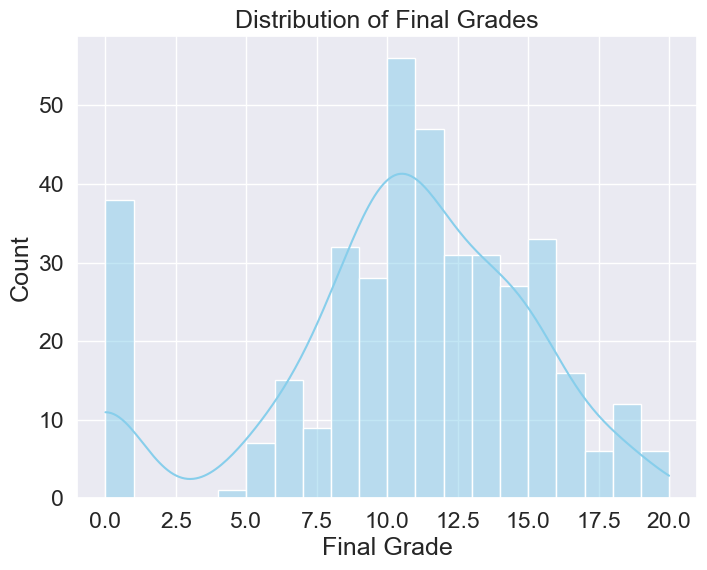

In [13]:
plt.figure(figsize=(8, 6))
sb.histplot(data=df_mathNum, x='FinalGrade', bins=20, kde=True, color='skyblue')
plt.xlabel('Final Grade')
plt.ylabel('Count')
plt.title('Distribution of Final Grades')
plt.show()

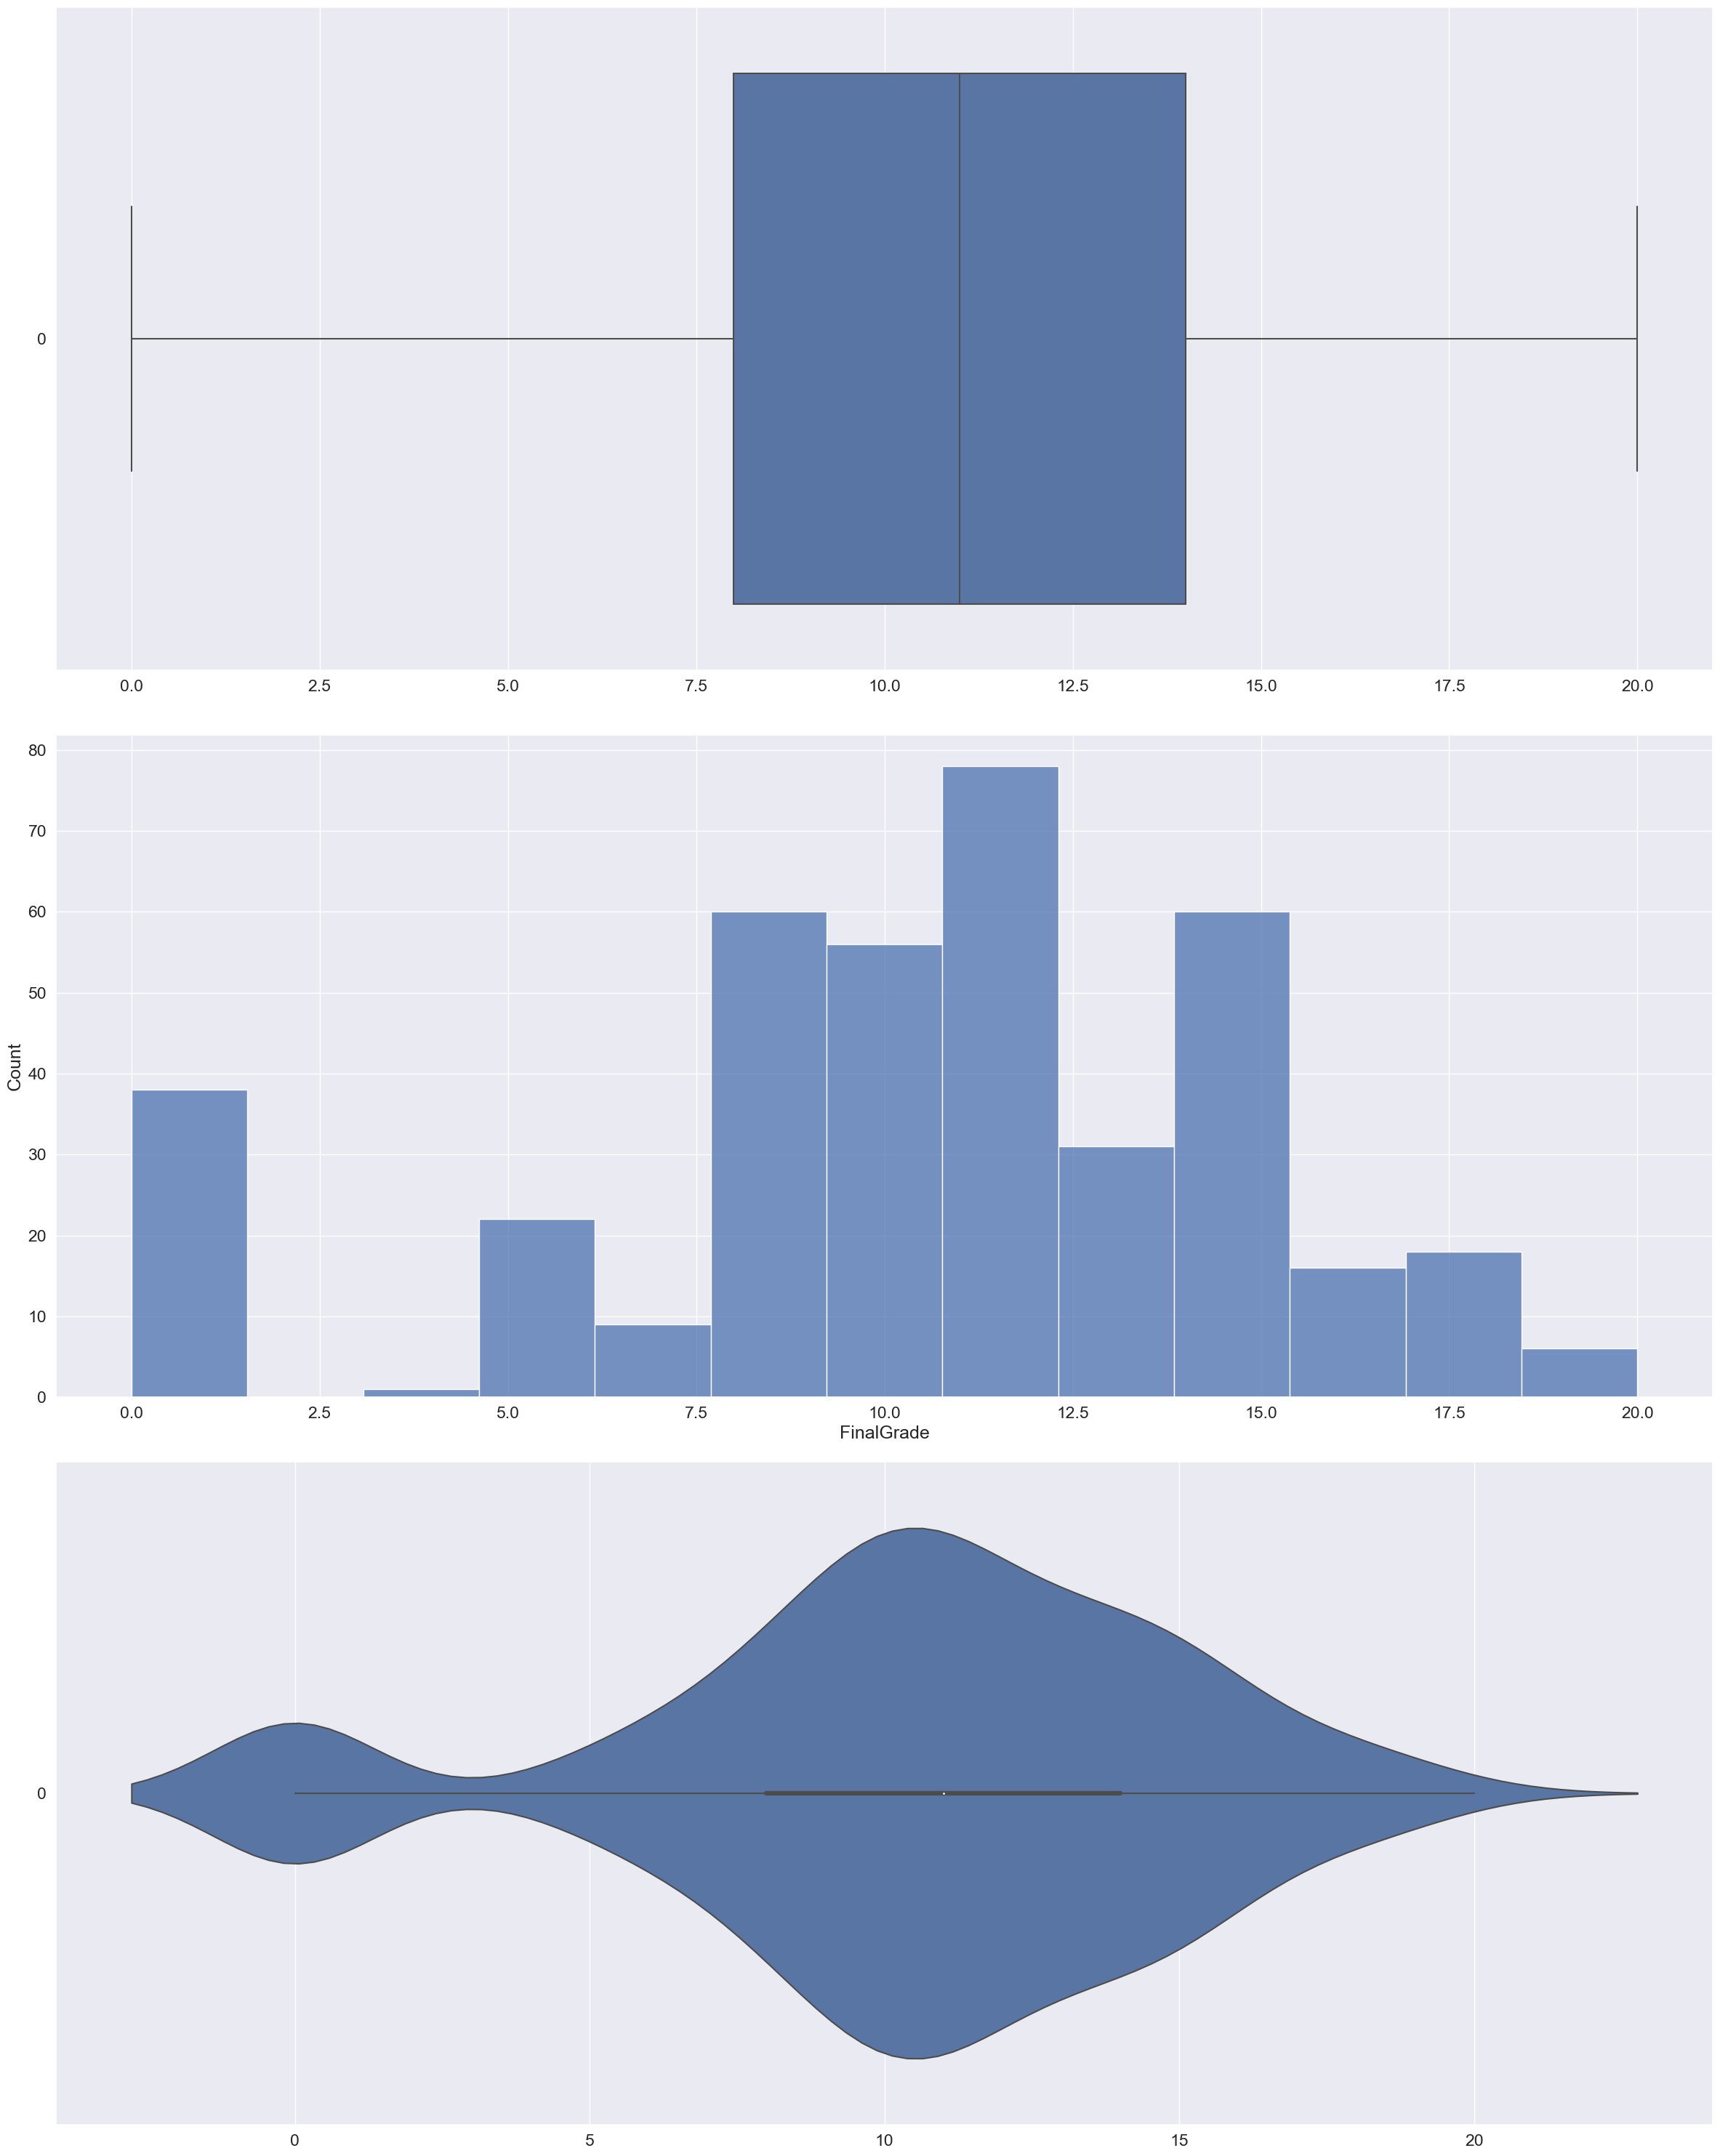

In [14]:
fig, axs = plt.subplots(3, 1, figsize=(24, 30))

# Boxplot
sb.boxplot(data=df_mathNum['FinalGrade'], orient="h", ax=axs[0])

# Histogram
sb.histplot(data=df_mathNum['FinalGrade'], ax=axs[1])

# Violin plot
sb.violinplot(data=df_mathNum['FinalGrade'], orient="h", ax=axs[2])

plt.tight_layout()
plt.show()


FinalGrade has a central tendency with mean being 10.4 <br>
The spread of grades is wide, from low to high values (0-20)

<h4>Predictors</h4>

In [15]:
for column in df_mathNum.columns:
    outliers_count = detect_outlier(df_mathNum[column])
    skew_count = df_mathNum[column].skew()
    
    print(f"{column} Outlier: {outliers_count}")
    print(f"{column} Skewness: {skew_count}")
    print()

Age Outlier: 2
Age Skewness: 0.46627016141836425

MotherEdu Outlier: 0
MotherEdu Skewness: -0.31838068845785517

FatherEdu Outlier: 2
FatherEdu Skewness: -0.03167209443510635

TravelTime Outlier: 8
TravelTime Skewness: 1.6070291037557645

StudyTime Outlier: 27
StudyTime Skewness: 0.6321422002561792

Failures Outlier: 395
Failures Skewness: 2.38702572387036

FamRelation Outlier: 26
FamRelation Skewness: -0.951881690060932

FreeTime Outlier: 19
FreeTime Skewness: -0.16335075302040777

GoOut Outlier: 0
GoOut Skewness: 0.11650241685363202

WorkdayAlc Outlier: 18
WorkdayAlc Skewness: 2.190761845462348

WeekendAlc Outlier: 0
WeekendAlc Skewness: 0.6119599829215362

Health Outlier: 0
Health Skewness: -0.49460356816790363

Absences Outlier: 19
Absences Skewness: 3.6715789504758862

FirstGrade Outlier: 0
FirstGrade Skewness: 0.24061324337096948

SecondGrade Outlier: 16
SecondGrade Skewness: -0.4316453889925487

FinalGrade Outlier: 0
FinalGrade Skewness: -0.7326723530443435



TravelTime, Failures, WorkdayAlc, Absences have high positive skewness <br>
Numerical variables with a positive skewness value indicates that the distribution has a longer right tail, meaning there are more extreme values on the right side of the distribution than the left <br>

On the other hand, FamilyRelation and FinalGrade have high negative skewness <br>

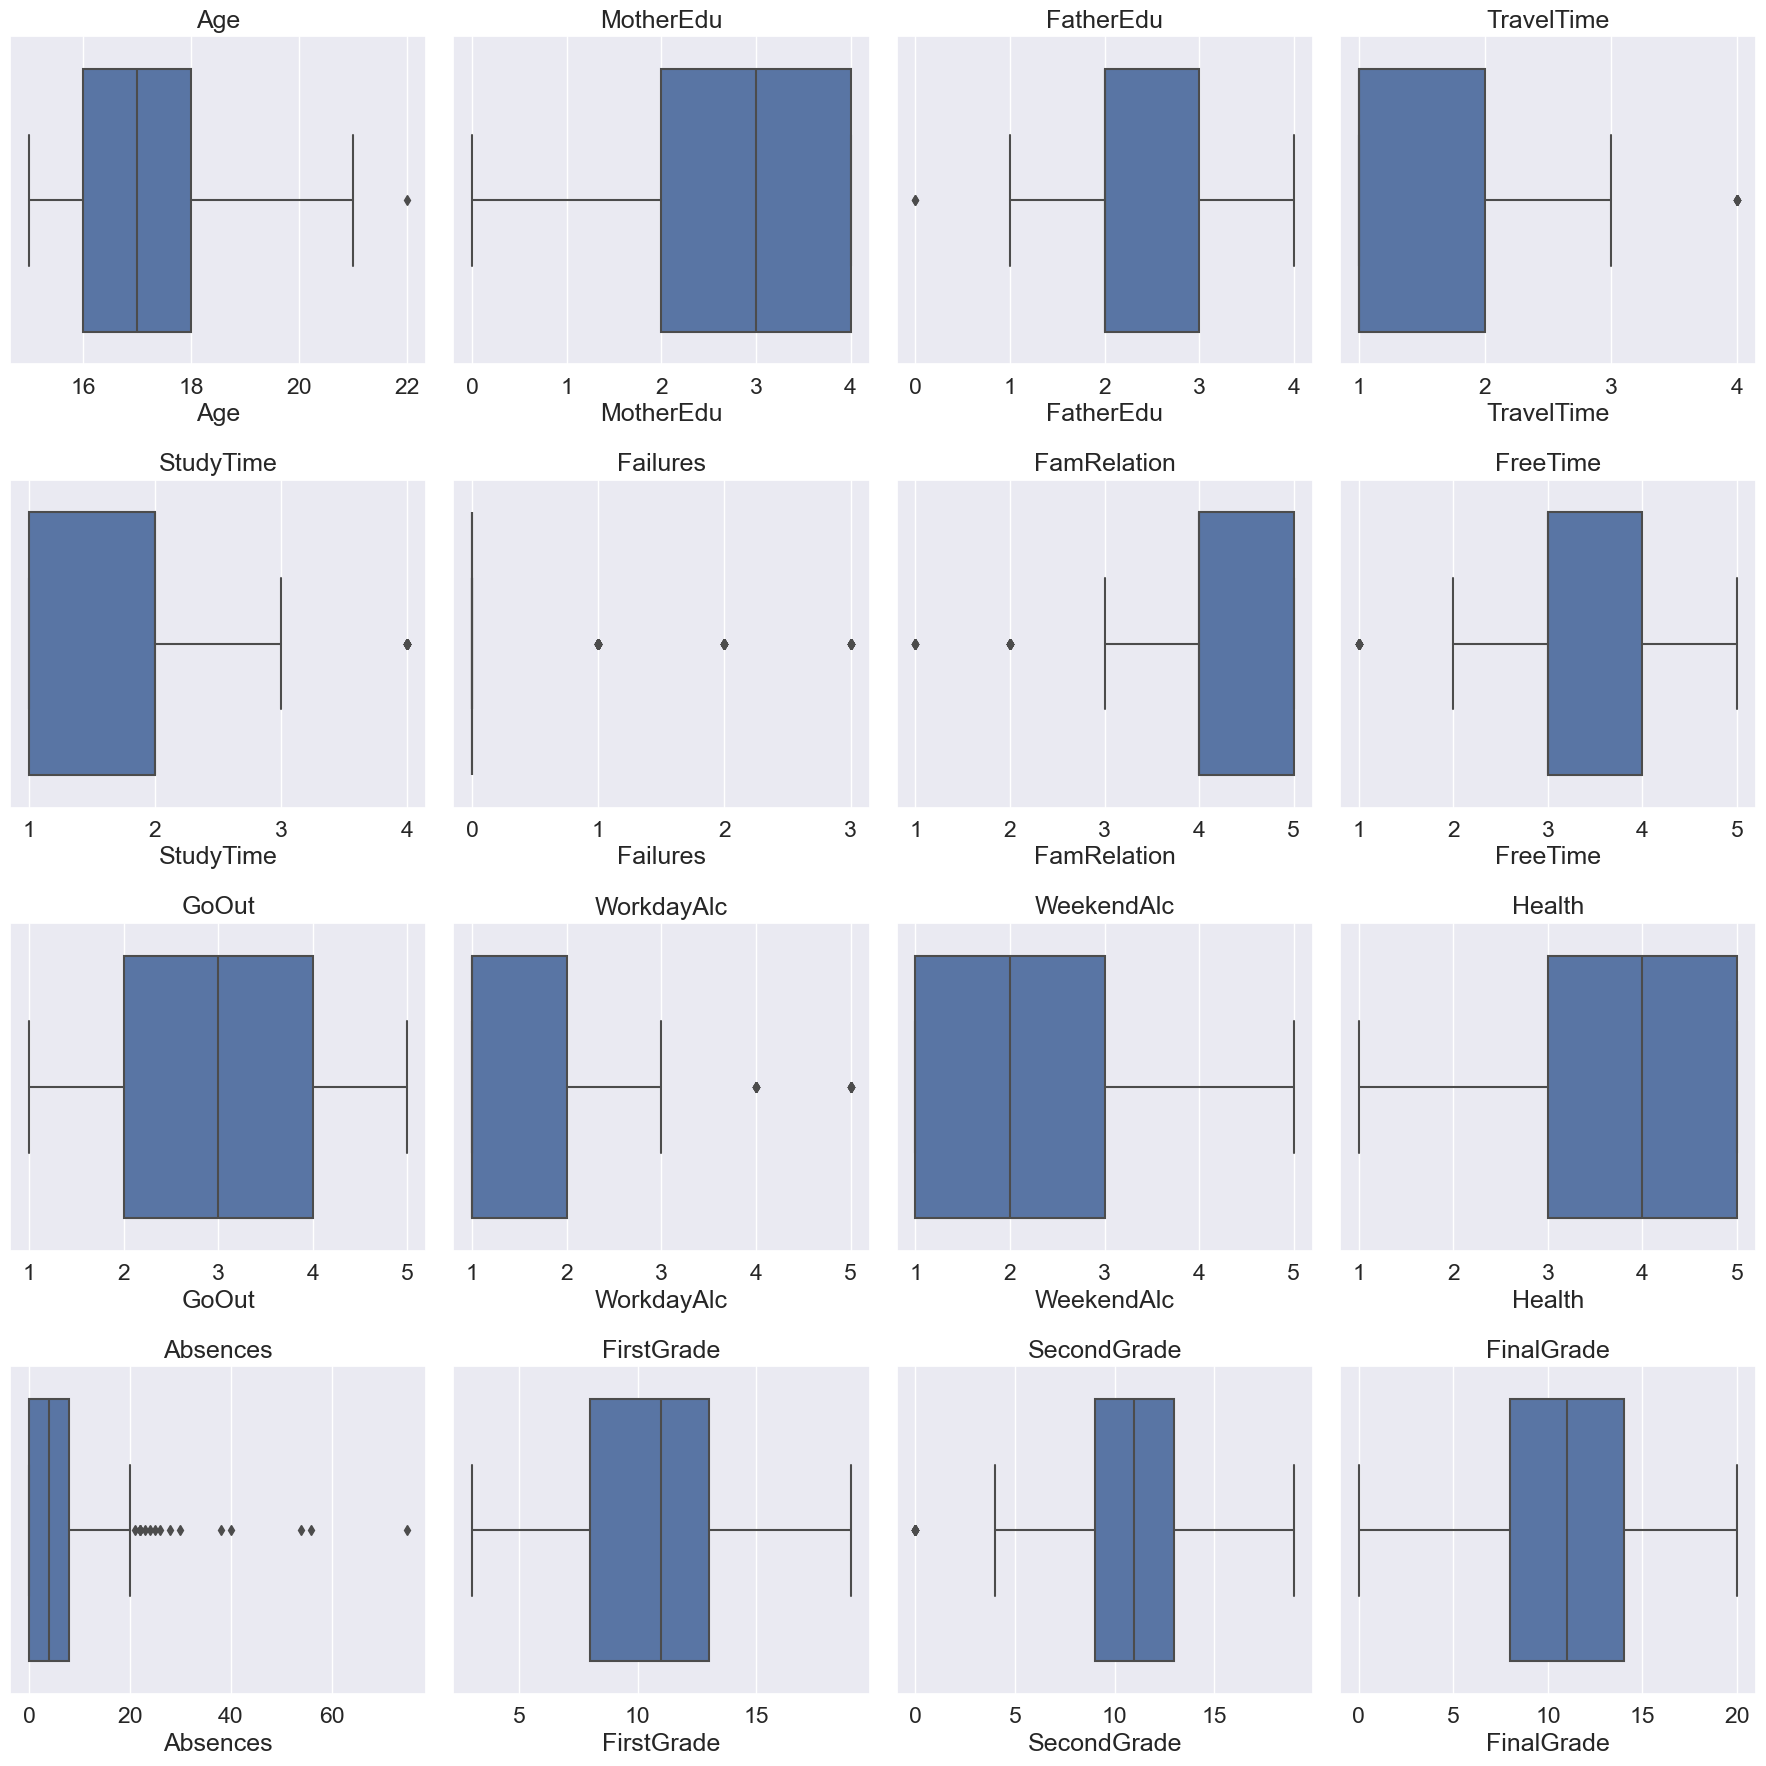

In [16]:
f, axes = plt.subplots(4, 4, figsize=(18, 18))

axes_positions = [(i, j) for i in range(4) for j in range(4)]

for column, pos in zip(df_mathNum.columns, axes_positions):
    ax = sb.boxplot(x=df_mathNum[column], ax=axes[pos]) #showfliers = true
    ax.set_title(column)

plt.tight_layout()
plt.show()

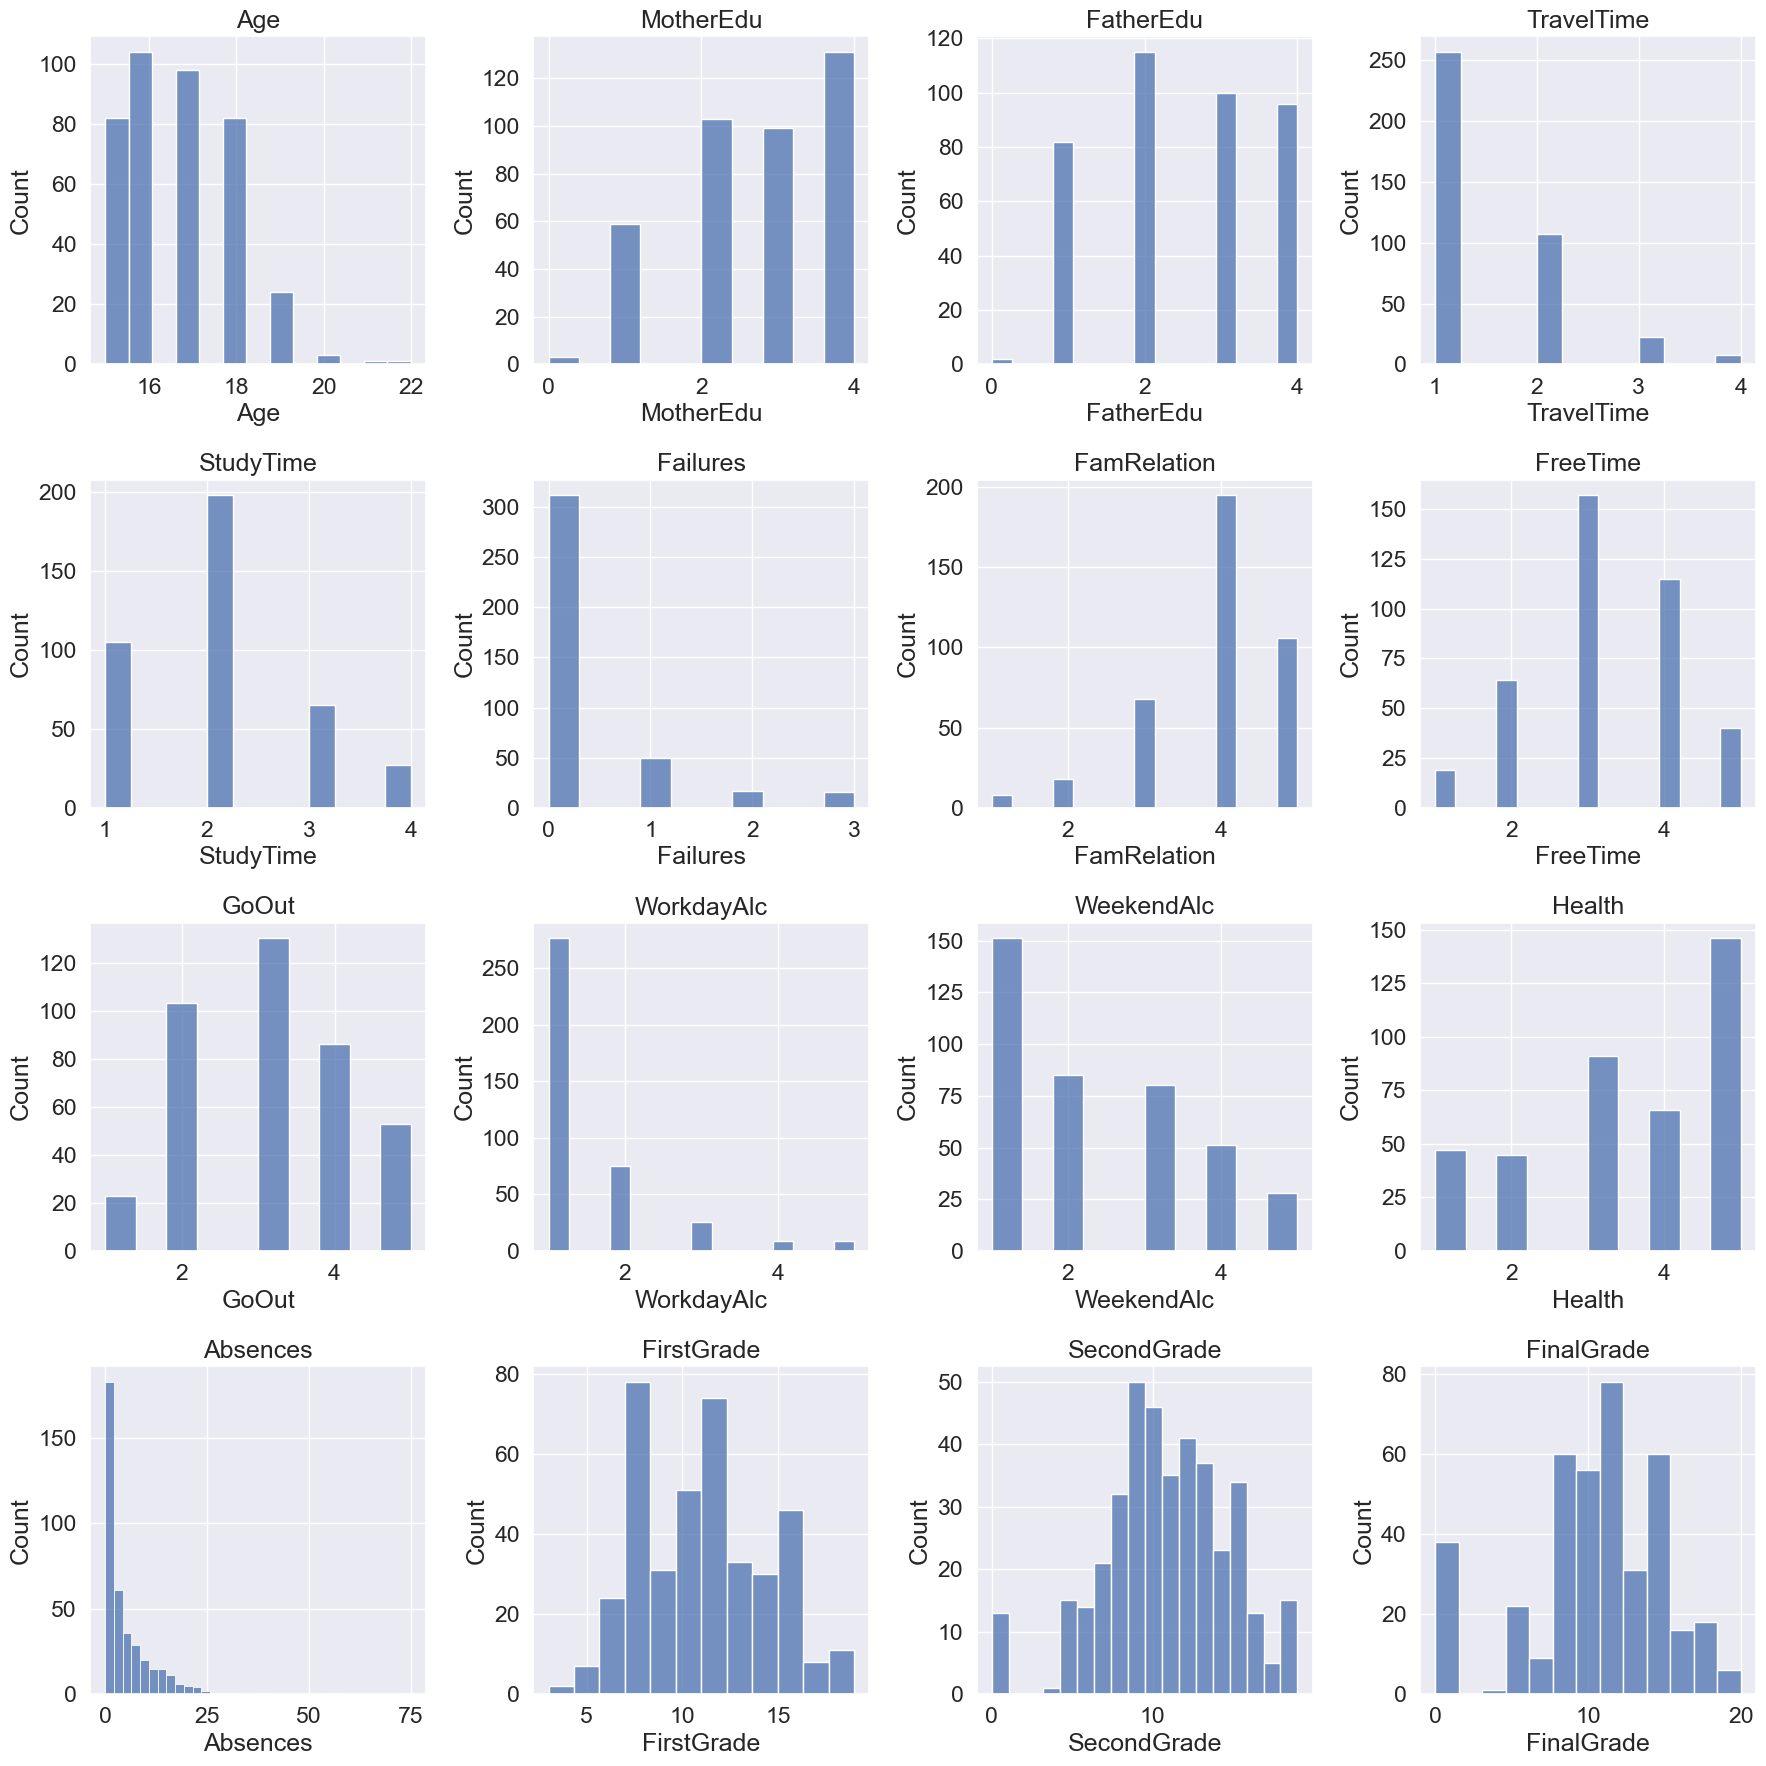

In [17]:
f, axes = plt.subplots(4, 4, figsize=(18, 18))

axes_positions = [(i, j) for i in range(4) for j in range(4)]

for column, pos in zip(df_mathNum.columns, axes_positions):
    ax = sb.histplot(x=df_mathNum[column], ax=axes[pos]) #showfliers = true
    ax.set_title(column)

plt.tight_layout()
plt.show()

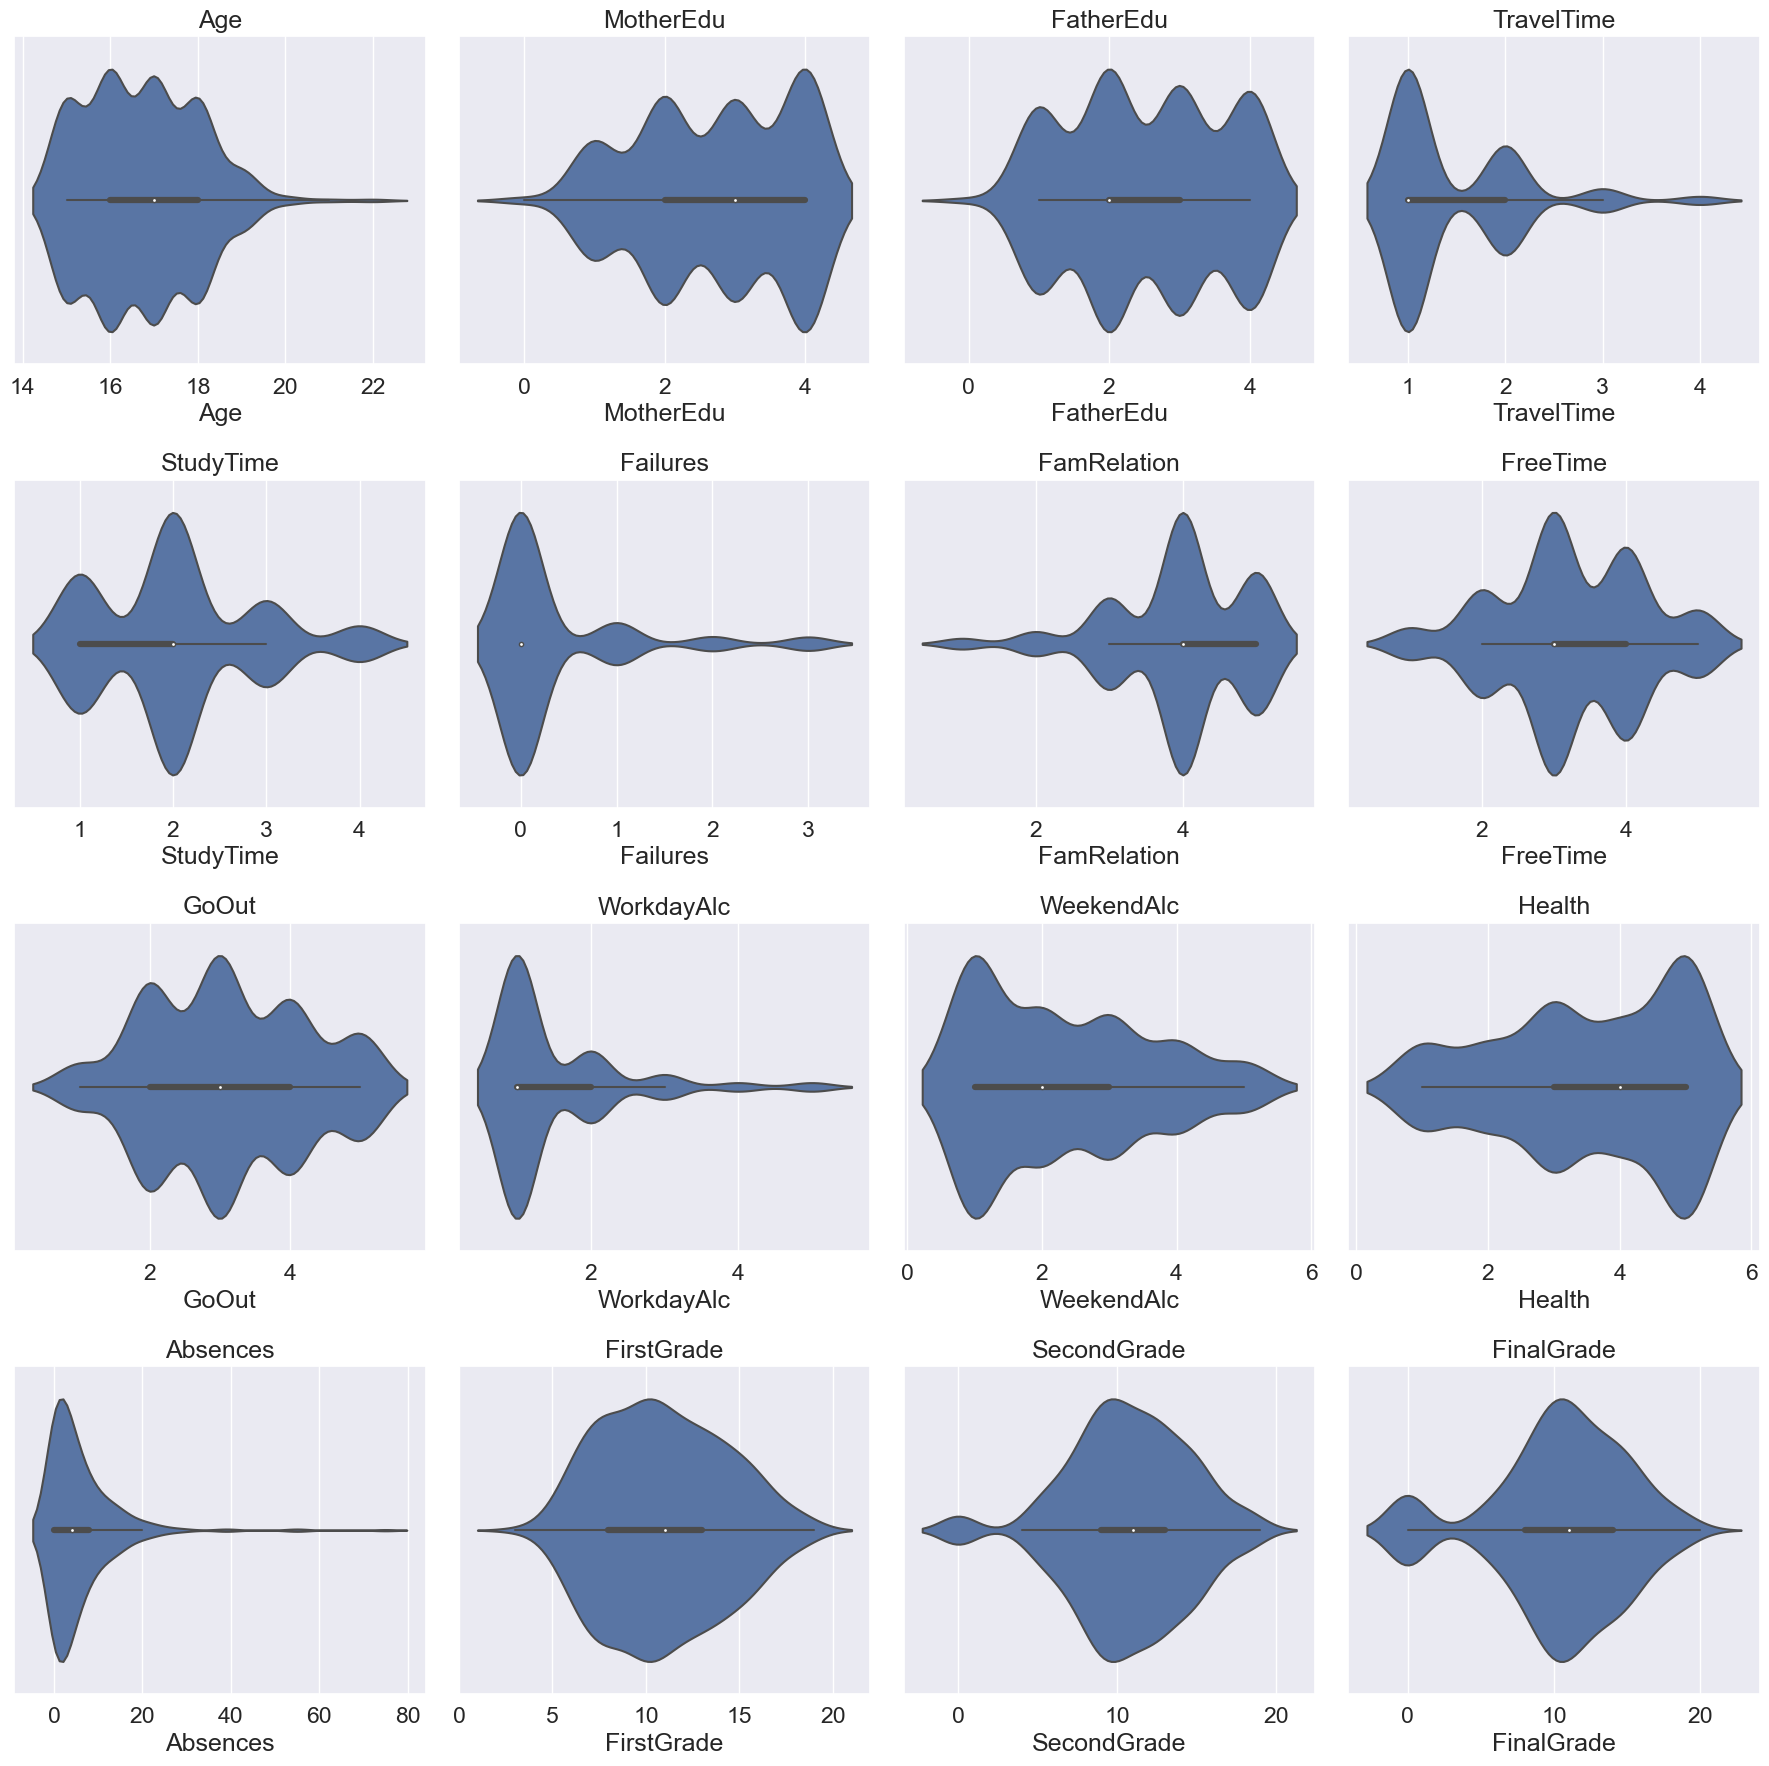

In [18]:
f, axes = plt.subplots(4, 4, figsize=(18, 18))

axes_positions = [(i, j) for i in range(4) for j in range(4)]

for column, pos in zip(df_mathNum.columns, axes_positions):
    ax = sb.violinplot(x=df_mathNum[column], ax=axes[pos]) #showfliers = true
    ax.set_title(column)

plt.tight_layout()
plt.show()

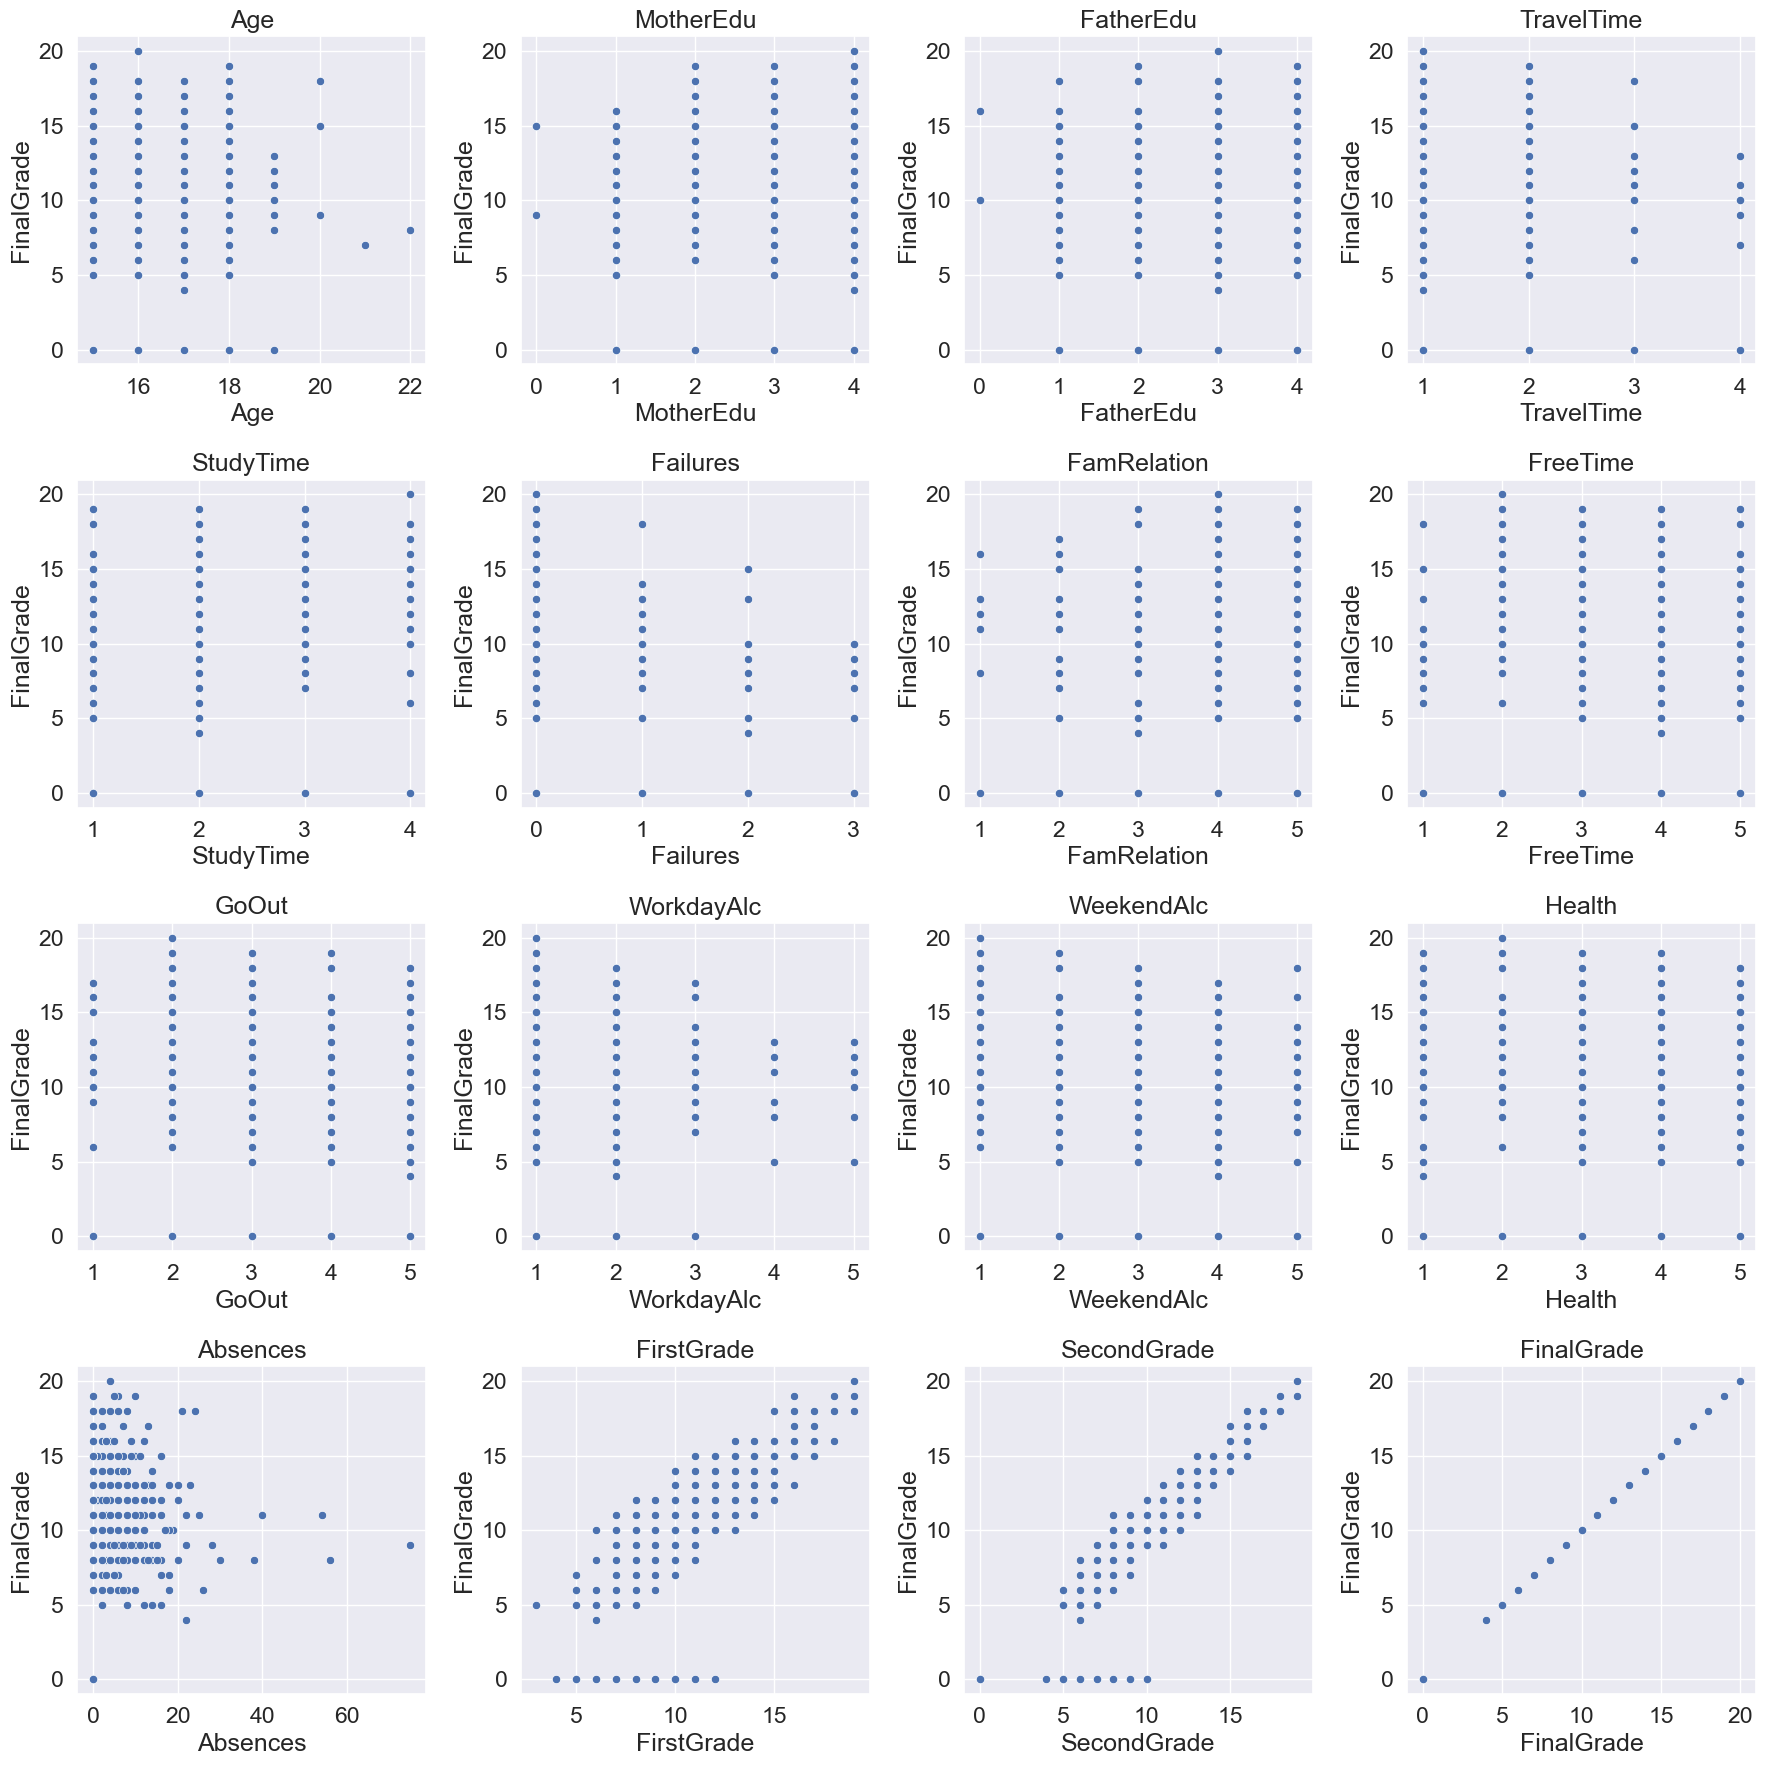

In [19]:
f, axes = plt.subplots(4, 4, figsize=(18, 18))

axes_positions = [(i, j) for i in range(4) for j in range(4)]

for column, pos in zip(df_mathNum.columns, axes_positions):
    ax = sb.scatterplot(x=df_mathNum[column], y=df_mathNum['FinalGrade'], ax=axes[pos])
    ax.set_title(column)

plt.tight_layout()
plt.show()

<h3>Catgorical Columns Analysis</h3>

In [20]:
# Extract categorical
df_math_categorical = df_math.drop(numVar, axis=1)
df_math_categorical

School Sex Address FamilySize ParentsCohab MotherJob FatherJob  Reason  \
0       GP   F       U        GT3            A   at_home   teacher  course   
1       GP   F       U        GT3            T   at_home     other  course   
2       GP   F       U        LE3            T   at_home     other   other   
3       GP   F       U        GT3            T    health  services    home   
4       GP   F       U        GT3            T     other     other    home   
..     ...  ..     ...        ...          ...       ...       ...     ...   
390     MS   M       U        LE3            A  services  services  course   
391     MS   M       U        LE3            T  services  services  course   
392     MS   M       R        GT3            T     other     other  course   
393     MS   M       R        LE3            T  services     other  course   
394     MS   M       U        LE3            T     other   at_home  course   

    Guardian SchoolSup FamSup Paid Activities Nursery Higher Internet Romantic  
0     mother       yes     no   no         no     yes    yes       no       no  
1     father        no    yes   no         no      no    yes      yes       no  
2     mother       yes     no  yes         no     yes    yes      yes       no  
3     mother        no    yes  yes        yes     yes    yes      yes      yes  
4     father        no    yes  yes         no     yes    yes       no       no  
..       ...       ...    ...  ...        ...     ...    ...      ...      ...  
390    other        no    yes  yes         no     yes    yes       no       no  
391   mother        no     no   no         no      no    yes      yes       no  
392    other        no     no   no         no      no    yes       no       no  
393   mother        no     no   no         no      no    yes      yes       no  
394   father        no     no   no         no     yes    yes      yes       no  

[395 rows x 17 columns]

In [21]:
df_math_categorical.columns

Index(['School', 'Sex', 'Address', 'FamilySize', 'ParentsCohab', 'MotherJob',
       'FatherJob', 'Reason', 'Guardian', 'SchoolSup', 'FamSup', 'Paid',
       'Activities', 'Nursery', 'Higher', 'Internet', 'Romantic'],
      dtype='object')

<h4>Count Plot</h4>

The frequency of each class label of each categorical column is visualised using count plot.

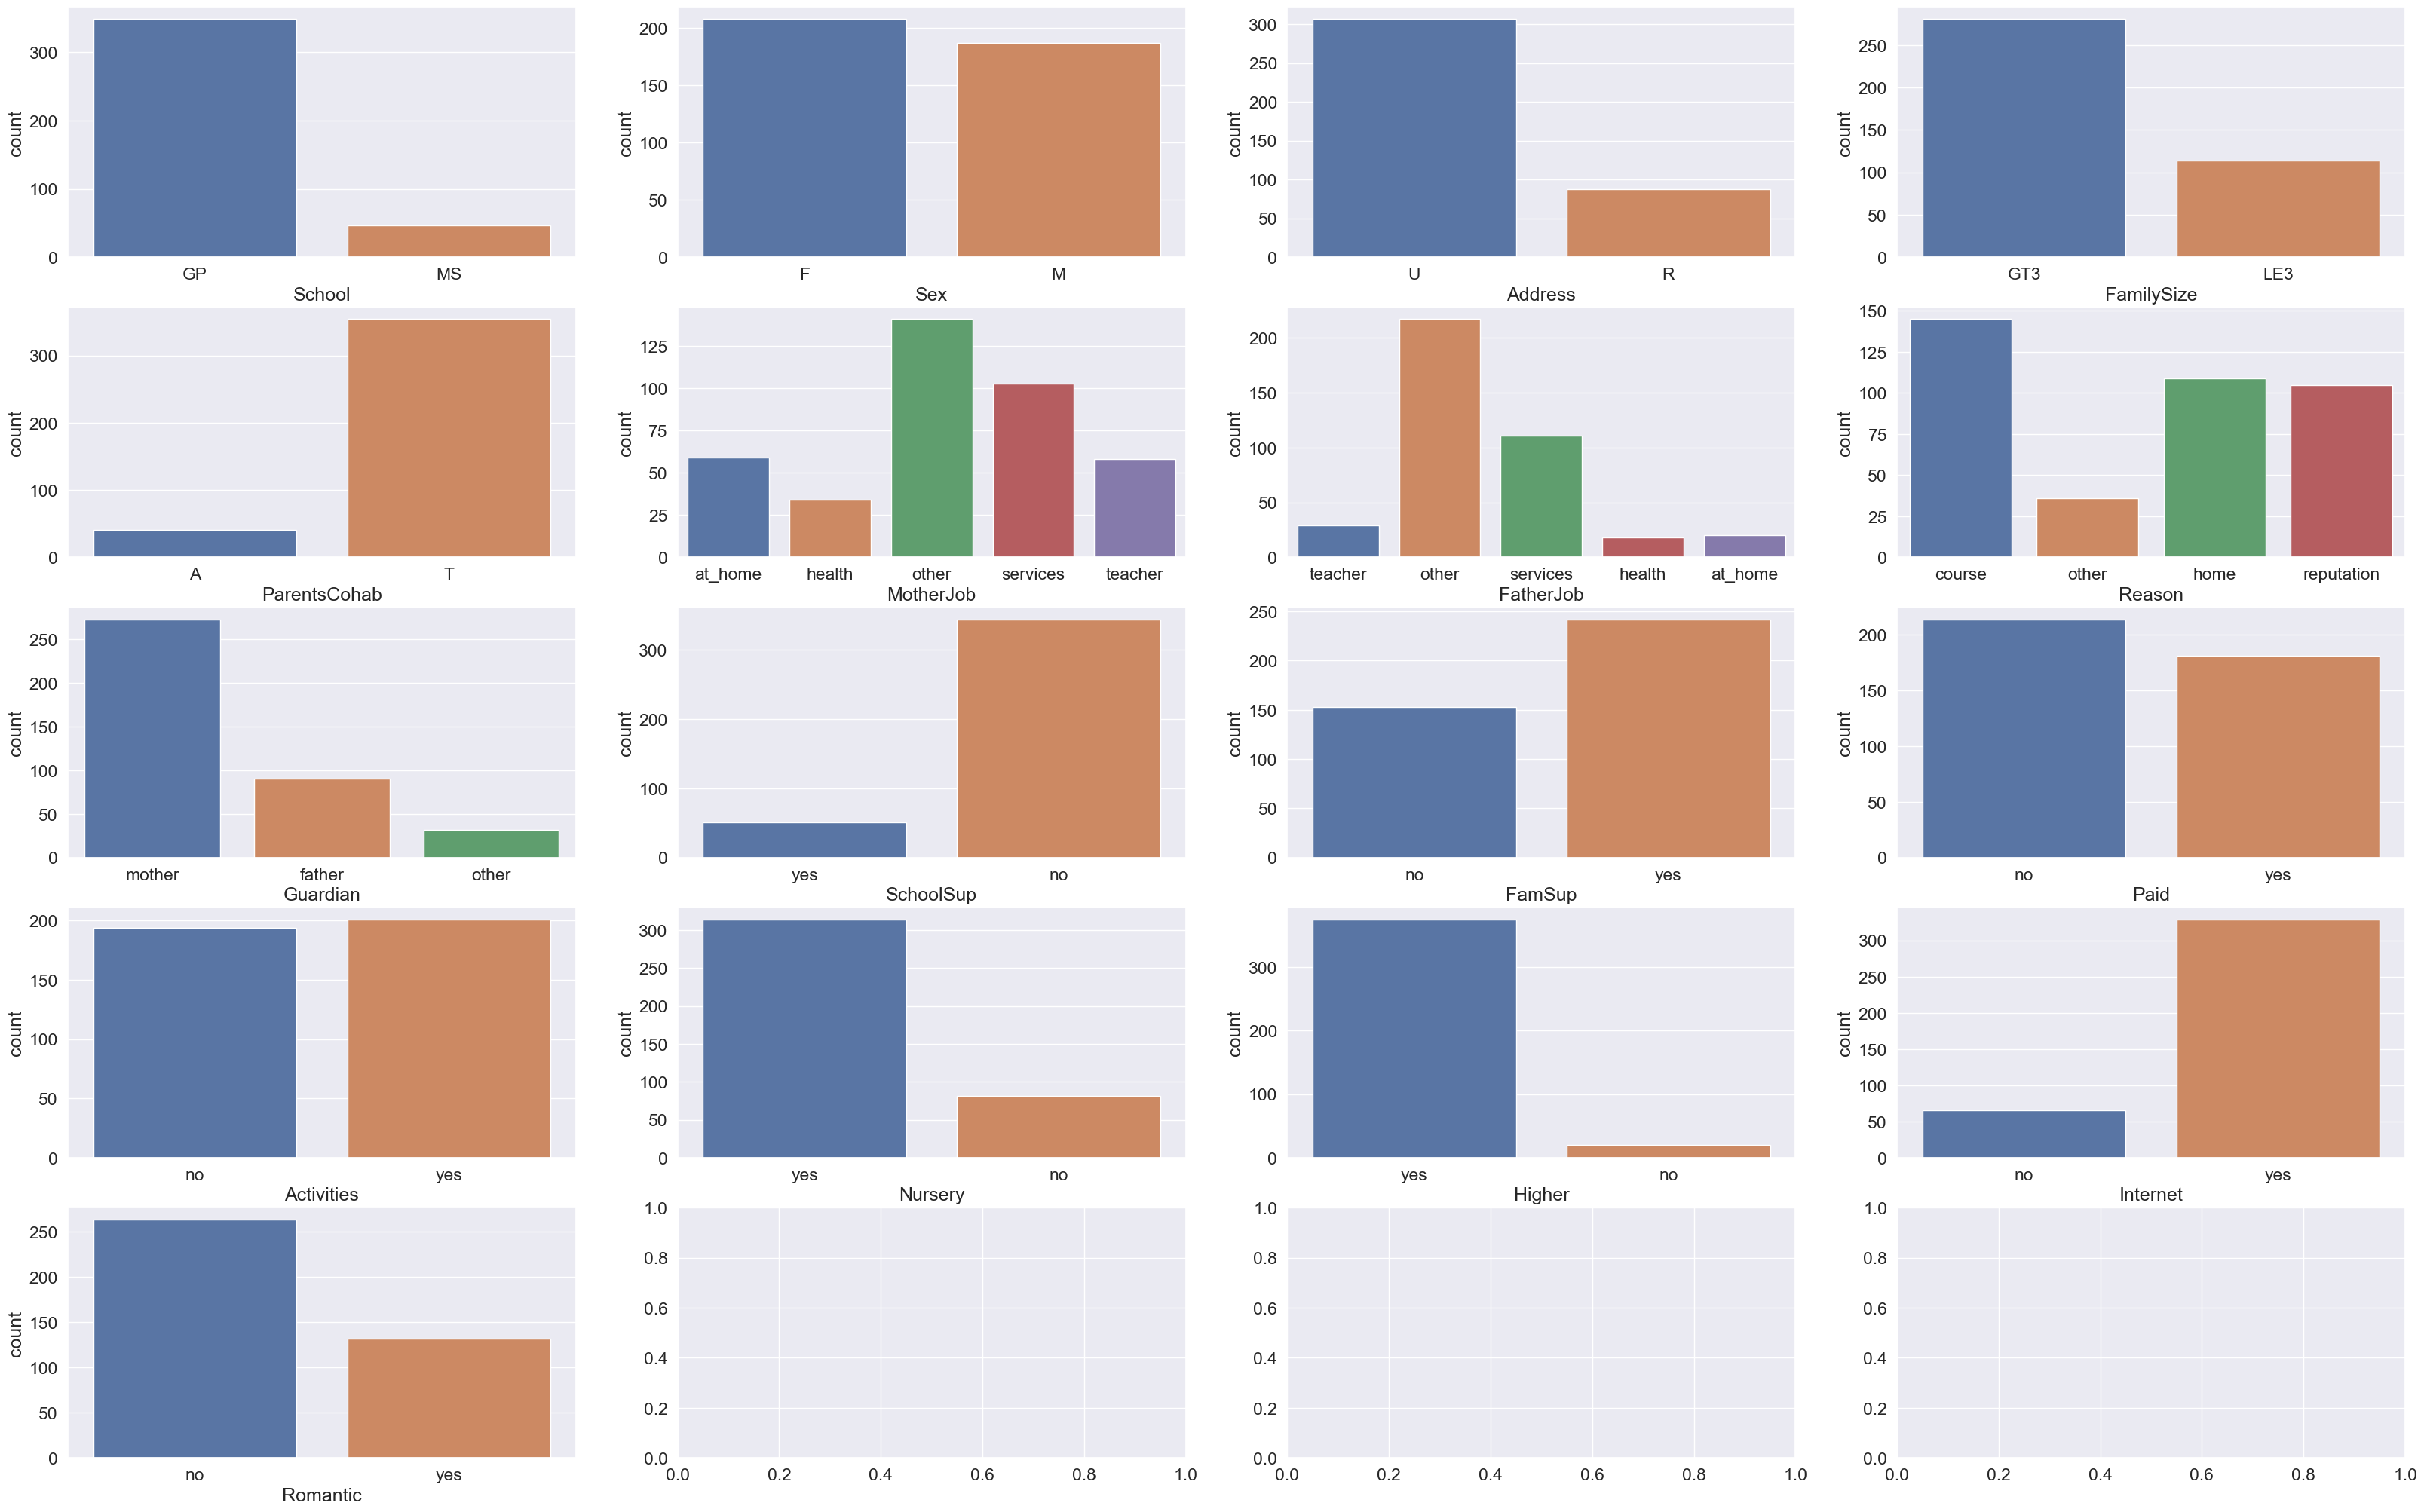

In [22]:
fig, ax1 = plt.subplots(5, 4, figsize=(40, 25))
x_counter = 0
y_counter = 0
for i in df_math_categorical.columns:
    if y_counter == 4:
        y_counter = 0
        x_counter = x_counter + 1
    
    sb.countplot(ax = ax1[x_counter, y_counter], x = df_math_categorical[i]);
    
    y_counter = y_counter + 1


There are imbalances in many categorical variables as seen from the percentage values below. This may introduce biases in the model. For example, for School variable of 11.646% for MS, the model may learn patterns for GP and generalise these patterns to records with MS. However, due to the limited amount of data, we shall not balance the class compositions.

In [23]:
# Percentages
print("Composition of Class Labels:")
df_math_categorical_size = len(df_math_categorical)
for i in df_math_categorical.columns:
    print(i)
    for j in df_math_categorical[i].unique():
        percent = df_math_categorical[i].value_counts()[j] / df_math_categorical_size
        print("{0:.3f}".format(percent*100) + "%")
    print()


Composition of Class Labels:
School
88.354%
11.646%

Sex
52.658%
47.342%

Address
77.722%
22.278%

FamilySize
71.139%
28.861%

ParentsCohab
10.380%
89.620%

MotherJob
14.937%
8.608%
35.696%
26.076%
14.684%

FatherJob
7.342%
54.937%
28.101%
4.557%
5.063%

Reason
36.709%
9.114%
27.595%
26.582%

Guardian
69.114%
22.785%
8.101%

SchoolSup
12.911%
87.089%

FamSup
38.734%
61.266%

Paid
54.177%
45.823%

Activities
49.114%
50.886%

Nursery
79.494%
20.506%

Higher
94.937%
5.063%

Internet
16.709%
83.291%

Romantic
66.582%
33.418%



<h3>Feature Selection</h3>

<h4>Correlation</h4>

Age           -0.161579
MotherEdu      0.217147
FatherEdu      0.152457
TravelTime    -0.117142
StudyTime      0.097820
Failures      -0.360415
FamRelation    0.051363
FreeTime       0.011307
GoOut         -0.132791
WorkdayAlc    -0.054660
WeekendAlc    -0.051939
Health        -0.061335
Absences       0.034247
FirstGrade     0.801468
SecondGrade    0.904868
FinalGrade     1.000000
Name: FinalGrade, dtype: float64



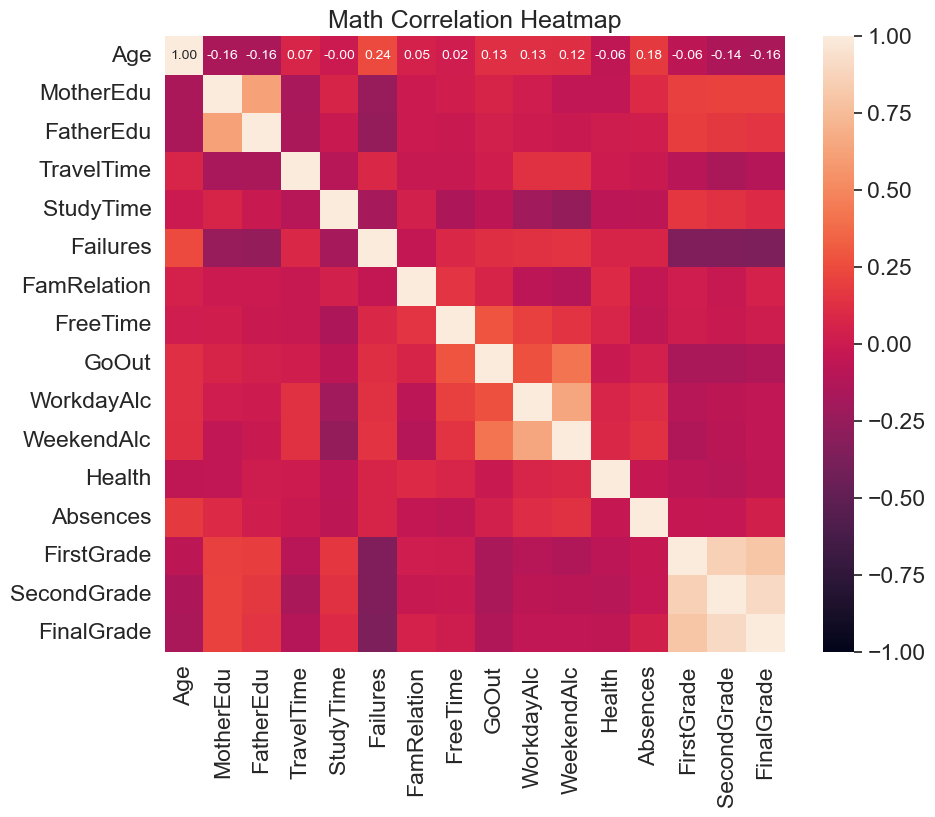

In [24]:
print(df_mathNum.corr()['FinalGrade'])
print()

correlation_matrix = df_mathNum.corr()

plt.figure(figsize=(10, 8))
sb.heatmap(correlation_matrix, vmin = -1, vmax = 1, annot=True, fmt=".2f", annot_kws={"size": 10})
plt.title('Math Correlation Heatmap')
plt.show()

Box Plot

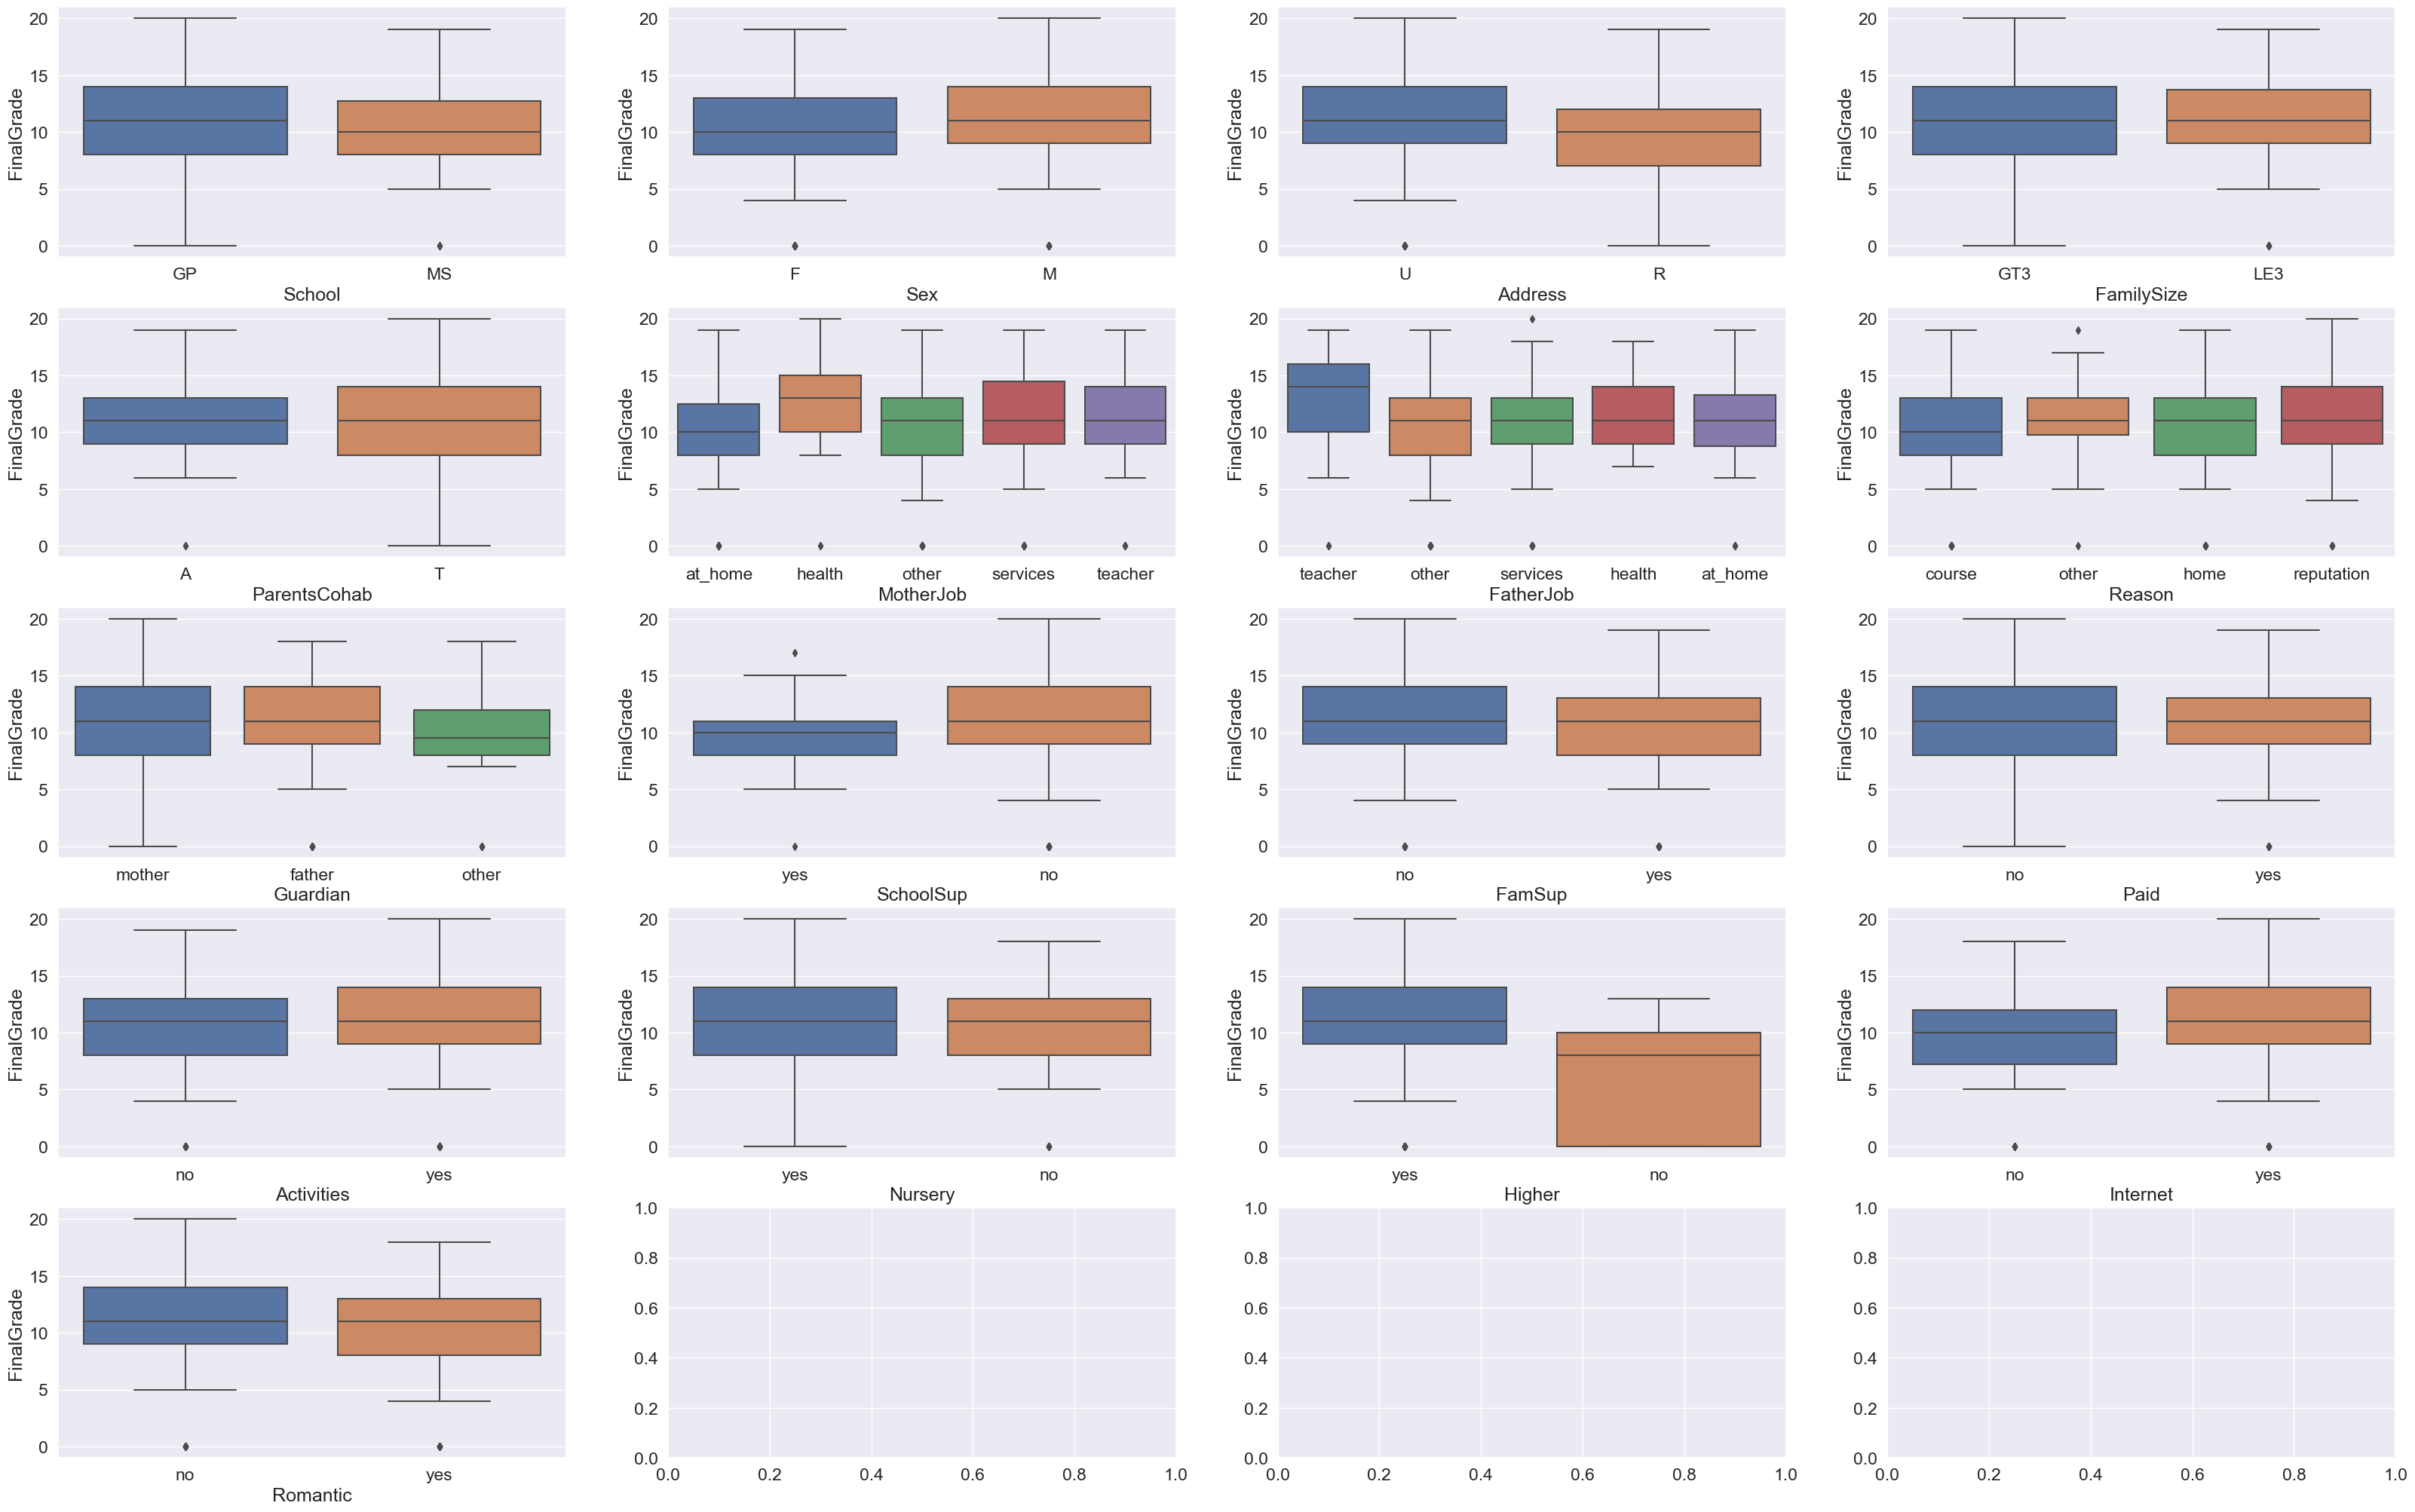

In [25]:
fig, ax1 = plt.subplots(5, 4, figsize=(40, 25))

x_counter = 0
y_counter = 0
for i in df_math_categorical.columns:
    if y_counter == 4:
        y_counter = 0
        x_counter = x_counter + 1
    
    sb.boxplot(ax=ax1[x_counter,y_counter], x=df_math_categorical[i], y=df_math['FinalGrade'])
    
    y_counter = y_counter + 1

<h4>Anova Test</h4>

In [26]:
## Get anova value of all categorical columns, with respect to G3
#column name, anova value
anova_dict = {} 
for i in df_math_categorical.columns:
    temp_column = []
    for j in df_math_categorical[i].unique():
        tempdf = df_math[df_math[i]==j]
        tempG3 = tempdf["FinalGrade"]
        temp_column.append(tempG3)
    anova_dict[i] = f_oneway(*temp_column)

In [27]:
chosen_columns = []
for key, item in anova_dict.items():
    if item[1] <= 0.05: # Retrieve such cols, pvalue threshold of 0.05 (standard value)
        chosen_columns.append(key)

chosen_columns

['Sex', 'Address', 'MotherJob', 'Paid', 'Higher', 'Romantic']

In [28]:
anova_dict

{'School': F_onewayResult(statistic=0.7980416422082741, pvalue=0.3722262371311368),
 'Sex': F_onewayResult(statistic=4.251814371189991, pvalue=0.039865332341527955),
 'Address': F_onewayResult(statistic=4.445163854236396, pvalue=0.035632679756558636),
 'FamilySize': F_onewayResult(statistic=2.621832377243357, pvalue=0.10620482783859679),
 'ParentsCohab': F_onewayResult(statistic=1.3269268029203884, pvalue=0.25005293926392647),
 'MotherJob': F_onewayResult(statistic=3.7544596189013513, pvalue=0.005194749939407733),
 'FatherJob': F_onewayResult(statistic=1.3029154881291376, pvalue=0.2683141692179647),
 'Reason': F_onewayResult(statistic=2.0799920508343344, pvalue=0.10233745609730385),
 'Guardian': F_onewayResult(statistic=1.5905172045230977, pvalue=0.2051326420058259),
 'SchoolSup': F_onewayResult(statistic=2.712167087836046, pvalue=0.1003849636391073),
 'FamSup': F_onewayResult(statistic=0.6035051787521449, pvalue=0.43771108589488095),
 'Paid': F_onewayResult(statistic=4.13145106484603,

<h4>Chi Square Test</h4>

In [29]:
# List of columns to compare
columns = ['Sex', 'Address', 'MotherJob', 'Paid', 'Higher', 'Romantic']

# Get all combinations of columns (2 at a time)
combinations = list(combinations(columns, 2))

for combo in combinations:
    # Create a cross-tabulation table
    cross_tab = pd.crosstab(df_math_categorical[combo[0]], df_math_categorical[combo[1]])

    # Perform the Chi-Square test
    chi2, p, dof, expected = chi2_contingency(cross_tab)

    # If p-value is less than 0.05, print the result
    if p < 0.05:
        print(f"Variables: {combo}")
        print("Chi-Square Statistic:", chi2)
        print("p-value:", p)
        print("\n")


Variables: ('Sex', 'MotherJob')
Chi-Square Statistic: 17.483557532214064
p-value: 0.0015564385627536573


Variables: ('Sex', 'Paid')
Chi-Square Statistic: 6.077181232606773
p-value: 0.013693910339763539


Variables: ('Sex', 'Higher')
Chi-Square Statistic: 7.685935036164814
p-value: 0.005565283789132665


Variables: ('Address', 'MotherJob')
Chi-Square Statistic: 13.245330173067378
p-value: 0.01013724484686267


Variables: ('MotherJob', 'Paid')
Chi-Square Statistic: 12.834289899686764
p-value: 0.01211451759459944


Variables: ('Paid', 'Higher')
Chi-Square Statistic: 12.462689863341426
p-value: 0.0004151616557832046




<h3>Model & Fine Tuning</h3>


MATH
Numerical (>=0.2m corr with G3)
- G2
- Failures
- Medu

Categorical (<0.05)
- address
- paid
- higher
- romantic

In [13]:
df_math_model = df_math.copy()
df_math_model

School Sex  Age Address FamilySize ParentsCohab  MotherEdu  FatherEdu  \
0       GP   F   18       U        GT3            A          4          4   
1       GP   F   17       U        GT3            T          1          1   
2       GP   F   15       U        LE3            T          1          1   
3       GP   F   15       U        GT3            T          4          2   
4       GP   F   16       U        GT3            T          3          3   
..     ...  ..  ...     ...        ...          ...        ...        ...   
390     MS   M   20       U        LE3            A          2          2   
391     MS   M   17       U        LE3            T          3          1   
392     MS   M   21       R        GT3            T          1          1   
393     MS   M   18       R        LE3            T          3          2   
394     MS   M   19       U        LE3            T          1          1   

    MotherJob FatherJob  ... FamRelation FreeTime  GoOut  WorkdayAlc  \
0     at_home   teacher  ...           4        3      4           1   
1     at_home     other  ...           5        3      3           1   
2     at_home     other  ...           4        3      2           2   
3      health  services  ...           3        2      2           1   
4       other     other  ...           4        3      2           1   
..        ...       ...  ...         ...      ...    ...         ...   
390  services  services  ...           5        5      4           4   
391  services  services  ...           2        4      5           3   
392     other     other  ...           5        5      3           3   
393  services     other  ...           4        4      1           3   
394     other   at_home  ...           3        2      3           3   

     WeekendAlc Health Absences FirstGrade SecondGrade FinalGrade  
0             1      3        6          5           6          6  
1             1      3        4          5           5          6  
2             3      3       10          7           8         10  
3             1      5        2         15          14         15  
4             2      5        4          6          10         10  
..          ...    ...      ...        ...         ...        ...  
390           5      4       11          9           9          9  
391           4      2        3         14          16         16  
392           3      3        3         10           8          7  
393           4      5        0         11          12         10  
394           3      5        5          8           9          9  

[395 rows x 33 columns]

In [14]:
df_math_model_categorical = df_math_model[['Address', 'Paid', 'Higher', 'Romantic']]
df_math_model_numerical = df_math_model[["SecondGrade", "Failures", "MotherEdu"]]
print("Categorical columns: ", df_math_model_categorical.shape)
print("Numerical columns: ", df_math_model_numerical.shape)

Categorical columns:  (395, 4)
Numerical columns:  (395, 3)


<h4>One Hot Encoding (Categorical)</h4>

In [15]:
# One Hot Encoding
encoded_df = pd.get_dummies(df_math_model_categorical, columns=['Address', 'Paid', 'Higher', 'Romantic'])
df_math_model = pd.concat([encoded_df,df_math_model_numerical], axis=1)
df_math_model

Address_R  Address_U  Paid_no  Paid_yes  Higher_no  Higher_yes  \
0            0          1        1         0          0           1   
1            0          1        1         0          0           1   
2            0          1        0         1          0           1   
3            0          1        0         1          0           1   
4            0          1        0         1          0           1   
..         ...        ...      ...       ...        ...         ...   
390          0          1        0         1          0           1   
391          0          1        1         0          0           1   
392          1          0        1         0          0           1   
393          1          0        1         0          0           1   
394          0          1        1         0          0           1   

     Romantic_no  Romantic_yes  SecondGrade  Failures  MotherEdu  
0              1             0            6         0          4  
1              1             0            5         0          1  
2              1             0            8         3          1  
3              0             1           14         0          4  
4              1             0           10         0          3  
..           ...           ...          ...       ...        ...  
390            1             0            9         2          2  
391            1             0           16         0          3  
392            1             0            8         3          1  
393            1             0           12         0          3  
394            1             0            9         0          1  

[395 rows x 11 columns]

<h4>Split Data</h4>

In [16]:
X_train, X_test, y_train, y_test = train_test_split(df_math_model, df_math["FinalGrade"], test_size=0.2, random_state=42)
print("X train: ", X_train.shape)
print("y train: ", y_train.shape)
print("X test: ", X_test.shape)
print("y test: ", y_test.shape)

X train:  (316, 11)
y train:  (316,)
X test:  (79, 11)
y test:  (79,)


<h4>Standard Scaling (Numerical)</h4>

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
scaled_x_train = scaler.transform(X_train)
scaled_x_test = scaler.transform(X_test)
print("X train: ", scaled_x_train.shape)
print("X test: ", scaled_x_test.shape)

X train:  (316, 11)
X test:  (79, 11)


<h4>Minimum Performance</h4>

In [18]:
df_math["FinalGrade"].mean()
y_true = np.array(df_math["FinalGrade"])
y_pred = np.zeros((395))
y_pred.fill(df_math["FinalGrade"].mean())

In [19]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
print("Metrics for just predicting Mean of FinalGrade")
print("MAE: ", mean_absolute_error(y_true, y_pred))
print("MAE: ", mean_squared_error(y_true, y_pred))

Metrics for just predicting Mean of FinalGrade
MAE:  3.4289889440794745
MAE:  20.936478128505044


<h4>Neural network</h4>

<h4>Model 1 (Base)</h4>

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
math_model1 = Sequential()
math_model1.add(Dense(10, input_shape=(11,), activation='relu'))
math_model1.add(Dense(1, activation='linear'))

In [21]:
math_model1.compile(loss='mean_squared_error', optimizer='adam', metrics=["mse", "mae"])

In [22]:
math_history_model1 = math_model1.fit(scaled_x_train, y_train, epochs=100, batch_size=16, validation_split=0.2)

Epoch 1/100
16/16 [==============================] - 0s 12ms/step - loss: 130.3849 - mse: 130.3849 - mae: 10.4410 - val_loss: 125.8583 - val_mse: 125.8583 - val_mae: 10.4696
Epoch 2/100
16/16 [==============================] - 0s 7ms/step - loss: 127.1512 - mse: 127.1512 - mae: 10.3067 - val_loss: 123.1279 - val_mse: 123.1279 - val_mae: 10.3540
Epoch 3/100
16/16 [==============================] - 0s 6ms/step - loss: 124.0073 - mse: 124.0073 - mae: 10.1788 - val_loss: 120.4067 - val_mse: 120.4067 - val_mae: 10.2371
Epoch 4/100
16/16 [==============================] - 0s 6ms/step - loss: 120.8183 - mse: 120.8183 - mae: 10.0440 - val_loss: 117.7319 - val_mse: 117.7319 - val_mae: 10.1264
Epoch 5/100
16/16 [==============================] - 0s 5ms/step - loss: 117.7319 - mse: 117.7319 - mae: 9.9138 - val_loss: 114.9560 - val_mse: 114.9560 - val_mae: 10.0107
Epoch 6/100
16/16 [==============================] - 0s 5ms/step - loss: 114.5599 - mse: 114.5599 - mae: 9.7819 - val_loss: 112.1234 - 

Epoch 50/100
16/16 [==============================] - 0s 4ms/step - loss: 7.3660 - mse: 7.3660 - mae: 1.9990 - val_loss: 7.4965 - val_mse: 7.4965 - val_mae: 1.9460
Epoch 51/100
16/16 [==============================] - 0s 4ms/step - loss: 7.2152 - mse: 7.2152 - mae: 1.9680 - val_loss: 7.3750 - val_mse: 7.3750 - val_mae: 1.9201
Epoch 52/100
16/16 [==============================] - 0s 4ms/step - loss: 7.0746 - mse: 7.0746 - mae: 1.9382 - val_loss: 7.2550 - val_mse: 7.2550 - val_mae: 1.8970
Epoch 53/100
16/16 [==============================] - 0s 4ms/step - loss: 6.9436 - mse: 6.9436 - mae: 1.9115 - val_loss: 7.1586 - val_mse: 7.1586 - val_mae: 1.8722
Epoch 54/100
16/16 [==============================] - 0s 4ms/step - loss: 6.8168 - mse: 6.8168 - mae: 1.8845 - val_loss: 7.0707 - val_mse: 7.0707 - val_mae: 1.8553
Epoch 55/100
16/16 [==============================] - 0s 6ms/step - loss: 6.7075 - mse: 6.7075 - mae: 1.8617 - val_loss: 6.9950 - val_mse: 6.9950 - val_mae: 1.8403
Epoch 56/100
16/

Epoch 100/100
16/16 [==============================] - 0s 4ms/step - loss: 4.5342 - mse: 4.5342 - mae: 1.4568 - val_loss: 4.9401 - val_mse: 4.9401 - val_mae: 1.5361


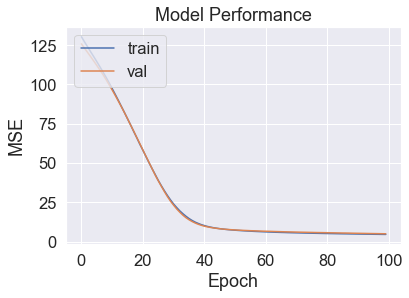

In [23]:
plt.plot(math_history_model1.history['mse'])
plt.plot(math_history_model1.history['val_mse'])
plt.title('Model Performance')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

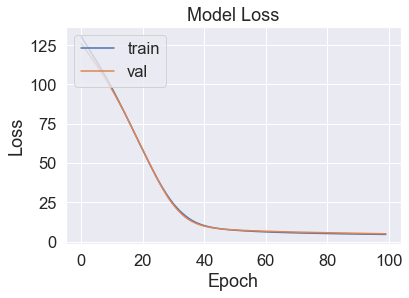

In [24]:
plt.plot(math_history_model1.history['loss'])
plt.plot(math_history_model1.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

<h4>Model 2</h4>

Increased network size, performance increased.

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
math_model2 = Sequential()
math_model2.add(Dense(10, input_shape=(11,), activation='relu'))
math_model2.add(Dense(20, activation='relu'))
math_model2.add(Dense(20, activation='relu'))
math_model2.add(Dense(20, activation='relu'))
math_model2.add(Dense(10, activation='relu'))
math_model2.add(Dense(1, activation='linear'))

In [26]:
math_model2.compile(loss='mean_squared_error', optimizer='adam', metrics=["mse", "mae"])

In [27]:
math_history_model2 = math_model2.fit(scaled_x_train, y_train, epochs=100, batch_size=16, validation_split=0.2)

Epoch 1/100
16/16 [==============================] - 0s 11ms/step - loss: 126.6290 - mse: 126.6290 - mae: 10.2381 - val_loss: 122.7271 - val_mse: 122.7271 - val_mae: 10.3037
Epoch 2/100
16/16 [==============================] - 0s 7ms/step - loss: 119.6605 - mse: 119.6605 - mae: 9.9429 - val_loss: 112.3212 - val_mse: 112.3212 - val_mae: 9.8526
Epoch 3/100
16/16 [==============================] - 0s 6ms/step - loss: 105.9215 - mse: 105.9215 - mae: 9.3337 - val_loss: 91.7186 - val_mse: 91.7186 - val_mae: 8.8589
Epoch 4/100
16/16 [==============================] - 0s 6ms/step - loss: 81.4883 - mse: 81.4883 - mae: 8.0420 - val_loss: 58.4745 - val_mse: 58.4745 - val_mae: 6.7280
Epoch 5/100
16/16 [==============================] - 0s 5ms/step - loss: 52.5574 - mse: 52.5574 - mae: 6.1745 - val_loss: 33.4230 - val_mse: 33.4230 - val_mae: 4.9561
Epoch 6/100
16/16 [==============================] - 0s 6ms/step - loss: 40.1746 - mse: 40.1746 - mae: 5.3205 - val_loss: 25.3197 - val_mse: 25.3197 - v

Epoch 51/100
16/16 [==============================] - 0s 5ms/step - loss: 2.6944 - mse: 2.6944 - mae: 1.0276 - val_loss: 3.5709 - val_mse: 3.5709 - val_mae: 1.1791
Epoch 52/100
16/16 [==============================] - 0s 5ms/step - loss: 2.6354 - mse: 2.6354 - mae: 0.9990 - val_loss: 3.4322 - val_mse: 3.4322 - val_mae: 1.1490
Epoch 53/100
16/16 [==============================] - 0s 5ms/step - loss: 2.6164 - mse: 2.6164 - mae: 0.9969 - val_loss: 3.4292 - val_mse: 3.4292 - val_mae: 1.1491
Epoch 54/100
16/16 [==============================] - 0s 5ms/step - loss: 2.6511 - mse: 2.6511 - mae: 1.0048 - val_loss: 3.3885 - val_mse: 3.3885 - val_mae: 1.1421
Epoch 55/100
16/16 [==============================] - 0s 5ms/step - loss: 2.5811 - mse: 2.5811 - mae: 0.9723 - val_loss: 3.5779 - val_mse: 3.5779 - val_mae: 1.1452
Epoch 56/100
16/16 [==============================] - 0s 4ms/step - loss: 2.5729 - mse: 2.5729 - mae: 0.9685 - val_loss: 3.4795 - val_mse: 3.4795 - val_mae: 1.1484
Epoch 57/100
16/

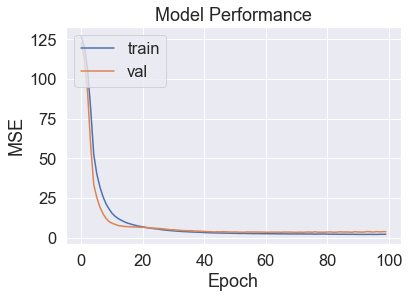

In [28]:
plt.plot(math_history_model2.history['mse'])
plt.plot(math_history_model2.history['val_mse'])
plt.title('Model Performance')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

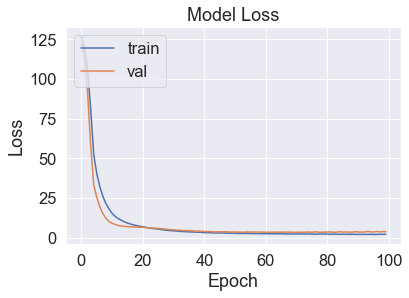

In [29]:
plt.plot(math_history_model2.history['loss'])
plt.plot(math_history_model2.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

<h4>Model 3</h4>

Increased network size further, model start to overfit. At the point before it overfits, the performance (MAE and MSE) is similar to model 2. Therefore, no further models are experimented on.

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
math_model3 = Sequential()
math_model3.add(Dense(50, input_shape=(11,), activation='relu'))
math_model3.add(Dense(100, activation='relu'))
math_model3.add(Dense(100, activation='relu'))
math_model3.add(Dense(100, activation='relu'))
math_model3.add(Dense(100, activation='relu'))
math_model3.add(Dense(50, activation='relu'))
math_model3.add(Dense(25, activation='relu'))
math_model3.add(Dense(1, activation='linear'))

In [31]:
math_model3.compile(loss='mean_squared_error', optimizer='adam', metrics=["mse", "mae"])

In [32]:
math_history_model3 = math_model3.fit(scaled_x_train, y_train, epochs=100, batch_size=16, validation_split=0.2)

Epoch 1/100
16/16 [==============================] - 0s 15ms/step - loss: 121.3196 - mse: 121.3196 - mae: 10.0529 - val_loss: 98.4639 - val_mse: 98.4639 - val_mae: 9.2676
Epoch 2/100
16/16 [==============================] - 0s 8ms/step - loss: 49.9001 - mse: 49.9001 - mae: 5.8529 - val_loss: 32.4631 - val_mse: 32.4631 - val_mae: 3.8944
Epoch 3/100
16/16 [==============================] - 0s 6ms/step - loss: 18.9806 - mse: 18.9806 - mae: 3.3913 - val_loss: 10.7074 - val_mse: 10.7074 - val_mae: 2.4624
Epoch 4/100
16/16 [==============================] - 0s 6ms/step - loss: 9.7608 - mse: 9.7608 - mae: 2.2813 - val_loss: 6.6991 - val_mse: 6.6991 - val_mae: 1.7181
Epoch 5/100
16/16 [==============================] - 0s 6ms/step - loss: 6.4183 - mse: 6.4183 - mae: 1.7875 - val_loss: 6.0152 - val_mse: 6.0152 - val_mae: 1.7293
Epoch 6/100
16/16 [==============================] - 0s 6ms/step - loss: 5.3483 - mse: 5.3483 - mae: 1.6356 - val_loss: 5.6213 - val_mse: 5.6213 - val_mae: 1.7467
Epoch 

Epoch 51/100
16/16 [==============================] - 0s 6ms/step - loss: 2.0246 - mse: 2.0246 - mae: 0.8873 - val_loss: 4.6311 - val_mse: 4.6311 - val_mae: 1.2445
Epoch 52/100
16/16 [==============================] - 0s 6ms/step - loss: 1.7280 - mse: 1.7280 - mae: 0.8048 - val_loss: 4.4356 - val_mse: 4.4356 - val_mae: 1.1476
Epoch 53/100
16/16 [==============================] - 0s 6ms/step - loss: 1.7911 - mse: 1.7911 - mae: 0.8185 - val_loss: 4.5430 - val_mse: 4.5430 - val_mae: 1.2580
Epoch 54/100
16/16 [==============================] - 0s 7ms/step - loss: 1.8898 - mse: 1.8898 - mae: 0.8485 - val_loss: 4.7242 - val_mse: 4.7242 - val_mae: 1.2245
Epoch 55/100
16/16 [==============================] - 0s 6ms/step - loss: 1.7624 - mse: 1.7624 - mae: 0.8456 - val_loss: 4.5058 - val_mse: 4.5058 - val_mae: 1.2583
Epoch 56/100
16/16 [==============================] - 0s 6ms/step - loss: 1.7306 - mse: 1.7306 - mae: 0.7803 - val_loss: 5.2184 - val_mse: 5.2184 - val_mae: 1.1894
Epoch 57/100
16/

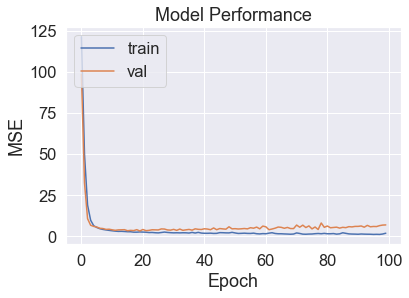

In [33]:
plt.plot(math_history_model3.history['mse'])
plt.plot(math_history_model3.history['val_mse'])
plt.title('Model Performance')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

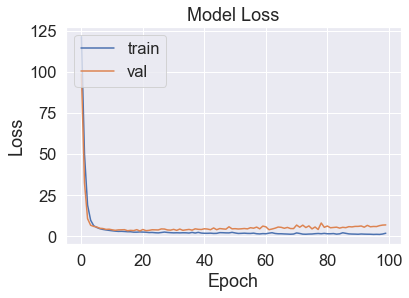

In [34]:
plt.plot(math_history_model3.history['loss'])
plt.plot(math_history_model3.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

<h3>Evaluation (Best Model Performance)</h3>

The model chosen will be Model 2, with the lowest validation MAE value.

<h4>Test Set Prediction</h4>

In [37]:
y_pred = math_model2.predict(scaled_x_test)
y_pred.shape

(79, 1)

In [38]:
print("MAE: ", mean_absolute_error(y_test, y_pred))
print("MSE: ", mean_squared_error(y_test, y_pred))

MAE:  1.7621299413186085
MSE:  7.922357167680289


<h2>Portugese Dataset</h2>

<h3>Numerical Columns Analysis</h3>

In [10]:
df_porNum = df_por[numVar]
df_porNum

Age  MotherEdu  FatherEdu  TravelTime  StudyTime  Failures  FamRelation  \
0     18          4          4           2          2         0            4   
1     17          1          1           1          2         0            5   
2     15          1          1           1          2         0            4   
3     15          4          2           1          3         0            3   
4     16          3          3           1          2         0            4   
..   ...        ...        ...         ...        ...       ...          ...   
644   19          2          3           1          3         1            5   
645   18          3          1           1          2         0            4   
646   18          1          1           2          2         0            1   
647   17          3          1           2          1         0            2   
648   18          3          2           3          1         0            4   

     FreeTime  GoOut  WorkdayAlc  WeekendAlc  Health  Absences  FirstGrade  \
0           3      4           1           1       3         4           0   
1           3      3           1           1       3         2           9   
2           3      2           2           3       3         6          12   
3           2      2           1           1       5         0          14   
4           3      2           1           2       5         0          11   
..        ...    ...         ...         ...     ...       ...         ...   
644         4      2           1           2       5         4          10   
645         3      4           1           1       1         4          15   
646         1      1           1           1       5         6          11   
647         4      5           3           4       2         6          10   
648         4      1           3           4       5         4          10   

     SecondGrade  FinalGrade  
0             11          11  
1             11          11  
2             13          12  
3             14          14  
4             13          13  
..           ...         ...  
644           11          10  
645           15          16  
646           12           9  
647           10          10  
648           11          11  

[649 rows x 16 columns]

In [11]:
df_porNum.describe()

Age   MotherEdu   FatherEdu  TravelTime   StudyTime    Failures  \
count  649.000000  649.000000  649.000000  649.000000  649.000000  649.000000   
mean    16.744222    2.514638    2.306626    1.568567    1.930663    0.221880   
std      1.218138    1.134552    1.099931    0.748660    0.829510    0.593235   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    1.000000    1.000000    1.000000    0.000000   
50%     17.000000    2.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

       FamRelation    FreeTime       GoOut  WorkdayAlc  WeekendAlc  \
count   649.000000  649.000000  649.000000  649.000000  649.000000   
mean      3.930663    3.180277    3.184900    1.502311    2.280431   
std       0.955717    1.051093    1.175766    0.924834    1.284380   
min       1.000000    1.000000    1.000000    1.000000    1.000000   
25%       4.000000    3.000000    2.000000    1.000000    1.000000   
50%       4.000000    3.000000    3.000000    1.000000    2.000000   
75%       5.000000    4.000000    4.000000    2.000000    3.000000   
max       5.000000    5.000000    5.000000    5.000000    5.000000   

           Health    Absences  FirstGrade  SecondGrade  FinalGrade  
count  649.000000  649.000000  649.000000   649.000000  649.000000  
mean     3.536210    3.659476   11.399076    11.570108   11.906009  
std      1.446259    4.640759    2.745265     2.913639    3.230656  
min      1.000000    0.000000    0.000000     0.000000    0.000000  
25%      2.000000    0.000000   10.000000    10.000000   10.000000  
50%      4.000000    2.000000   11.000000    11.000000   12.000000  
75%      5.000000    6.000000   13.000000    13.000000   14.000000  
max      5.000000   32.000000   19.000000    19.000000   19.000000

Travel time: (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour) <br>
Failures: number of past class failures (numeric: n if 1<=n<3, else 4)

<h4>Response Variable - FinalGrade</h4>

In [12]:
df_porNum['FinalGrade'].describe()

count    649.000000
mean      11.906009
std        3.230656
min        0.000000
25%       10.000000
50%       12.000000
75%       14.000000
max       19.000000
Name: FinalGrade, dtype: float64

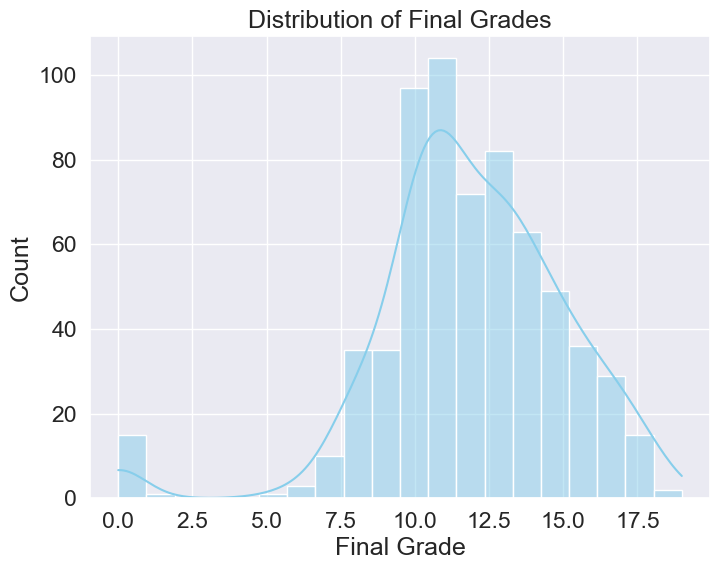

In [13]:
plt.figure(figsize=(8, 6))
sb.histplot(data=df_porNum, x='FinalGrade', bins=20, kde=True, color='skyblue')
plt.xlabel('Final Grade')
plt.ylabel('Count')
plt.title('Distribution of Final Grades')
plt.show()

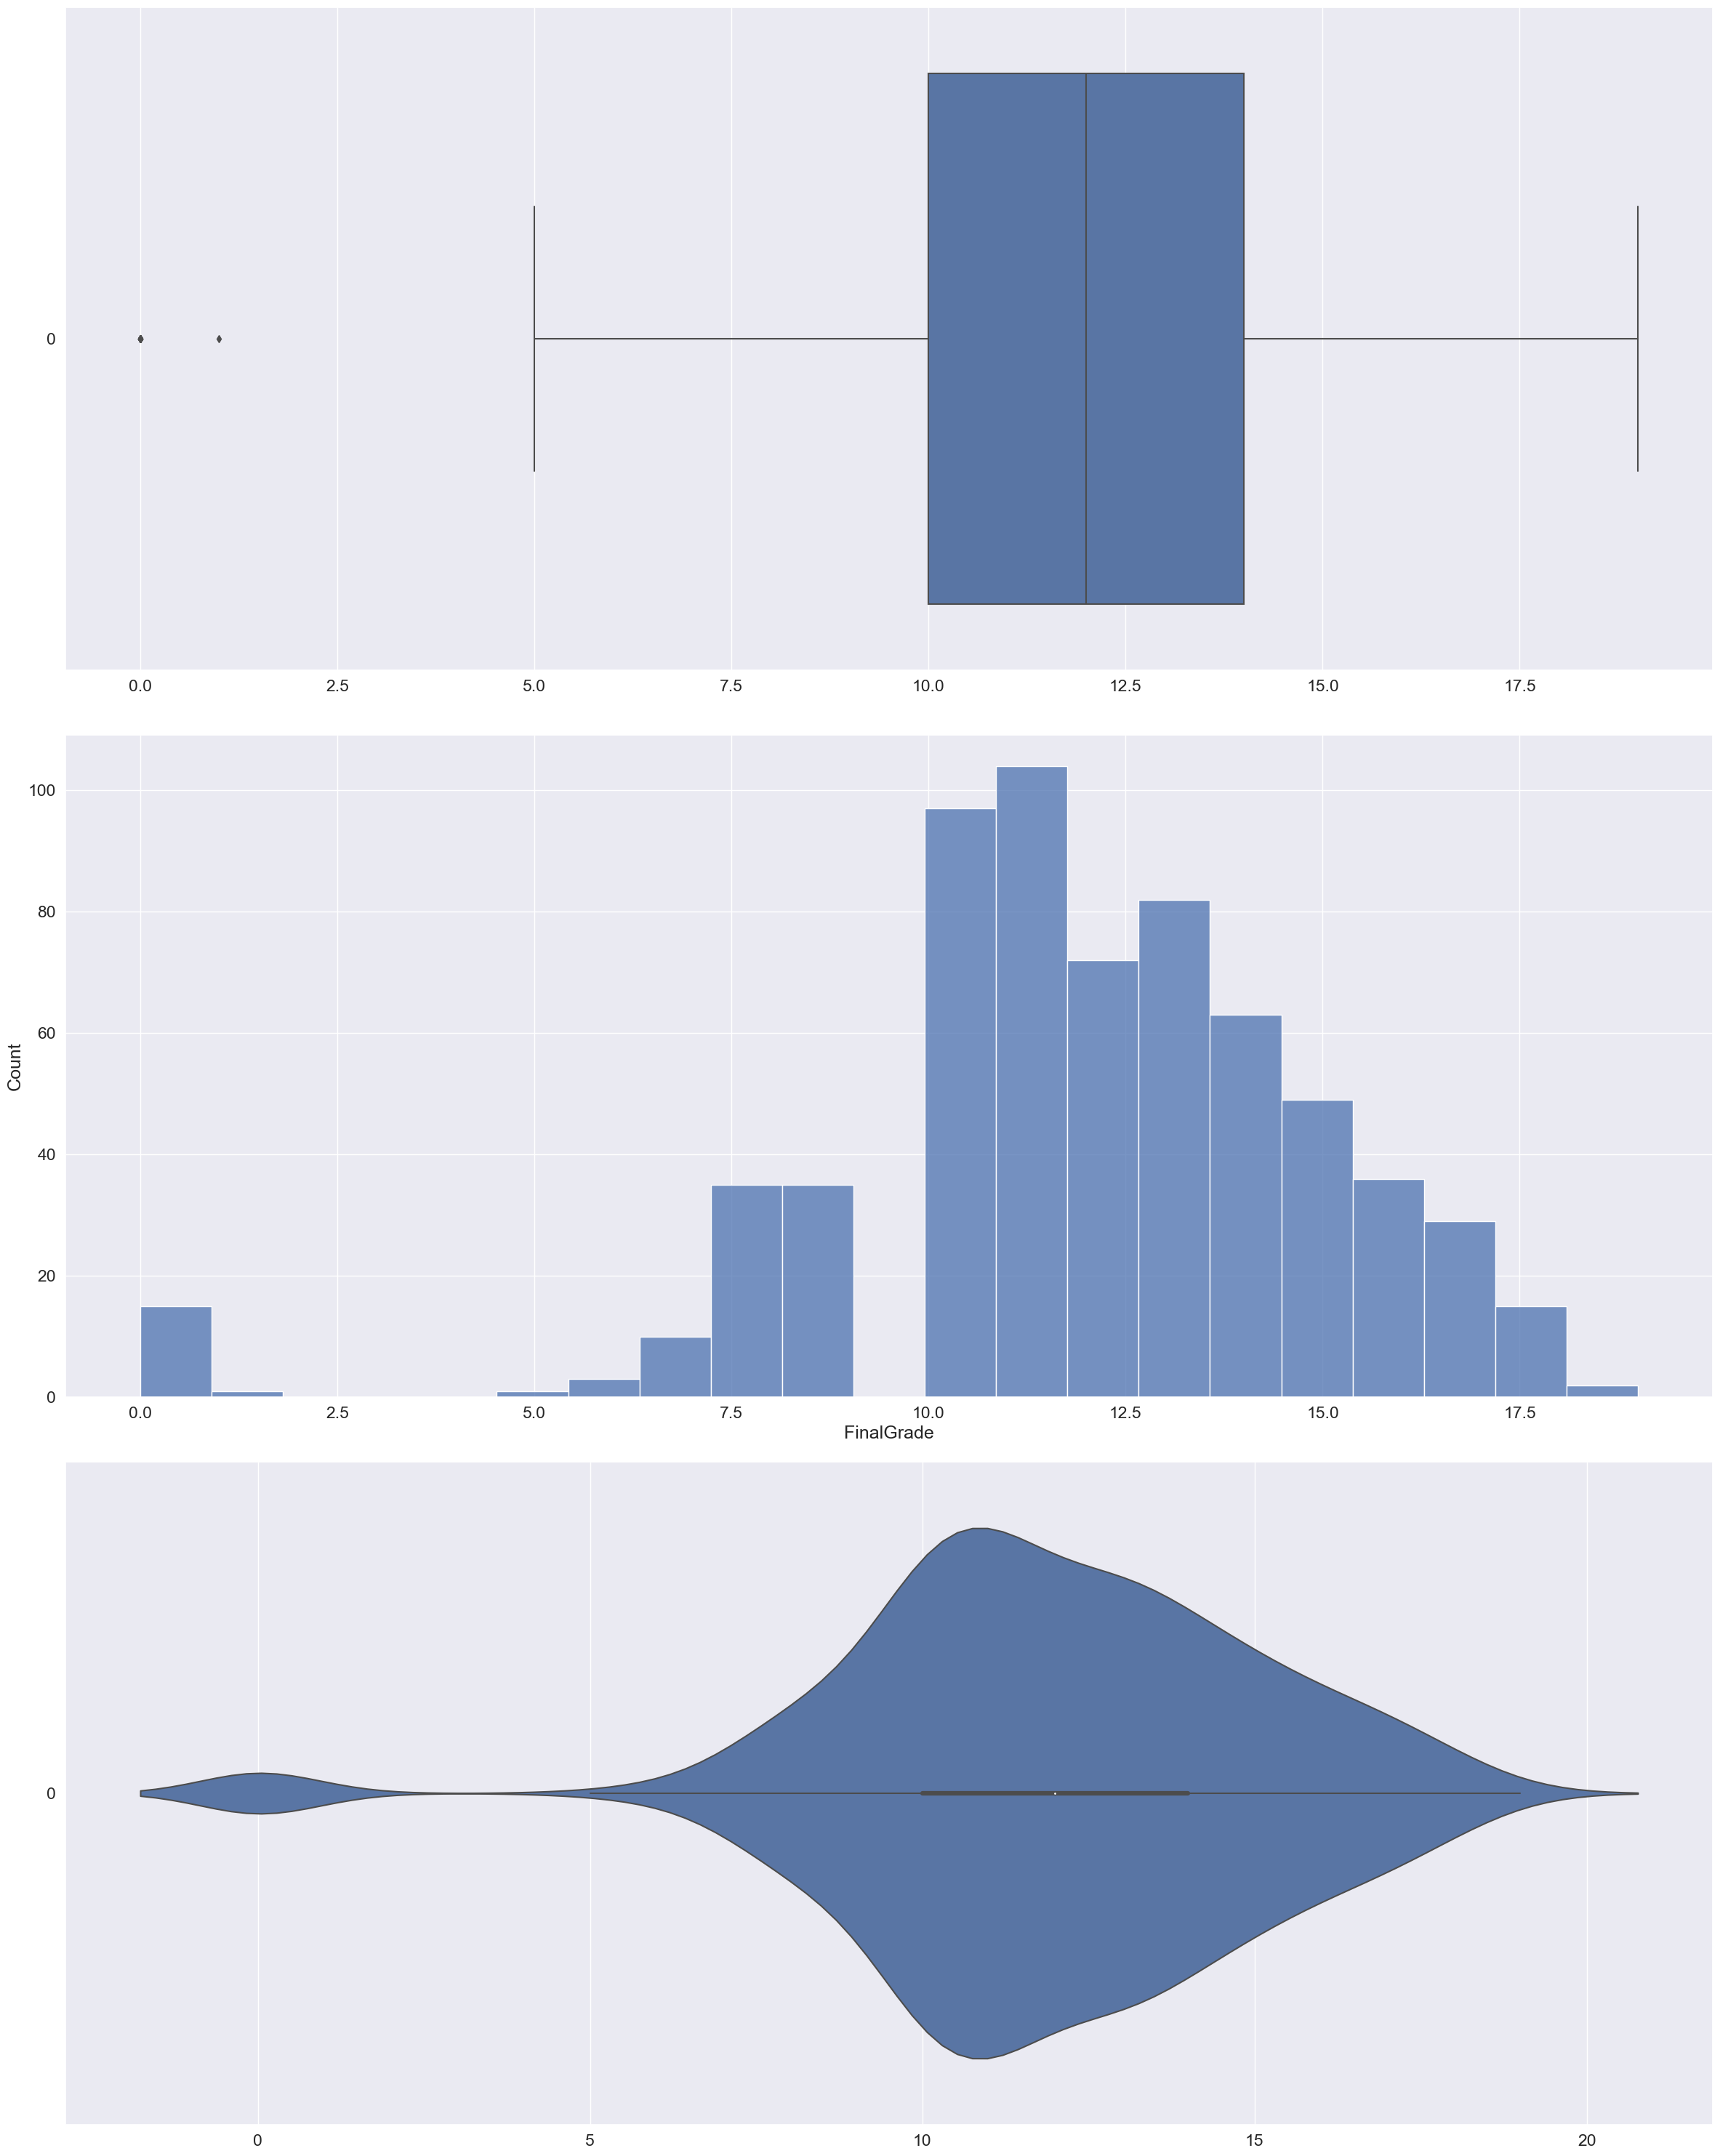

In [14]:
fig, axs = plt.subplots(3, 1, figsize=(24, 30))

# Boxplot
sb.boxplot(data=df_porNum['FinalGrade'], orient="h", ax=axs[0])

# Histogram
sb.histplot(data=df_porNum['FinalGrade'], ax=axs[1])

# Violin plot
sb.violinplot(data=df_porNum['FinalGrade'], orient="h", ax=axs[2])

plt.tight_layout()
plt.show()


FinalGrade has a central tendency with mean being 11.9 <br>
It seems like the max for Por data is capped at 19 <br>
and there are a few outliers

<h4>Predictors</h4>

In [15]:
for column in df_porNum.columns:
    outliers_count = detect_outlier(df_porNum[column])
    skew_count = df_porNum[column].skew()
    
    print(f"{column} Outlier: {outliers_count}")
    print(f"{column} Skewness: {skew_count}")
    print()

Age Outlier: 3
Age Skewness: 0.4167953798111204

MotherEdu Outlier: 0
MotherEdu Skewness: -0.029950358081110445

FatherEdu Outlier: 0
FatherEdu Skewness: 0.21534336325478984

TravelTime Outlier: 16
TravelTime Skewness: 1.2476475492990087

StudyTime Outlier: 35
StudyTime Skewness: 0.6996192054467889

Failures Outlier: 649
Failures Skewness: 3.092698960847477

FamRelation Outlier: 51
FamRelation Skewness: -1.1059340909420583

FreeTime Outlier: 45
FreeTime Skewness: -0.1812774790934117

GoOut Outlier: 0
GoOut Skewness: -0.008579903539792107

WorkdayAlc Outlier: 34
WorkdayAlc Skewness: 2.141913360367646

WeekendAlc Outlier: 0
WeekendAlc Skewness: 0.6359042701186859

Health Outlier: 0
Health Skewness: -0.5006561886039521

Absences Outlier: 23
Absences Skewness: 2.020693704014018

FirstGrade Outlier: 16
FirstGrade Skewness: -0.0027736368904273173

SecondGrade Outlier: 25
SecondGrade Skewness: -0.3602826464466586

FinalGrade Outlier: 16
FinalGrade Skewness: -0.9129093547157225



TravelTime, Failures, WorkdayAlc, Absences have high positive skewness <br>
Numerical variables with a positive skewness value indicates that the distribution has a longer right tail, meaning there are more extreme values on the right side of the distribution than the left <br>

On the other hand, FamilyRelation and FinalGrade have high negative skewness <br>

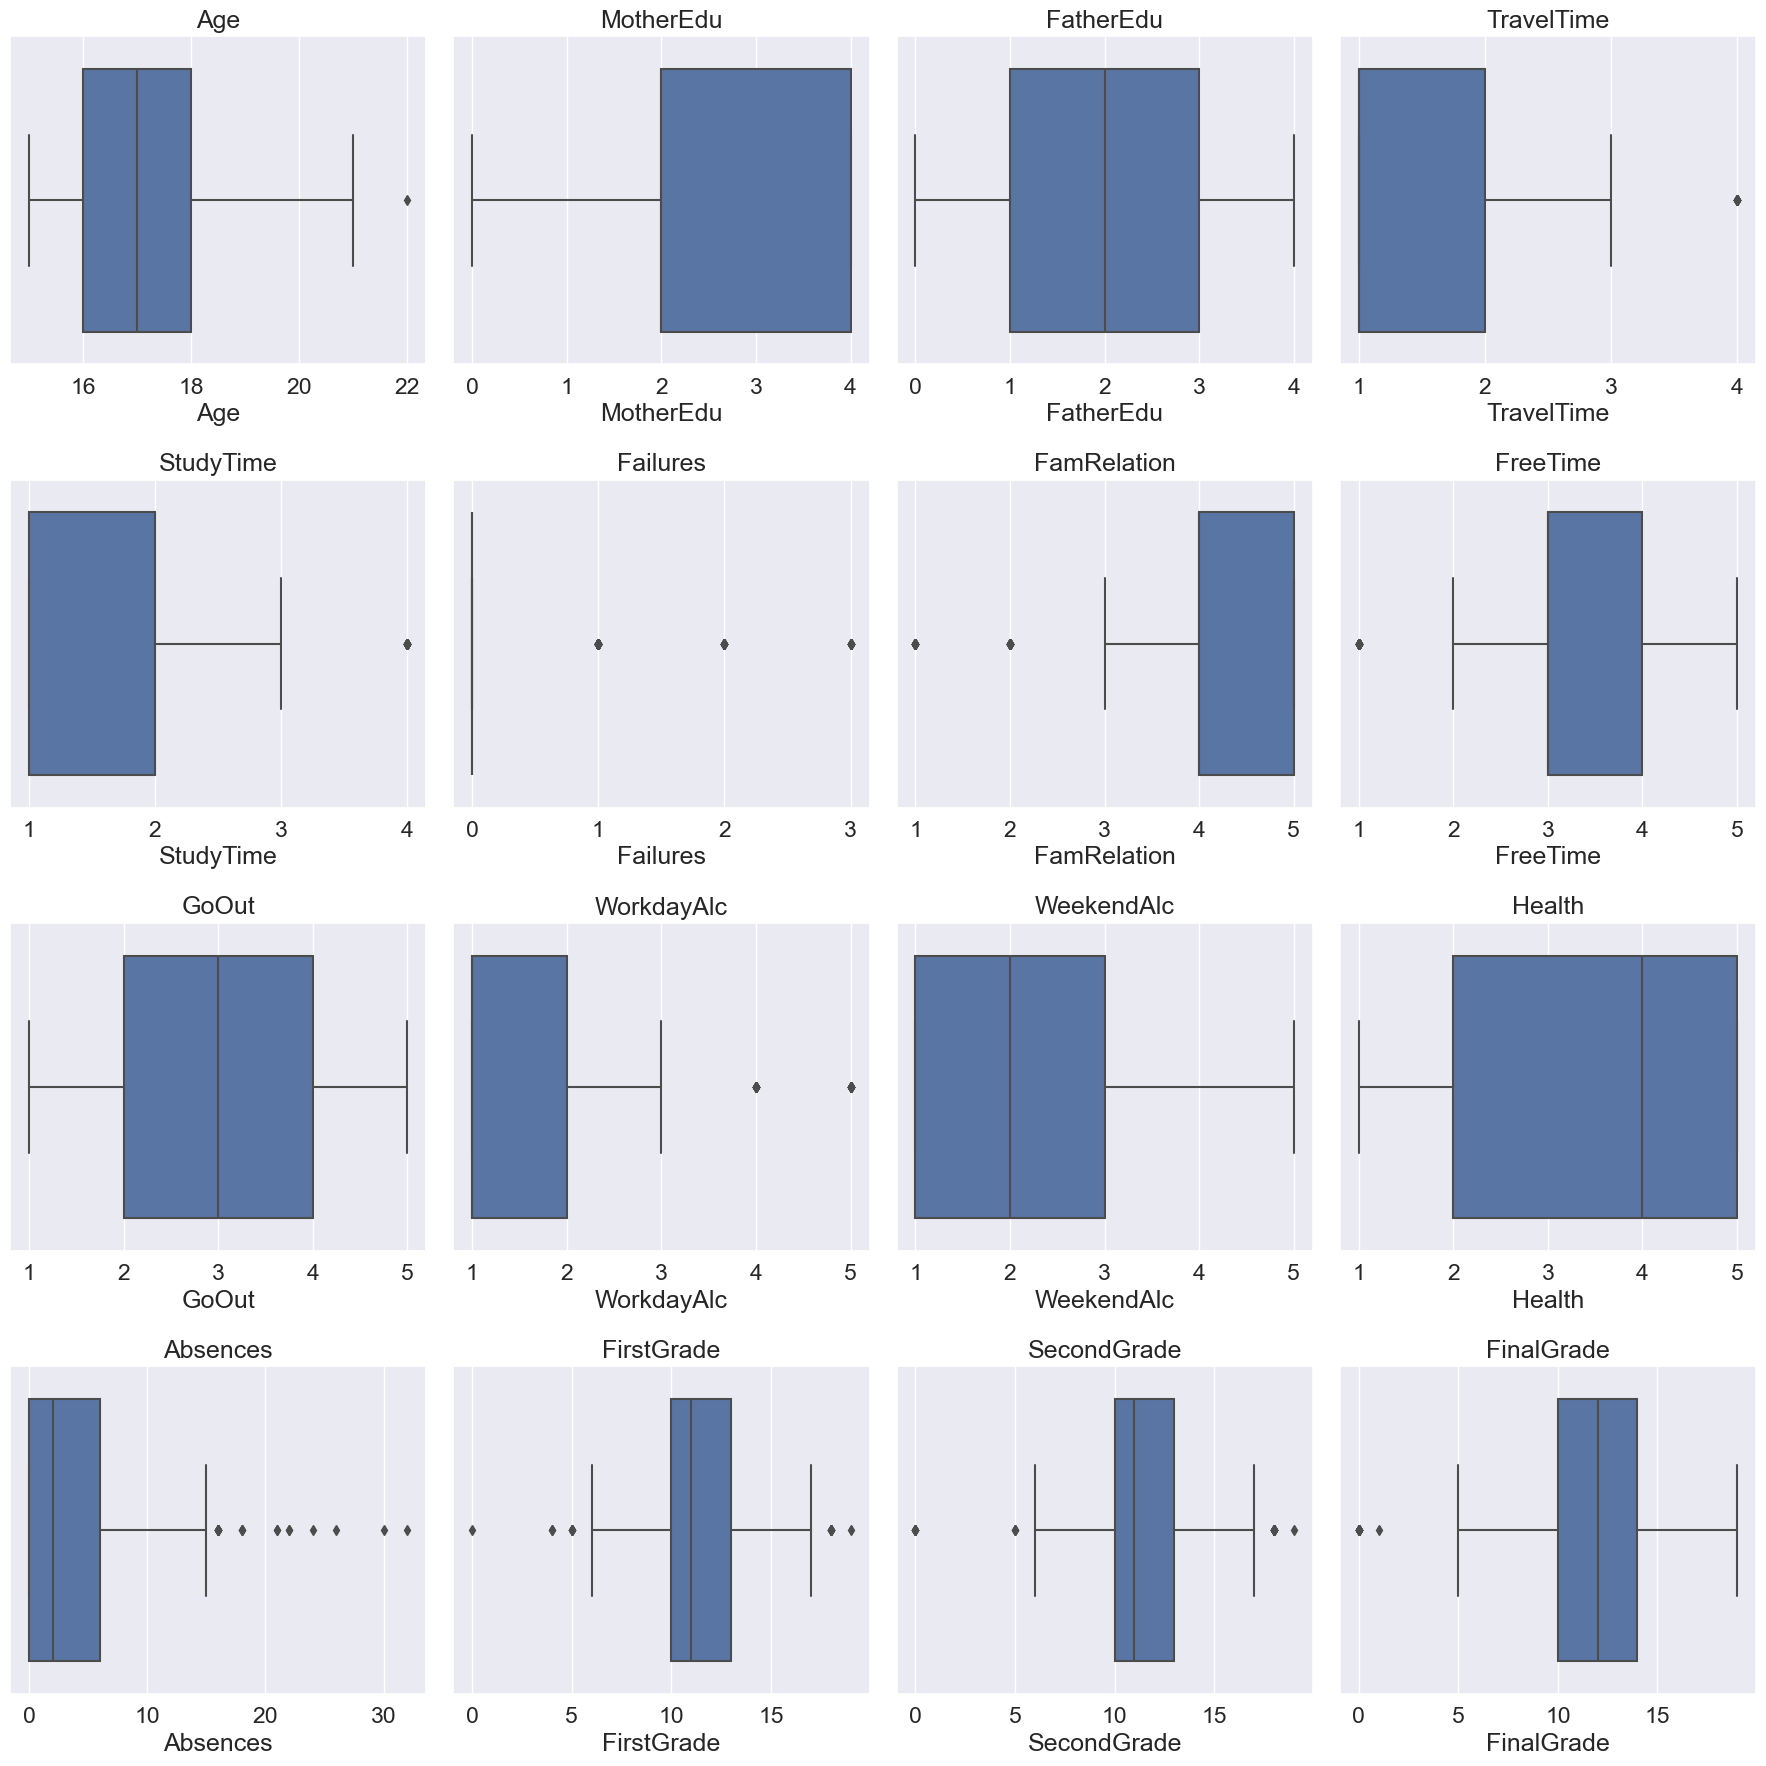

In [16]:
f, axes = plt.subplots(4, 4, figsize=(18, 18))

axes_positions = [(i, j) for i in range(4) for j in range(4)]

for column, pos in zip(df_porNum.columns, axes_positions):
    ax = sb.boxplot(x=df_porNum[column], ax=axes[pos]) #showfliers = true
    ax.set_title(column)

plt.tight_layout()
plt.show()

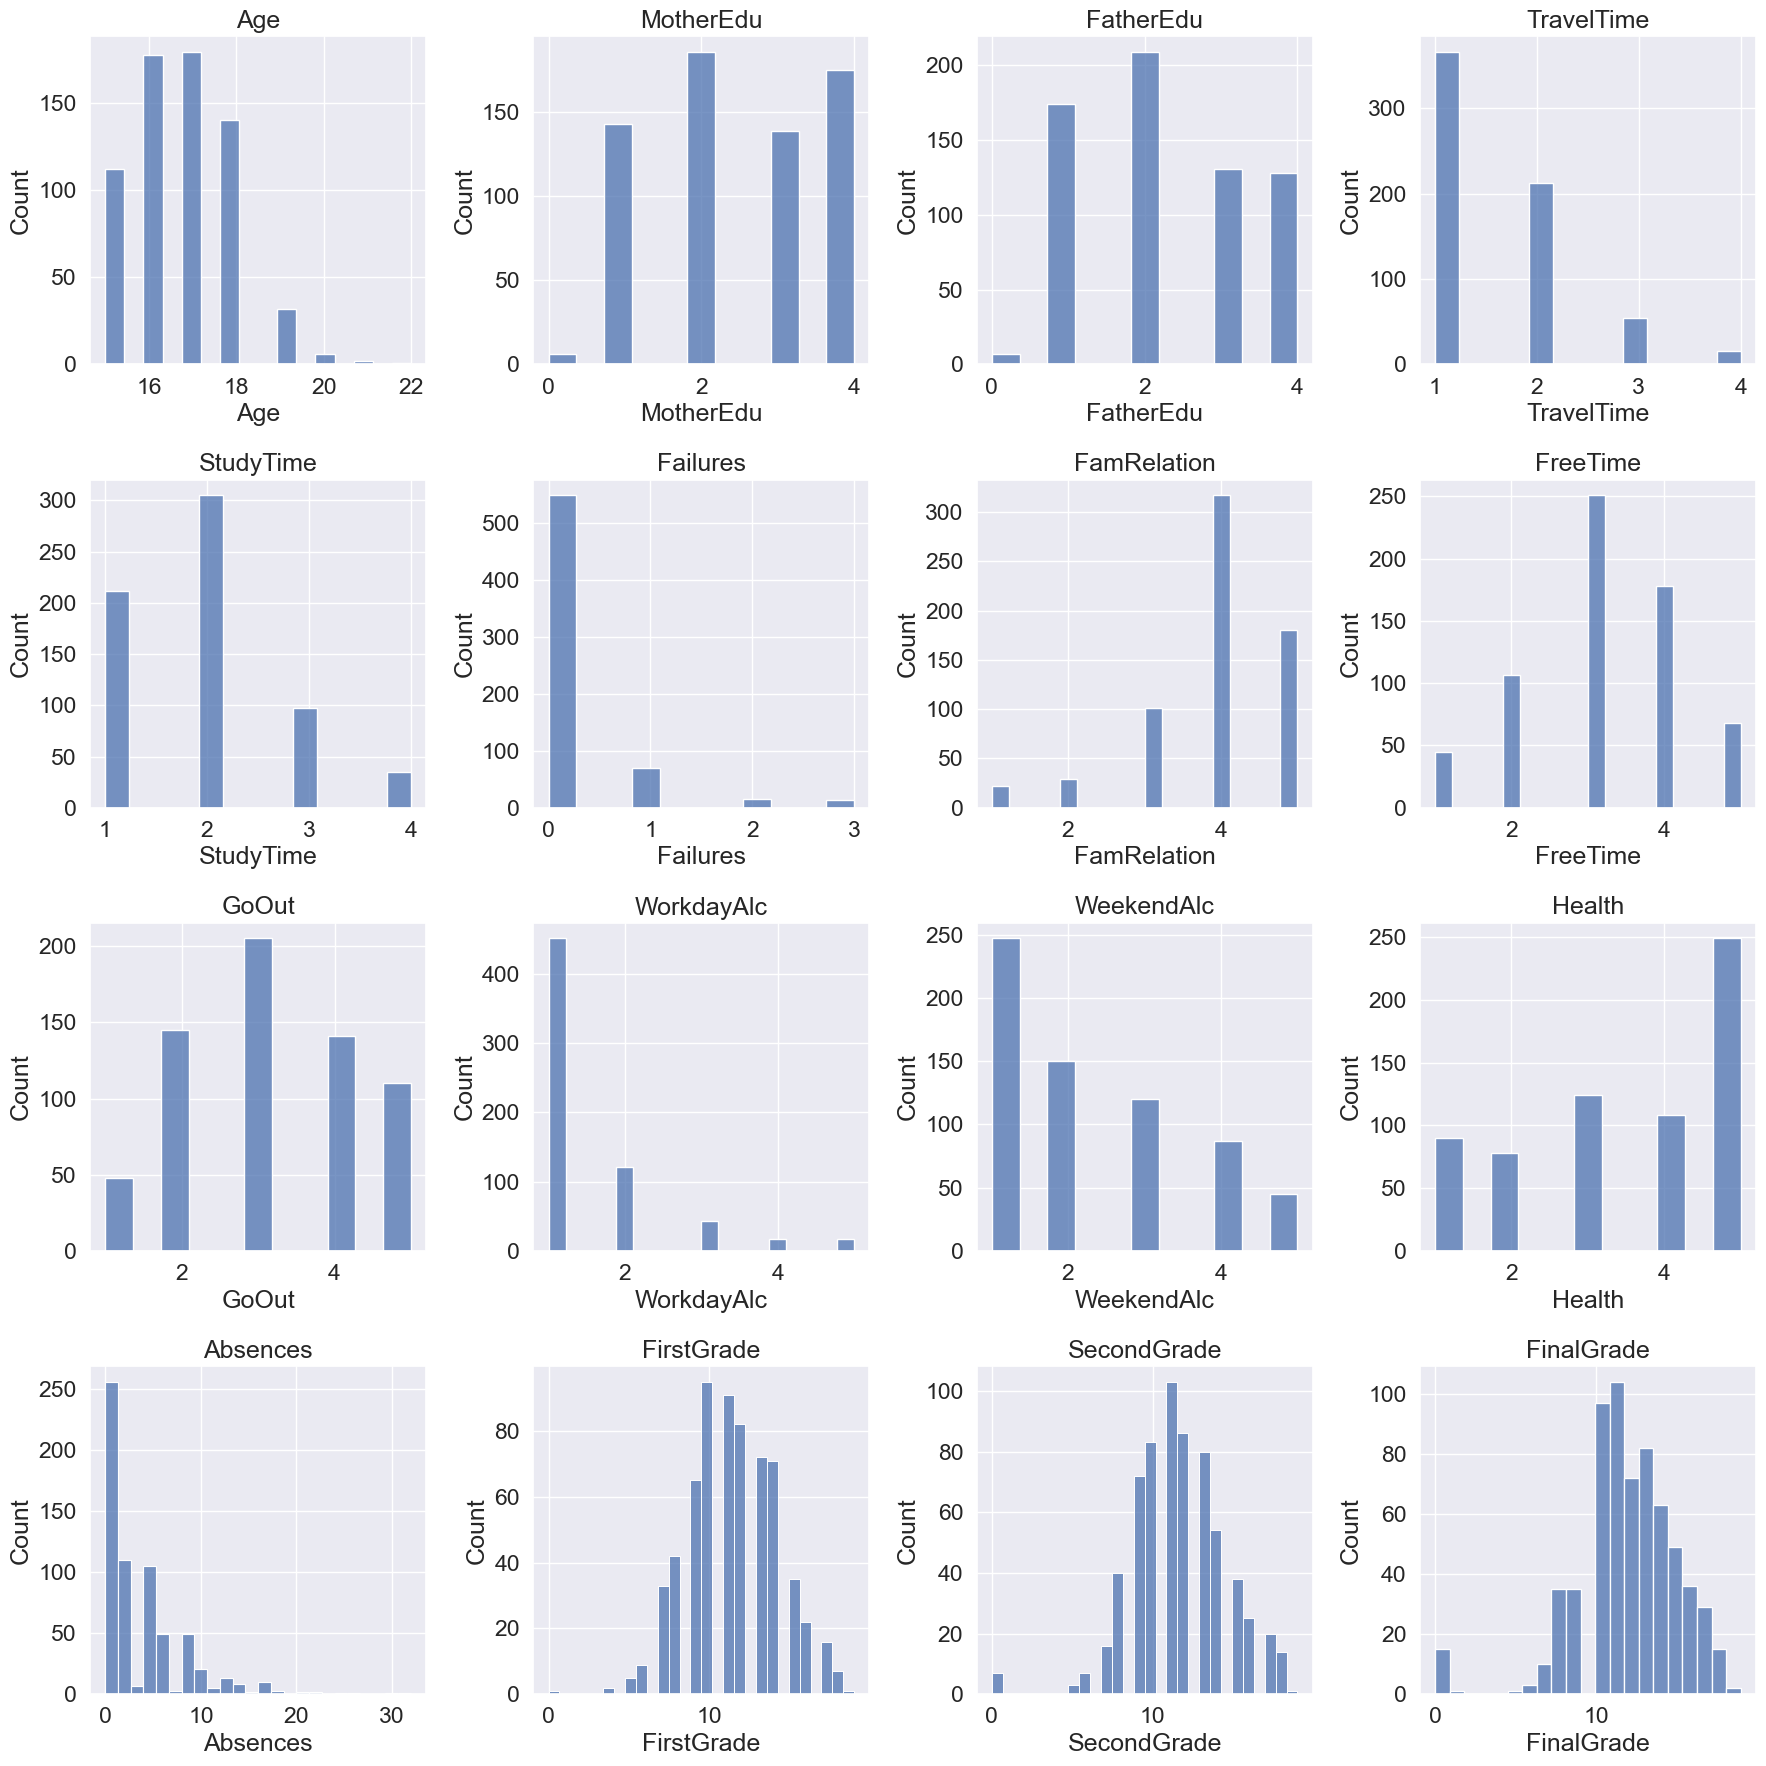

In [17]:
f, axes = plt.subplots(4, 4, figsize=(18, 18))

axes_positions = [(i, j) for i in range(4) for j in range(4)]

for column, pos in zip(df_porNum.columns, axes_positions):
    ax = sb.histplot(x=df_porNum[column], ax=axes[pos]) #showfliers = true
    ax.set_title(column)

plt.tight_layout()
plt.show()

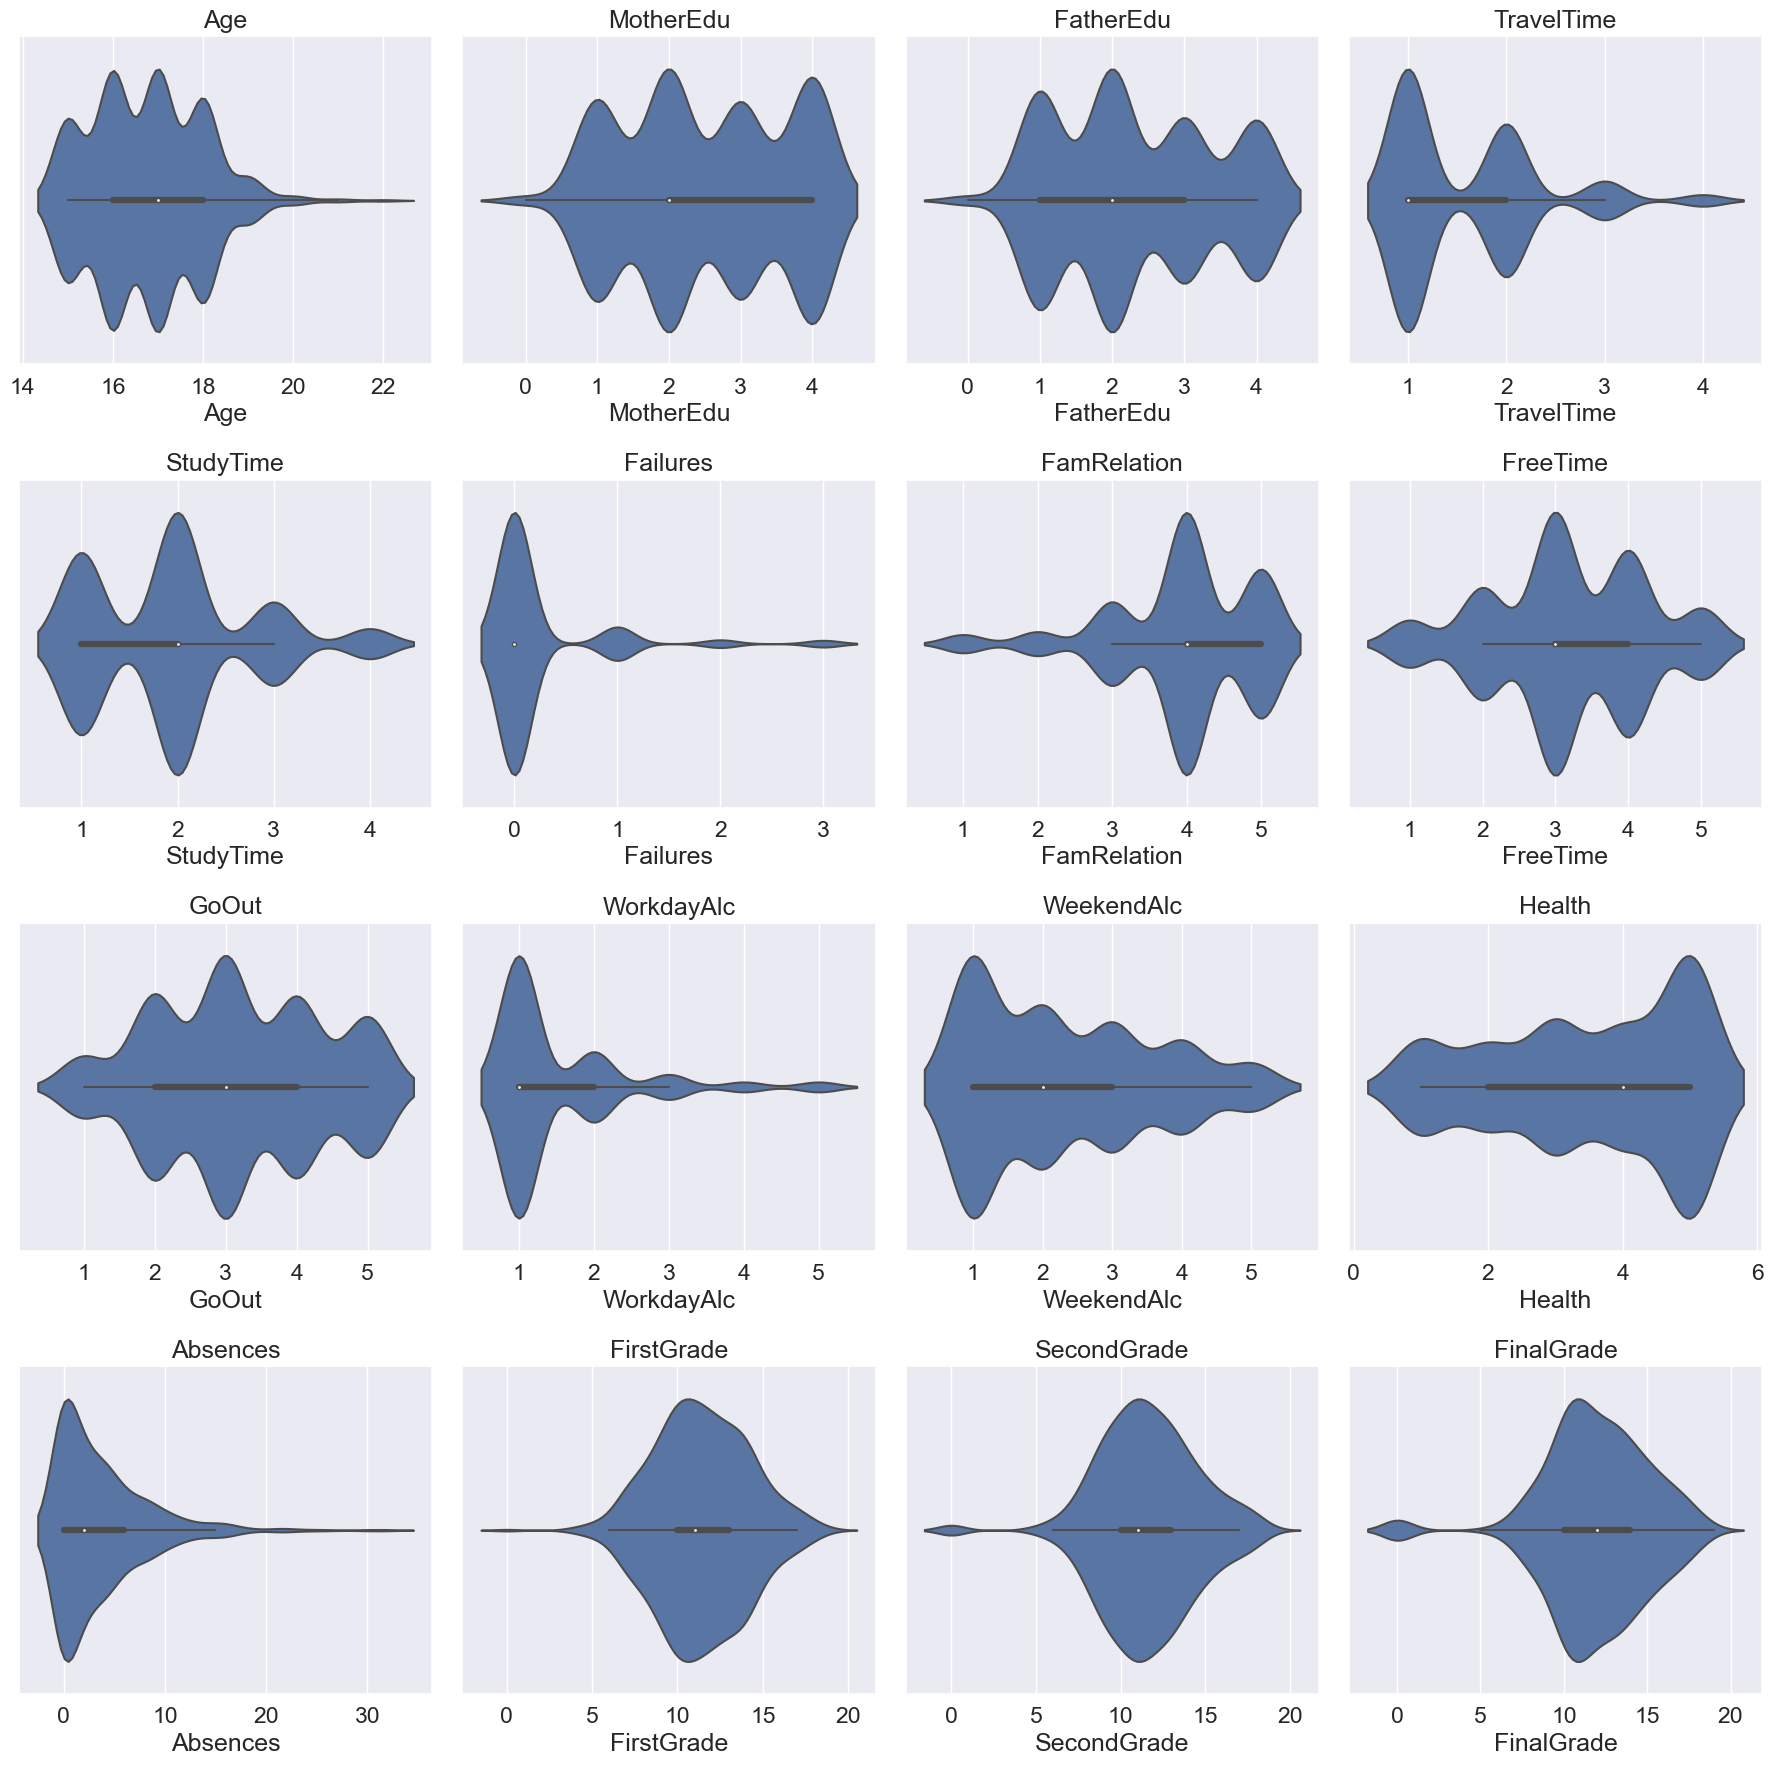

In [18]:
f, axes = plt.subplots(4, 4, figsize=(18, 18))

axes_positions = [(i, j) for i in range(4) for j in range(4)]

for column, pos in zip(df_porNum.columns, axes_positions):
    ax = sb.violinplot(x=df_porNum[column], ax=axes[pos]) #showfliers = true
    ax.set_title(column)

plt.tight_layout()
plt.show()

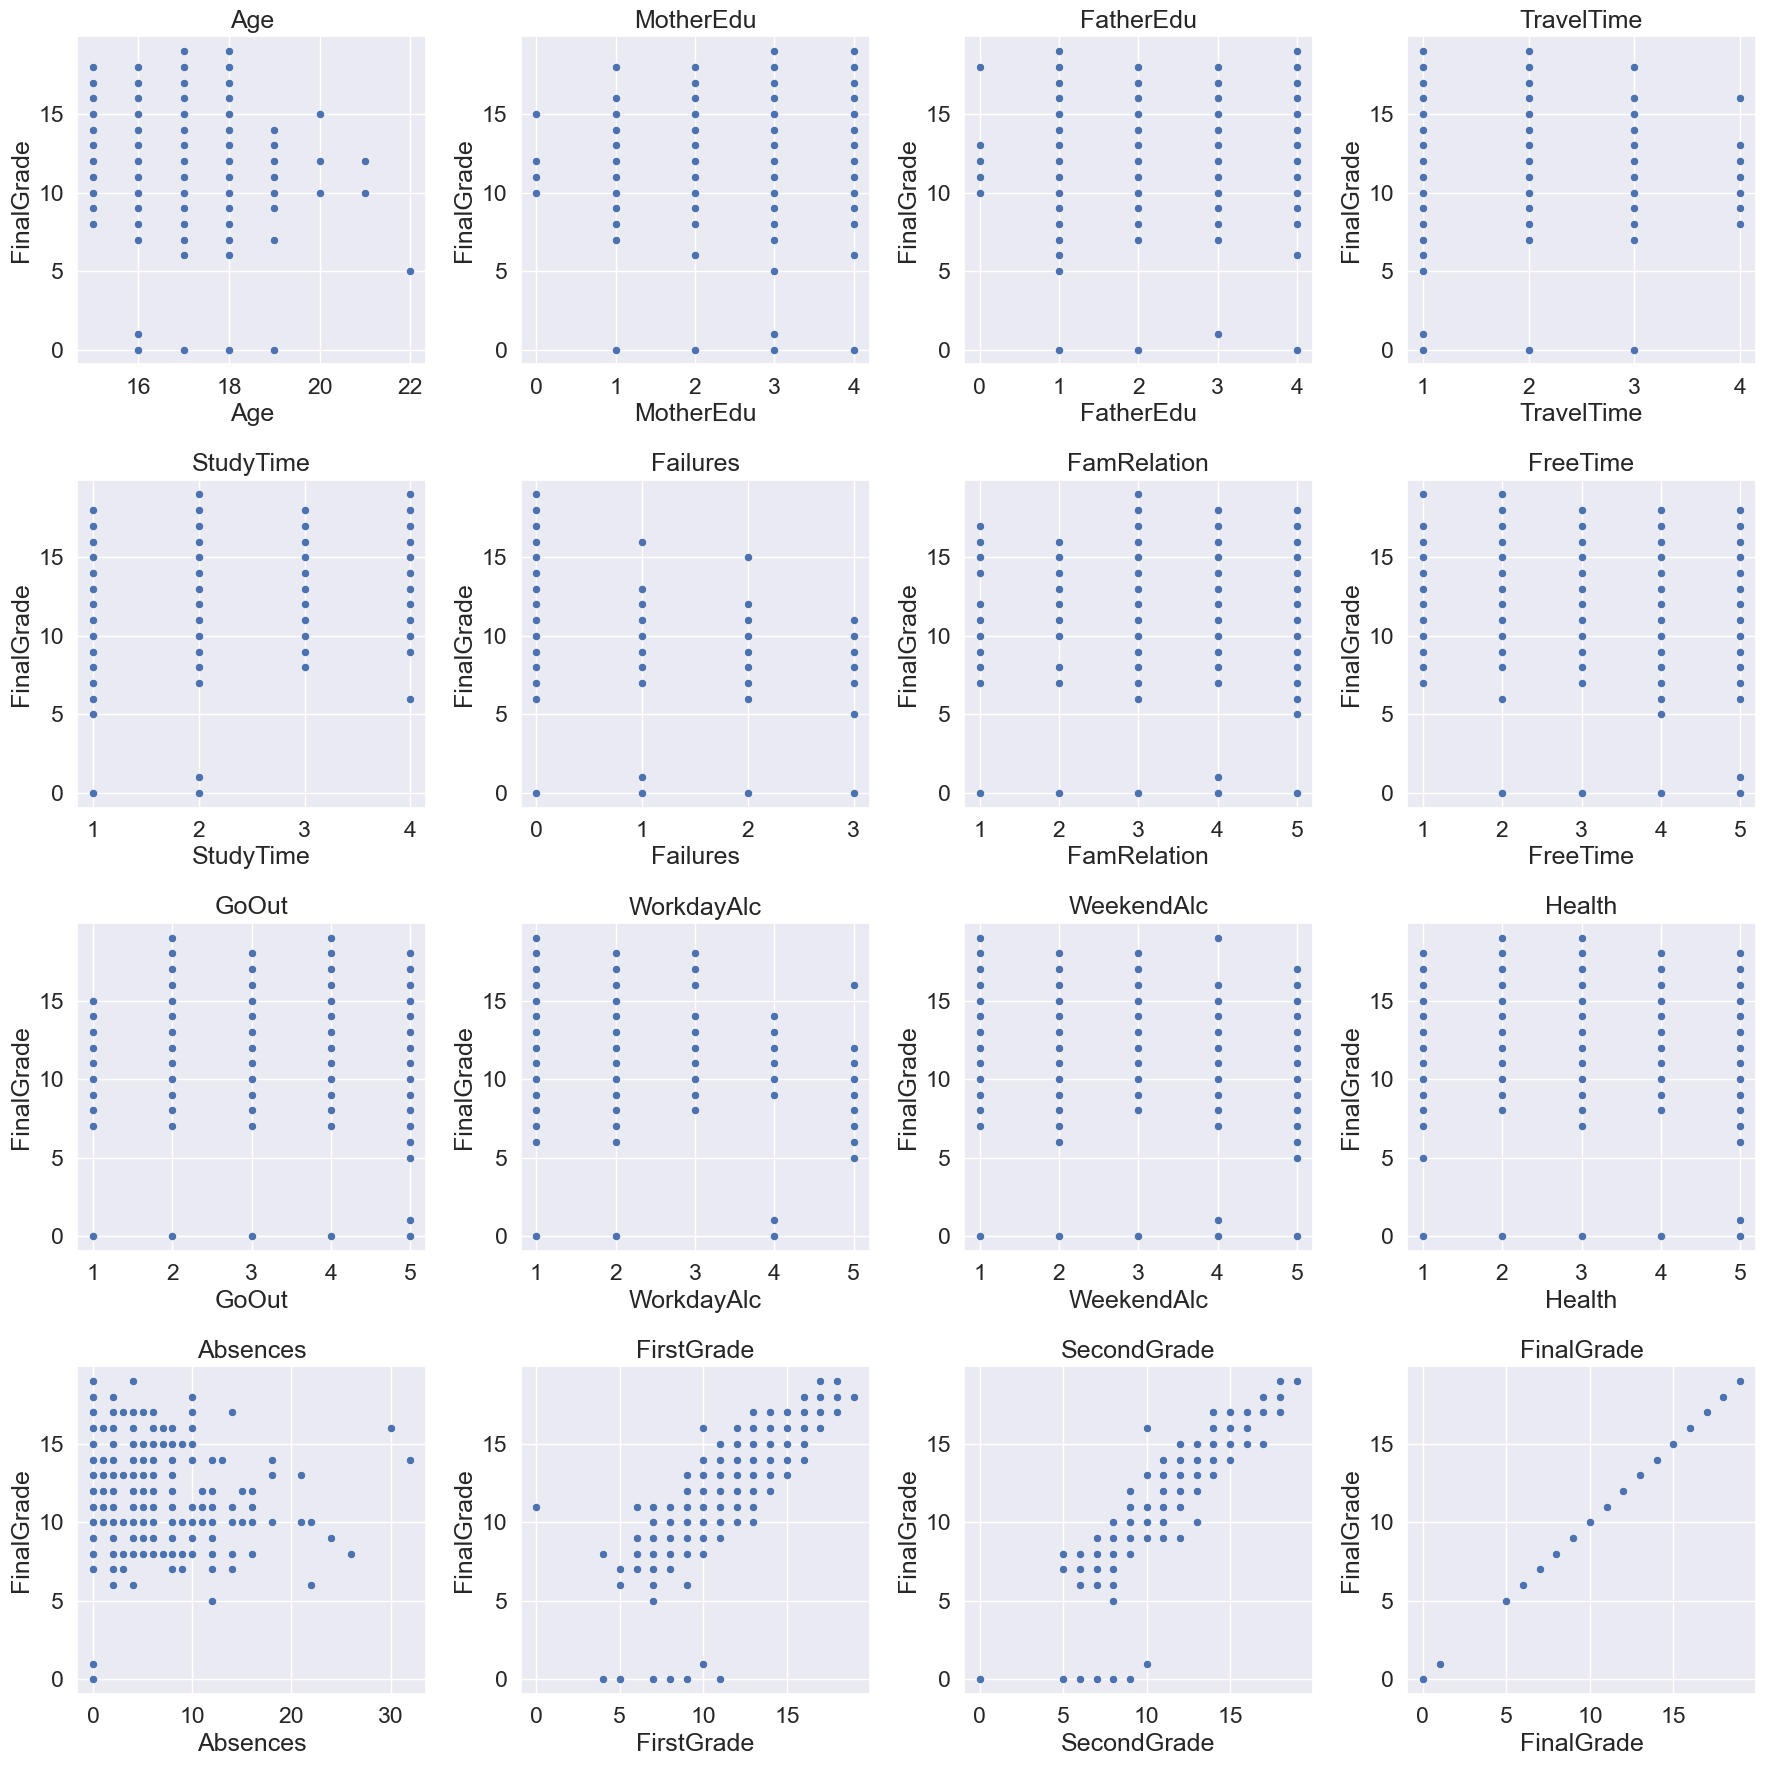

In [19]:
f, axes = plt.subplots(4, 4, figsize=(18, 18))

axes_positions = [(i, j) for i in range(4) for j in range(4)]

for column, pos in zip(df_porNum.columns, axes_positions):
    ax = sb.scatterplot(x=df_porNum[column], y=df_porNum['FinalGrade'], ax=axes[pos])
    ax.set_title(column)

plt.tight_layout()
plt.show()

<h3>Catgorical Columns Analysis</h3>

In [20]:
# Extract categorical
df_por_categorical = df_por.drop(numVar, axis=1)
df_por_categorical

School Sex Address FamilySize ParentsCohab MotherJob FatherJob  Reason  \
0       GP   F       U        GT3            A   at_home   teacher  course   
1       GP   F       U        GT3            T   at_home     other  course   
2       GP   F       U        LE3            T   at_home     other   other   
3       GP   F       U        GT3            T    health  services    home   
4       GP   F       U        GT3            T     other     other    home   
..     ...  ..     ...        ...          ...       ...       ...     ...   
644     MS   F       R        GT3            T  services     other  course   
645     MS   F       U        LE3            T   teacher  services  course   
646     MS   F       U        GT3            T     other     other  course   
647     MS   M       U        LE3            T  services  services  course   
648     MS   M       R        LE3            T  services     other  course   

    Guardian SchoolSup FamSup Paid Activities Nursery Higher Internet Romantic  
0     mother       yes     no   no         no     yes    yes       no       no  
1     father        no    yes   no         no      no    yes      yes       no  
2     mother       yes     no   no         no     yes    yes      yes       no  
3     mother        no    yes   no        yes     yes    yes      yes      yes  
4     father        no    yes   no         no     yes    yes       no       no  
..       ...       ...    ...  ...        ...     ...    ...      ...      ...  
644   mother        no     no   no        yes      no    yes      yes       no  
645   mother        no    yes   no         no     yes    yes      yes       no  
646   mother        no     no   no        yes     yes    yes       no       no  
647   mother        no     no   no         no      no    yes      yes       no  
648   mother        no     no   no         no      no    yes      yes       no  

[649 rows x 17 columns]

<h4>Count Plot</h4>

The frequency of each class label of each categorical column is visualised using count plot.

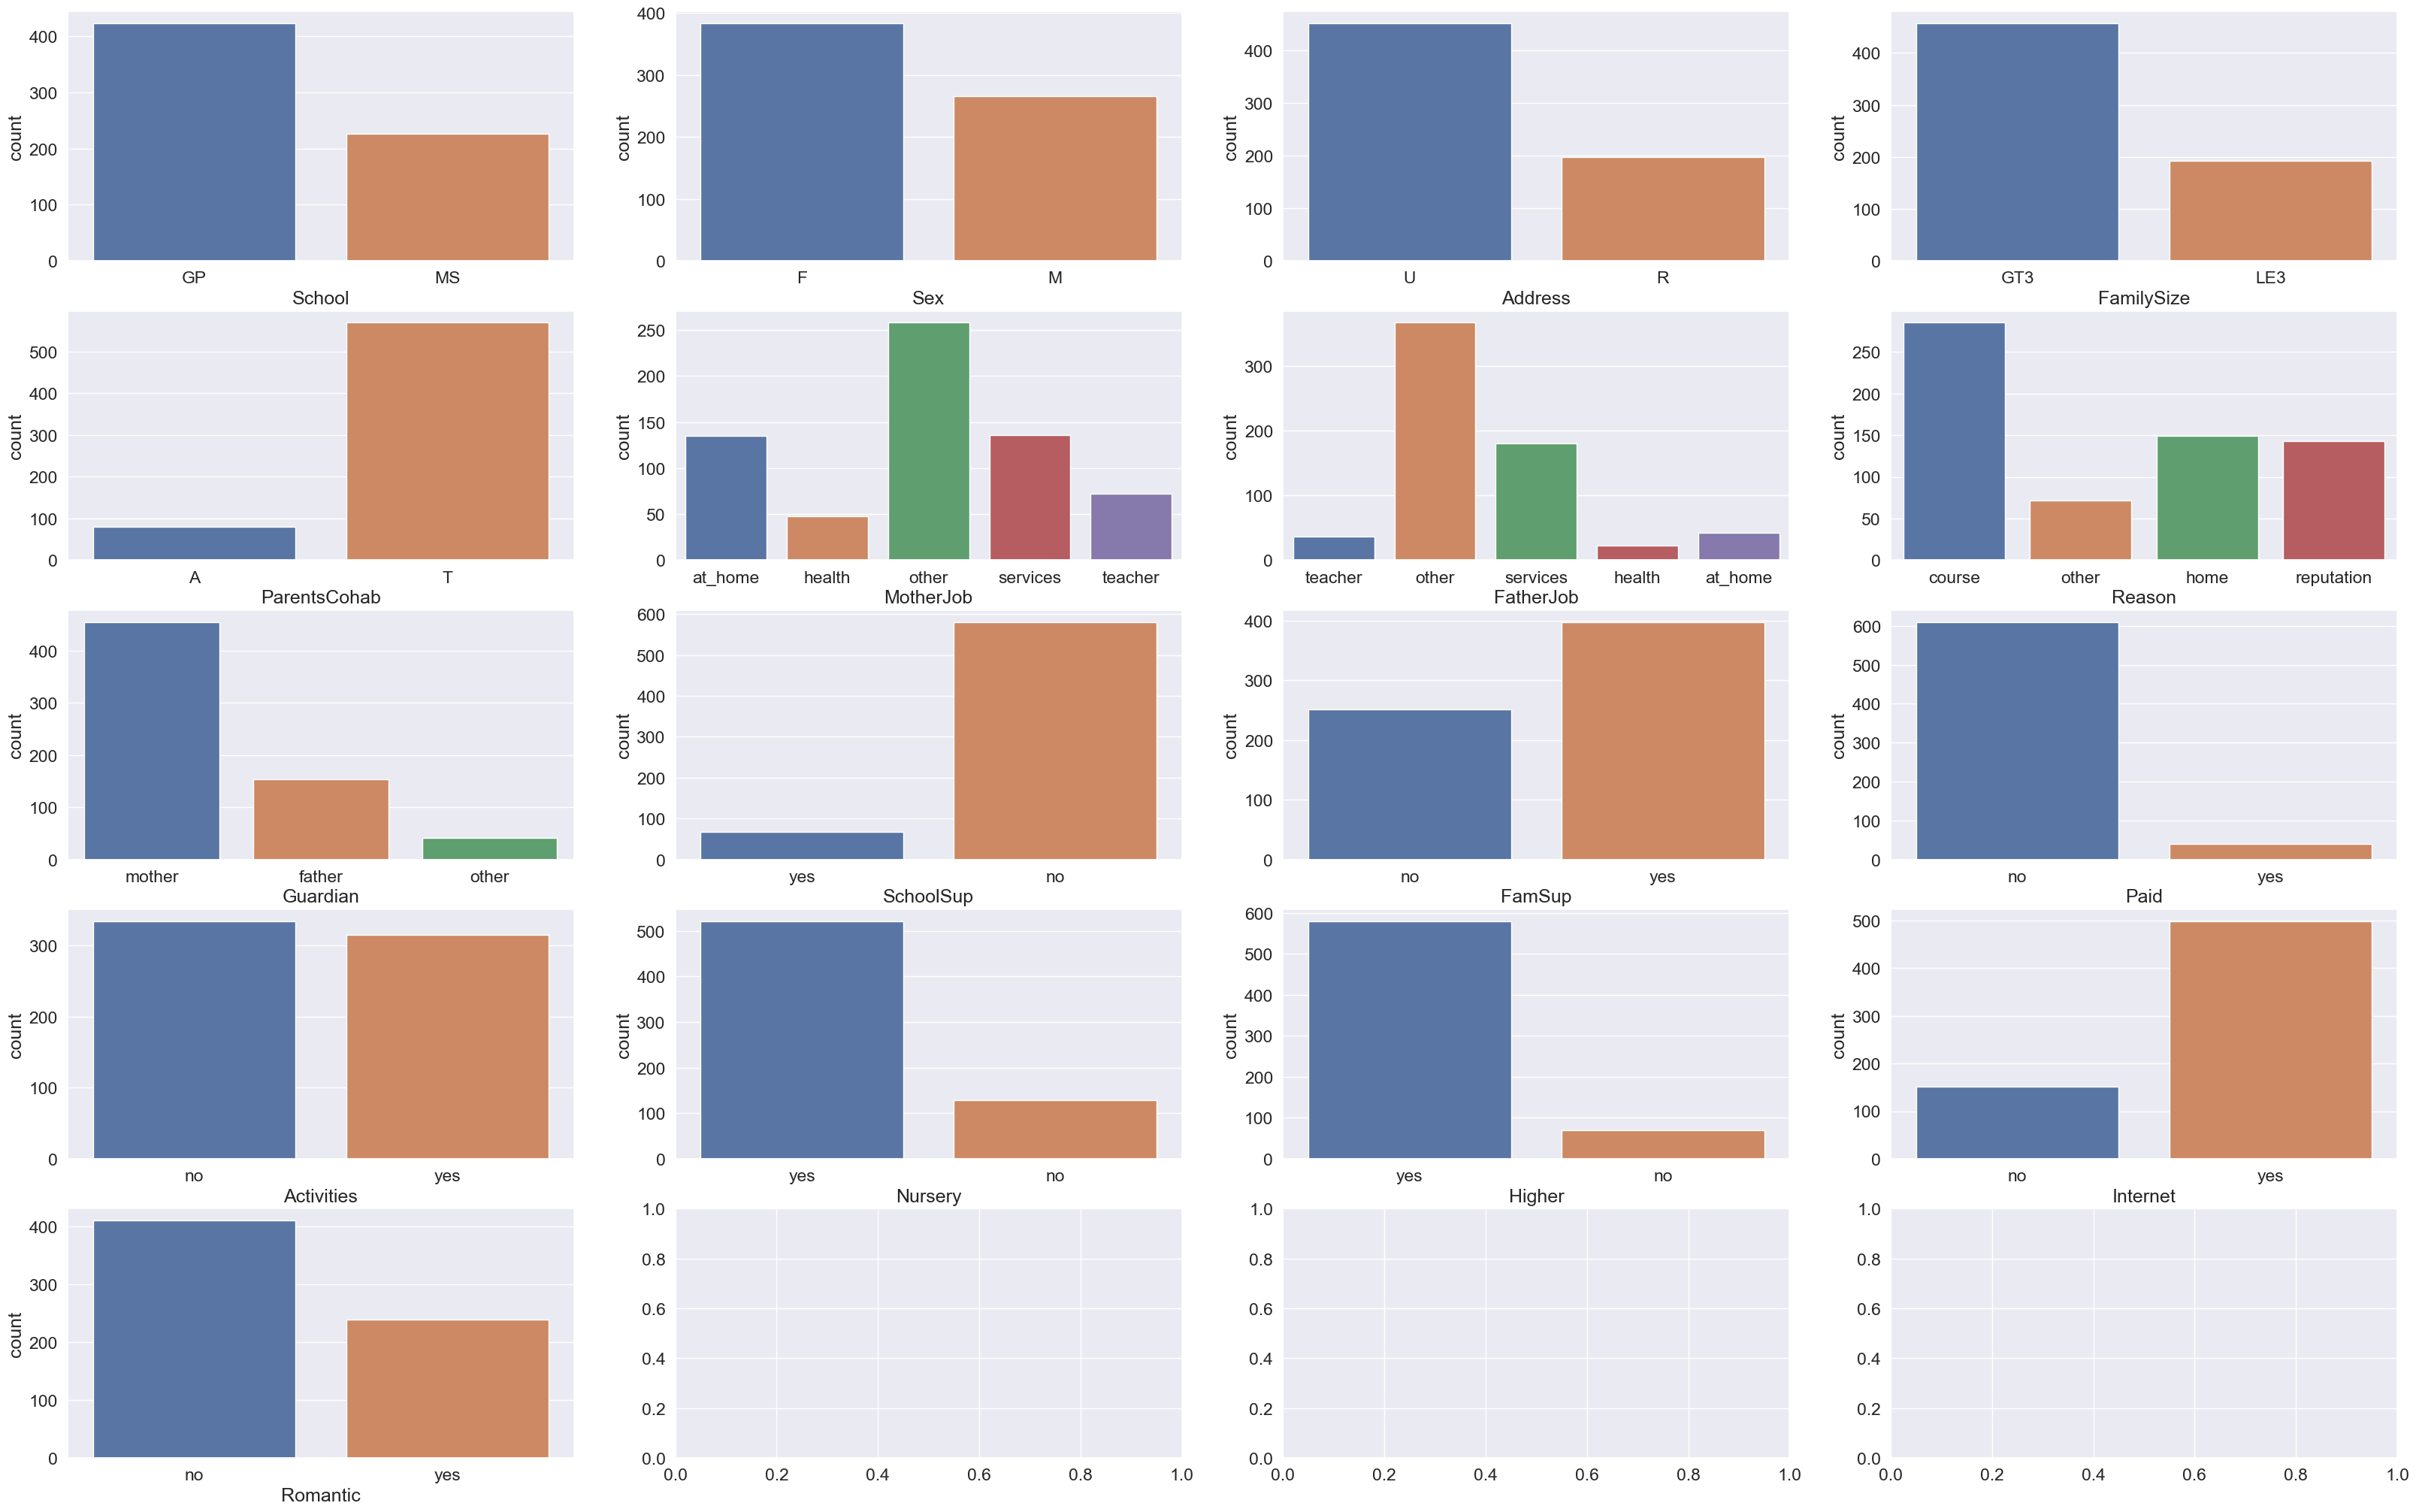

In [21]:
fig, ax1 = plt.subplots(5, 4, figsize=(40, 25))
x_counter = 0
y_counter = 0
for i in df_por_categorical.columns:
    if y_counter == 4:
        y_counter = 0
        x_counter = x_counter + 1
    
    sb.countplot(ax = ax1[x_counter, y_counter], x = df_por_categorical[i]);
    
    y_counter = y_counter + 1

In [22]:
# Percentages
print("Composition of Class Labels:")
df_por_categorical_size = len(df_por_categorical)
for i in df_por_categorical.columns:
    print(i)
    for j in df_por_categorical[i].unique():
        percent = df_por_categorical[i].value_counts()[j] / df_por_categorical_size
        print("{0:.3f}".format(percent*100) + "%")
    print()


Composition of Class Labels:
School
65.177%
34.823%

Sex
59.014%
40.986%

Address
69.646%
30.354%

FamilySize
70.416%
29.584%

ParentsCohab
12.327%
87.673%

MotherJob
20.801%
7.396%
39.753%
20.955%
11.094%

FatherJob
5.547%
56.549%
27.889%
3.544%
6.471%

Reason
43.914%
11.094%
22.958%
22.034%

Guardian
70.108%
23.575%
6.317%

SchoolSup
10.478%
89.522%

FamSup
38.675%
61.325%

Paid
93.991%
6.009%

Activities
51.464%
48.536%

Nursery
80.277%
19.723%

Higher
89.368%
10.632%

Internet
23.267%
76.733%

Romantic
63.174%
36.826%



<h3>Feature Selection</h3>

<h4>Correlation</h4>

Age           -0.106505
MotherEdu      0.240151
FatherEdu      0.211800
TravelTime    -0.127173
StudyTime      0.249789
Failures      -0.393316
FamRelation    0.063361
FreeTime      -0.122705
GoOut         -0.087641
WorkdayAlc    -0.204719
WeekendAlc    -0.176619
Health        -0.098851
Absences      -0.091379
FirstGrade     0.826387
SecondGrade    0.918548
FinalGrade     1.000000
Name: FinalGrade, dtype: float64



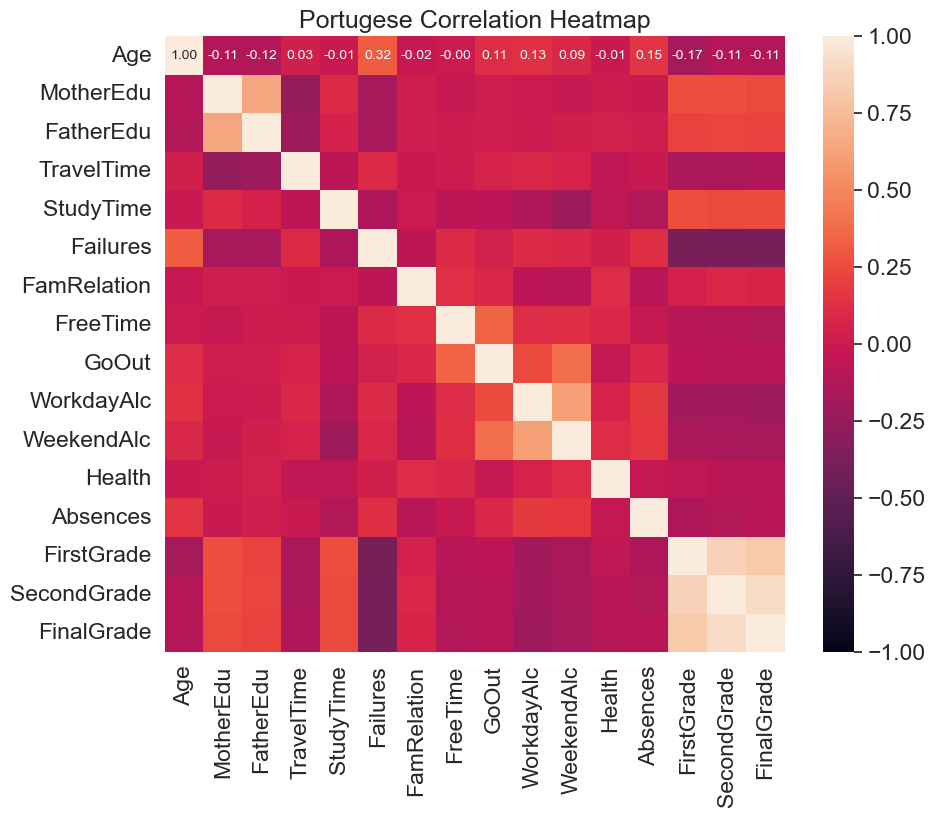

In [23]:
print(df_porNum.corr()['FinalGrade'])
print()

correlation_matrix = df_porNum.corr()

plt.figure(figsize=(10, 8))
sb.heatmap(correlation_matrix, vmin = -1, vmax = 1, annot=True, fmt=".2f", annot_kws={"size": 10})
plt.title('Portugese Correlation Heatmap')
plt.show()

Box Plot

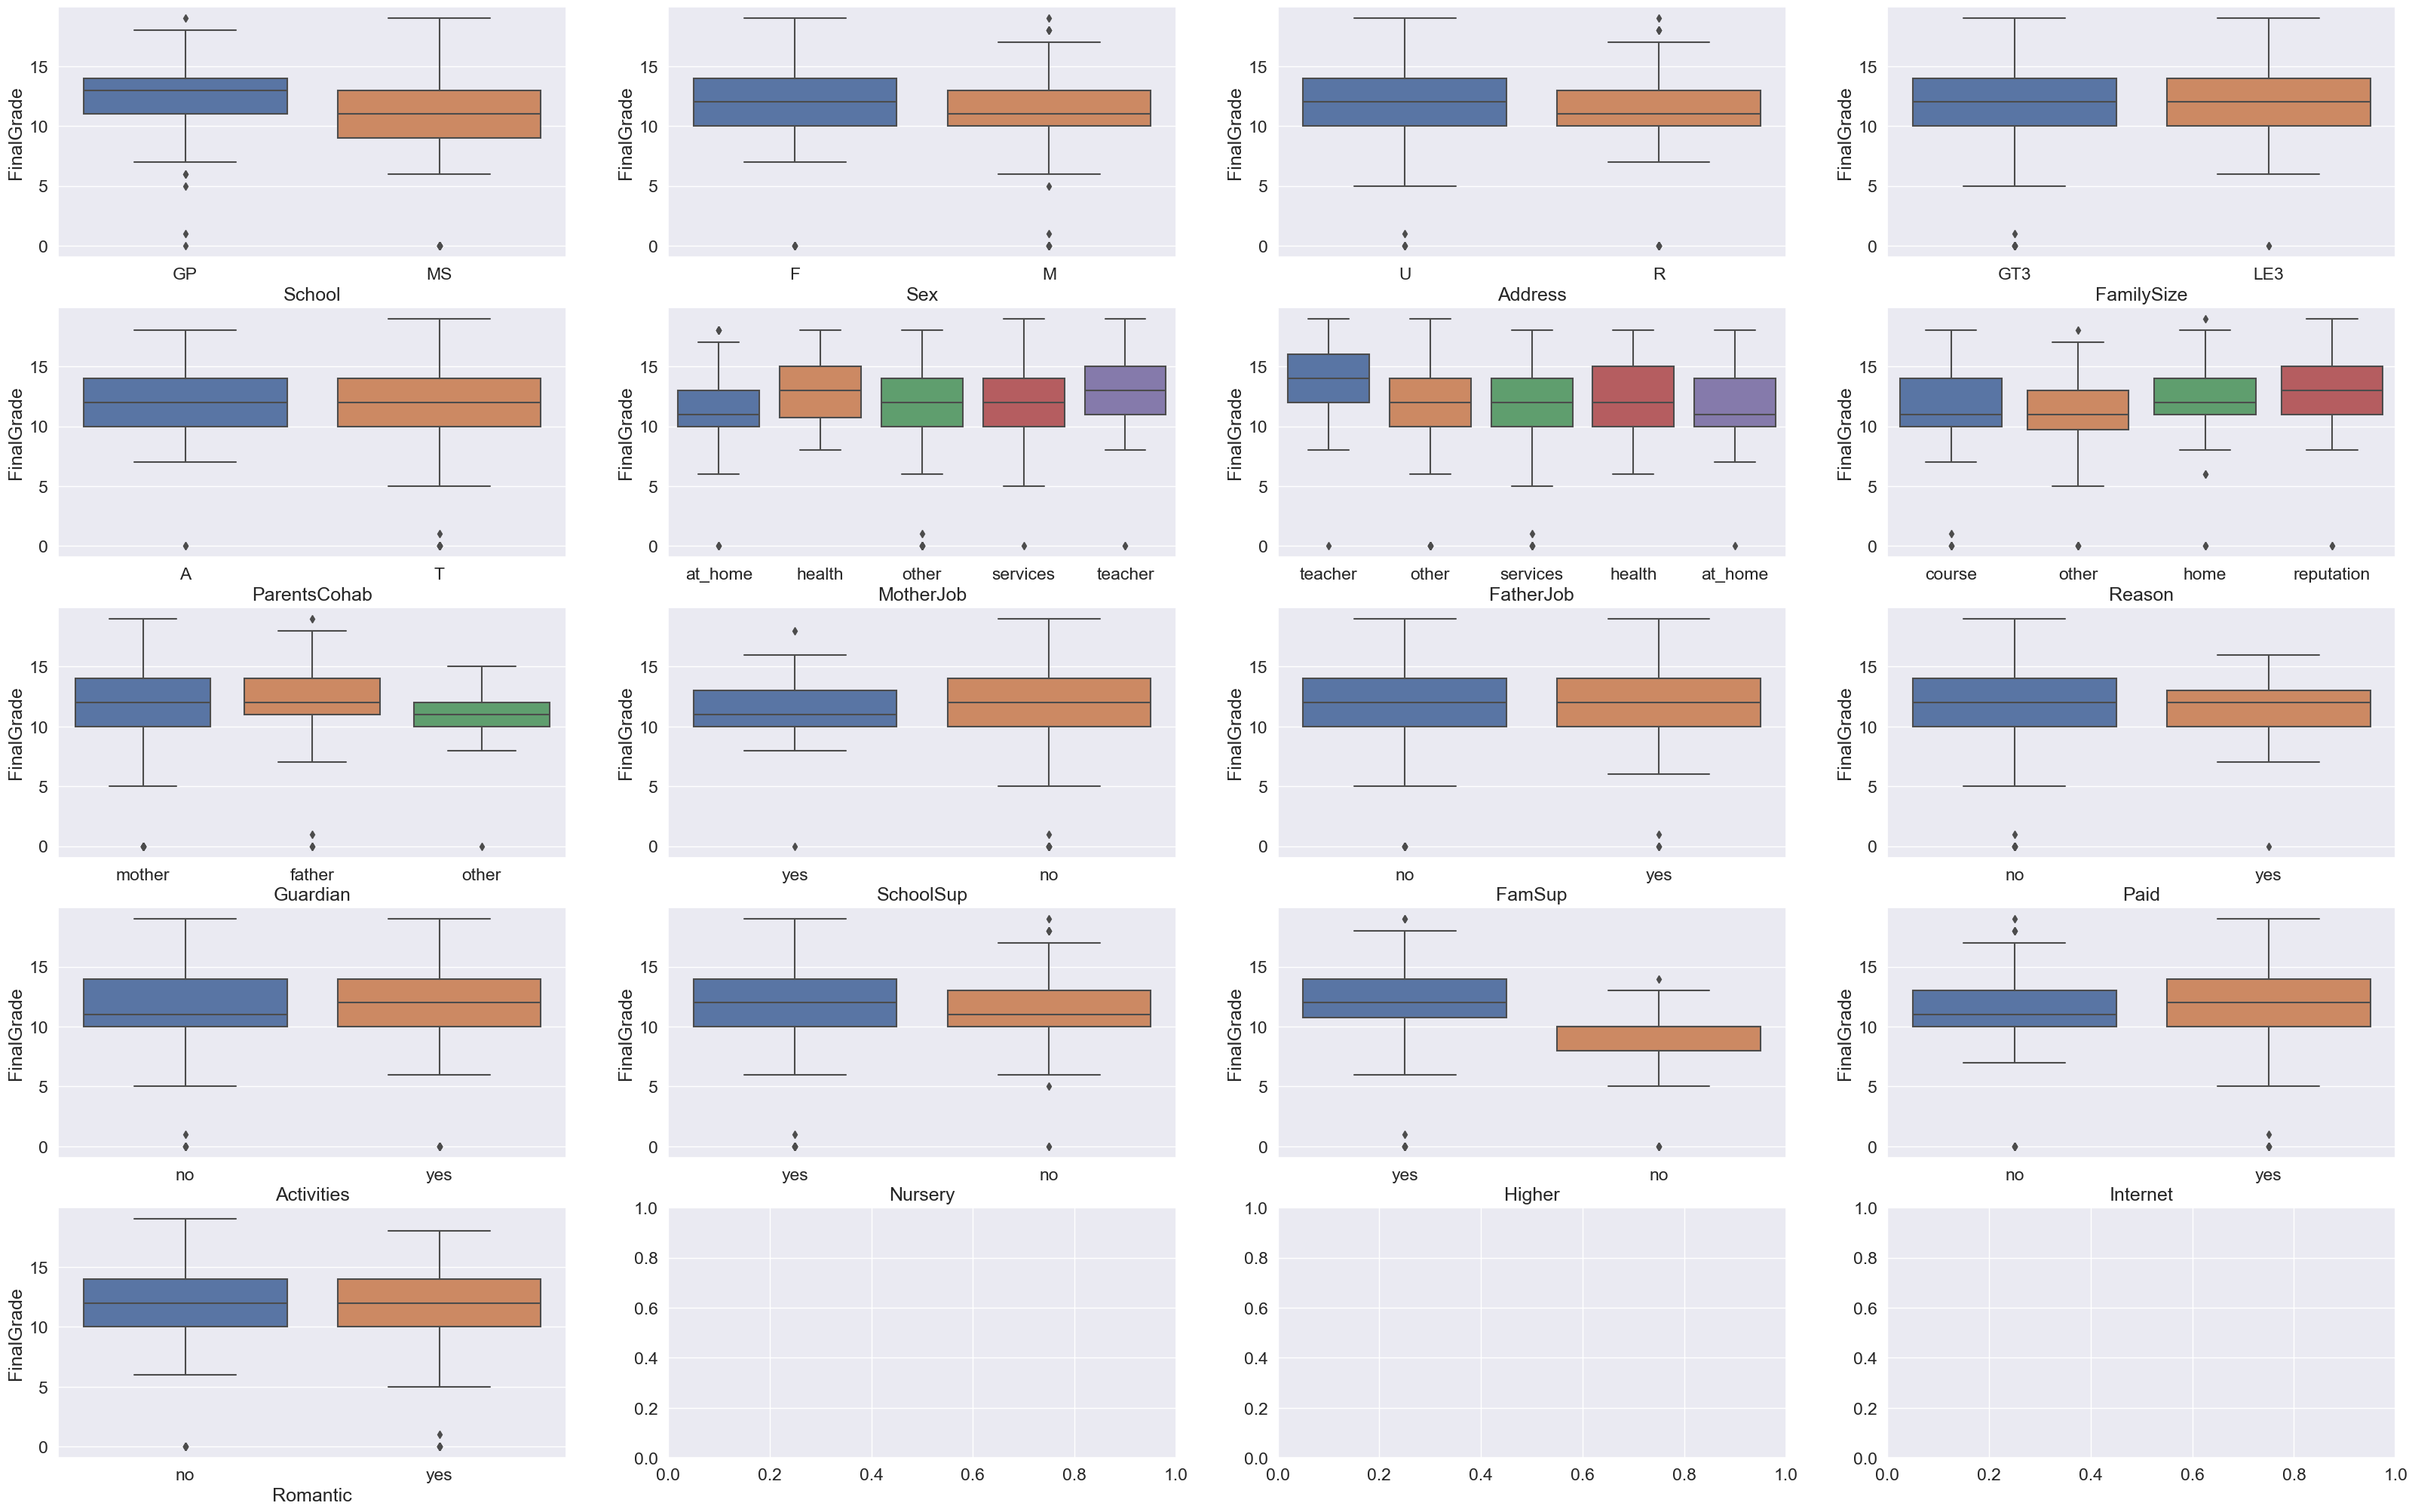

In [24]:
fig, ax1 = plt.subplots(5, 4, figsize=(40, 25))

x_counter = 0
y_counter = 0
for i in df_por_categorical.columns:
    if y_counter == 4:
        y_counter = 0
        x_counter = x_counter + 1
    
    sb.boxplot(ax=ax1[x_counter,y_counter], x=df_por_categorical[i], y=df_por['FinalGrade'])
    
    y_counter = y_counter + 1

<h4>Anova Test</h4>

In [25]:
## Get anova value of all categorical columns, with respect to G3
#column name, anova value
anova_dict = {} 
for i in df_por_categorical.columns:
    temp_column = []
    for j in df_por_categorical[i].unique():
        tempdf = df_por[df_por[i]==j]
        tempG3 = tempdf["FinalGrade"]
        temp_column.append(tempG3)
    anova_dict[i] = f_oneway(*temp_column)

In [26]:
chosen_columns = []
for key, item in anova_dict.items():
    if item[1] <= 0.05: # Retrieve such cols, pvalue threshold of 0.05 (standard value)
        chosen_columns.append(key)

chosen_columns

['School',
 'Sex',
 'Address',
 'MotherJob',
 'FatherJob',
 'Reason',
 'Higher',
 'Internet',
 'Romantic']

<h4>Chi Square Test</h4>

In [27]:
from itertools import combinations
# List of columns to compare

columns = ['School','Sex','Address','MotherJob','FatherJob','Reason','Higher','Internet','Romantic']

# Get all combinations of columns (2 at a time)
combinations = list(combinations(columns, 2))

for combo in combinations:
    # Create a cross-tabulation table
    cross_tab = pd.crosstab(df_por_categorical[combo[0]], df_por_categorical[combo[1]])

    # Perform the Chi-Square test
    chi2, p, dof, expected = chi2_contingency(cross_tab)

    # If p-value is less than 0.05, print the result
    if p < 0.05:
        print(f"Variables: {combo}")
        print("Chi-Square Statistic:", chi2)
        print("p-value:", p)
        print("\n")

Variables: ('School', 'Sex')
Chi-Square Statistic: 4.1288630616264985
p-value: 0.04215766518156701


Variables: ('School', 'Address')
Chi-Square Statistic: 79.95868104554208
p-value: 3.8232172009099793e-19


Variables: ('School', 'MotherJob')
Chi-Square Statistic: 37.87644454301279
p-value: 1.1882860634747262e-07


Variables: ('School', 'FatherJob')
Chi-Square Statistic: 21.365866062378167
p-value: 0.00026792486543093596


Variables: ('School', 'Reason')
Chi-Square Statistic: 52.52394157003515
p-value: 2.315976089451305e-11


Variables: ('School', 'Higher')
Chi-Square Statistic: 11.114728554949389
p-value: 0.0008564485828869608


Variables: ('School', 'Internet')
Chi-Square Statistic: 36.34875770087098
p-value: 1.6498433932592709e-09


Variables: ('Sex', 'MotherJob')
Chi-Square Statistic: 18.29723593971164
p-value: 0.0010794750355183676


Variables: ('Sex', 'Romantic')
Chi-Square Statistic: 7.415931288436628
p-value: 0.0064648842822434185


Variables: ('Address', 'MotherJob')
Chi-Squar

<h3>Model & Fine Tuning</h3>

POR
Categorical (<0.05 Chi-Square)
To remove School, Sex, Address, Mjob, Reason, Romantic

CHOSEN FEATURES


POR
Numerical (>=0.2m corr with G3)
- G2
- Failures
- Medu
- Dalc
- Study Time

Categorical (<0.05)
- higher
- internet

In [28]:
df_por_model = df_por.copy()
df_por_model

School Sex  Age Address FamilySize ParentsCohab  MotherEdu  FatherEdu  \
0       GP   F   18       U        GT3            A          4          4   
1       GP   F   17       U        GT3            T          1          1   
2       GP   F   15       U        LE3            T          1          1   
3       GP   F   15       U        GT3            T          4          2   
4       GP   F   16       U        GT3            T          3          3   
..     ...  ..  ...     ...        ...          ...        ...        ...   
644     MS   F   19       R        GT3            T          2          3   
645     MS   F   18       U        LE3            T          3          1   
646     MS   F   18       U        GT3            T          1          1   
647     MS   M   17       U        LE3            T          3          1   
648     MS   M   18       R        LE3            T          3          2   

    MotherJob FatherJob  ... FamRelation FreeTime  GoOut  WorkdayAlc  \
0     at_home   teacher  ...           4        3      4           1   
1     at_home     other  ...           5        3      3           1   
2     at_home     other  ...           4        3      2           2   
3      health  services  ...           3        2      2           1   
4       other     other  ...           4        3      2           1   
..        ...       ...  ...         ...      ...    ...         ...   
644  services     other  ...           5        4      2           1   
645   teacher  services  ...           4        3      4           1   
646     other     other  ...           1        1      1           1   
647  services  services  ...           2        4      5           3   
648  services     other  ...           4        4      1           3   

     WeekendAlc Health Absences FirstGrade SecondGrade FinalGrade  
0             1      3        4          0          11         11  
1             1      3        2          9          11         11  
2             3      3        6         12          13         12  
3             1      5        0         14          14         14  
4             2      5        0         11          13         13  
..          ...    ...      ...        ...         ...        ...  
644           2      5        4         10          11         10  
645           1      1        4         15          15         16  
646           1      5        6         11          12          9  
647           4      2        6         10          10         10  
648           4      5        4         10          11         11  

[649 rows x 33 columns]

In [29]:
df_por_model_categorical = df_por_model[['Higher', 'Internet']]
df_por_model_numerical = df_por_model[["SecondGrade", "Failures", "MotherEdu", "WorkdayAlc", "StudyTime"]]
print("Categorical columns: ", df_por_model_categorical.shape)
print("Numerical columns: ", df_por_model_numerical.shape)

Categorical columns:  (649, 2)
Numerical columns:  (649, 5)


<h4>One Hot Encoding (Categorical)</h4>

In [30]:
# One Hot Encoding
encoded_df = pd.get_dummies(df_por_model_categorical, columns=['Higher', 'Internet'])
df_por_model = pd.concat([encoded_df, df_por_model_numerical], axis=1)
df_por_model

Higher_no  Higher_yes  Internet_no  Internet_yes  SecondGrade  Failures  \
0        False        True         True         False           11         0   
1        False        True        False          True           11         0   
2        False        True        False          True           13         0   
3        False        True        False          True           14         0   
4        False        True         True         False           13         0   
..         ...         ...          ...           ...          ...       ...   
644      False        True        False          True           11         1   
645      False        True        False          True           15         0   
646      False        True         True         False           12         0   
647      False        True        False          True           10         0   
648      False        True        False          True           11         0   

     MotherEdu  WorkdayAlc  StudyTime  
0            4           1          2  
1            1           1          2  
2            1           2          2  
3            4           1          3  
4            3           1          2  
..         ...         ...        ...  
644          2           1          3  
645          3           1          2  
646          1           1          2  
647          3           3          1  
648          3           3          1  

[649 rows x 9 columns]

<h4>Split Data</h4>

In [31]:
X_train, X_test, y_train, y_test = train_test_split(df_por_model, df_por["FinalGrade"], test_size=0.2, random_state=42)
print("X train: ", X_train.shape)
print("y train: ", y_train.shape)
print("X test: ", X_test.shape)
print("y test: ", y_test.shape)

X train:  (519, 9)
y train:  (519,)
X test:  (130, 9)
y test:  (130,)


<h4>Standard Scaling (Numerical)</h4>

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
scaled_x_train = scaler.transform(X_train)
scaled_x_test = scaler.transform(X_test)
print("X train: ", scaled_x_train.shape)
print("X test: ", scaled_x_test.shape)

X train:  (519, 9)
X test:  (130, 9)


<h4>Minimum Performance</h4>

In [33]:
df_por["FinalGrade"].mean()
y_true = np.array(df_por["FinalGrade"])
y_pred = np.zeros((649))
y_pred.fill(df_por["FinalGrade"].mean())

In [34]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
print("Metrics for just predicting Mean of FinalGrade")
print("MAE: ", mean_absolute_error(y_true, y_pred))
print("MSE: ", mean_squared_error(y_true, y_pred))

Metrics for just predicting Mean of FinalGrade
MAE:  2.4058822272501725
MSE:  10.421057879729629


<h4>Neural network</h4>

<h4>Model 1 (Base)</h4>

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(12, input_shape=(9,), activation='relu'))
model.add(Dense(1, activation='linear'))

In [36]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=["mse", "mae"])

In [37]:
por_history_model1 = model.fit(scaled_x_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 145.1922 - mae: 11.5558 - mse: 145.1922 - val_loss: 139.4922 - val_mae: 11.4672 - val_mse: 139.4922
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 131.1663 - mae: 10.9752 - mse: 131.1663 - val_loss: 136.2756 - val_mae: 11.3297 - val_mse: 136.2756
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 132.3259 - mae: 10.9868 - mse: 132.3259 - val_loss: 132.9684 - val_mae: 11.1867 - val_mse: 132.9684
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 126.6758 - mae: 10.7769 - mse: 126.6758 - val_loss: 129.5636 - val_mae: 11.0369 - val_mse: 129.5636
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 128.0060 - mae: 10.7595 - mse: 128.0060 - val_loss: 126.0532 - val_mae: 10.8816 - val_mse: 126.0532
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 122.5148 - mae: 10.5771 - mse: 122.5148 - val_loss: 122.4691 - val_mae: 10.7199 - val_mse: 122.4691
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms

13/13 [==============================] - 0s 4ms/step - loss: 3.2208 - mse: 3.2208 - mae: 1.2478 - val_loss: 1.7562 - val_mse: 1.7562 - val_mae: 0.9819
Epoch 100/100
13/13 [==============================] - 0s 4ms/step - loss: 3.1940 - mse: 3.1940 - mae: 1.2407 - val_loss: 1.7369 - val_mse: 1.7369 - val_mae: 0.9761


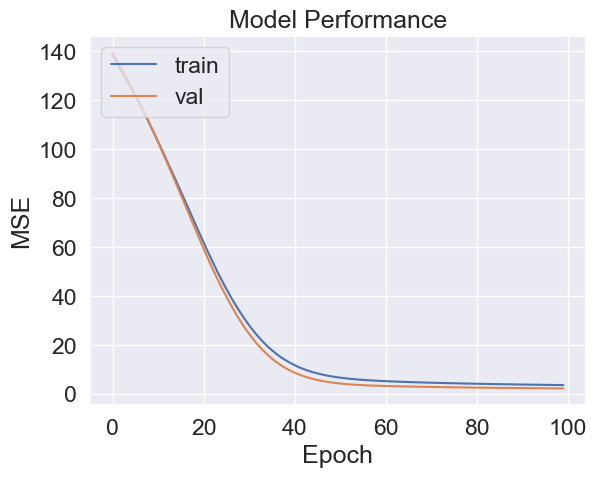

In [38]:
plt.plot(por_history_model1.history['mse'])
plt.plot(por_history_model1.history['val_mse'])
plt.title('Model Performance')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

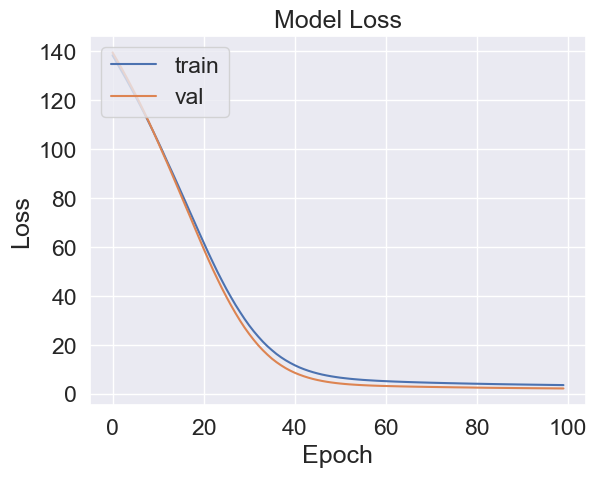

In [39]:
plt.plot(por_history_model1.history['loss'])
plt.plot(por_history_model1.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

<h4>Model 2</h4>

In [65]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model2 = Sequential()
model2.add(Dense(12, input_shape=(9,), activation='relu'))
model2.add(Dense(40, activation='relu'))
model2.add(Dense(1, activation='linear'))

In [66]:
model2.compile(loss='mean_squared_error', optimizer='adam', metrics=["mse", "mae"])

In [67]:
por_history_model2 = model2.fit(scaled_x_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 133.5600 - mae: 11.1237 - mse: 133.5600 - val_loss: 129.7385 - val_mae: 11.0925 - val_mse: 129.7385
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 121.6563 - mae: 10.6071 - mse: 121.6563 - val_loss: 119.5970 - val_mae: 10.6342 - val_mse: 119.5970
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 112.2796 - mae: 10.1294 - mse: 112.2796 - val_loss: 107.9463 - val_mae: 10.0800 - val_mse: 107.9463
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 98.9361 - mae: 9.4839 - mse: 98.9361 - val_loss: 94.4789 - val_mae: 9.3959 - val_mse: 94.4789
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 88.6533 - mae: 8.9403 - mse: 88.6533 - val_loss: 79.1799 - val_mae: 8.5488 - val_mse: 79.1799
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 74.8359 - mae: 8.1463 - mse: 74.8359 - val_loss: 62.7278 - val_mae: 7.5289 - val_mse: 62.7278
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 61.5

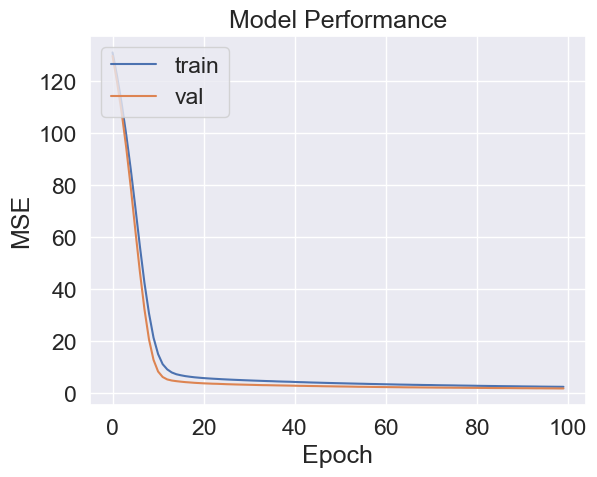

In [68]:
plt.plot(por_history_model2.history['mse'])
plt.plot(por_history_model2.history['val_mse'])
plt.title('Model Performance')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

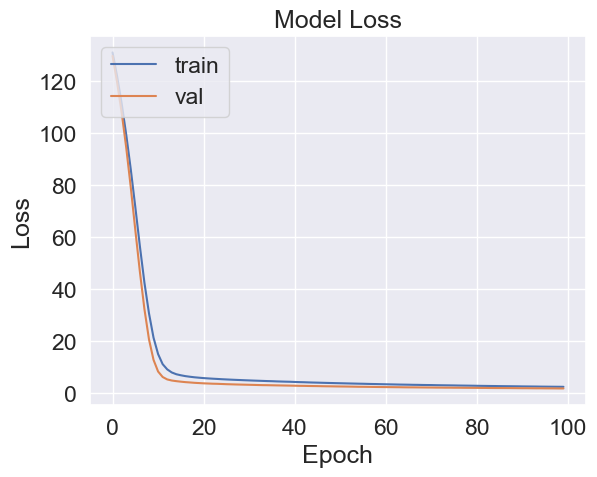

In [69]:
plt.plot(por_history_model2.history['loss'])
plt.plot(por_history_model2.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

<h4>Model 3</h4>

In [114]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2
model3 = Sequential()
model3.add(Dense(12, input_shape=(9,), activation='relu', kernel_regularizer=l2(0.01)))
model3.add(Dense(50, activation='relu'))
model3.add(Dense(1, activation='linear'))

In [115]:
model3.compile(loss='mean_squared_error', optimizer='adam', metrics=["mse", "mae"])

In [116]:
por_history_model3 = model3.fit(scaled_x_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 145.7714 - mae: 11.6096 - mse: 145.6606 - val_loss: 143.6151 - val_mae: 11.6923 - val_mse: 143.5040
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 141.6924 - mae: 11.4393 - mse: 141.5810 - val_loss: 135.5620 - val_mae: 11.3383 - val_mse: 135.4496
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 125.1355 - mae: 10.6781 - mse: 125.0226 - val_loss: 126.8741 - val_mae: 10.9376 - val_mse: 126.7592
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 117.6442 - mae: 10.2316 - mse: 117.5285 - val_loss: 116.9900 - val_mae: 10.4552 - val_mse: 116.8715
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 108.3128 - mae: 9.6505 - mse: 108.1931 - val_loss: 105.4932 - val_mae: 9.8684 - val_mse: 105.3700
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 103.4173 - mae: 9.4921 - mse: 103.2930 - val_loss: 91.9769 - val_mae: 9.1646 - val_mse: 91.8491
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

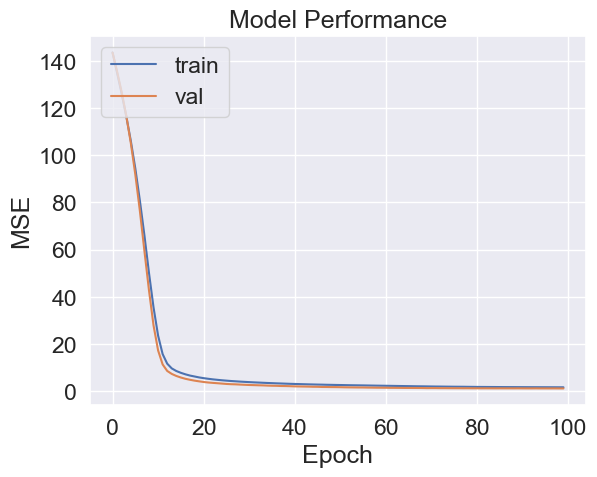

In [117]:
plt.plot(por_history_model3.history['mse'])
plt.plot(por_history_model3.history['val_mse'])
plt.title('Model Performance')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

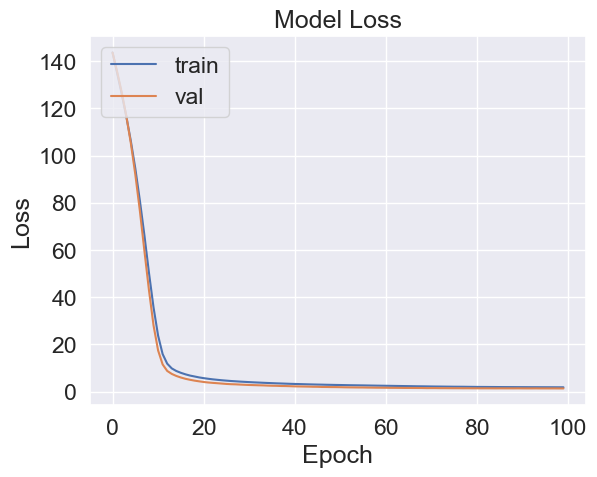

In [118]:
plt.plot(por_history_model3.history['loss'])
plt.plot(por_history_model3.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

<h3>Evaluation (Best Model Performance)</h3>

Model 3, as a the plot of training loss and validation loss decreases to the point of stability. Validation loss also has a small gap with the training loss.
- It also has the lowest MAE among the three models

<h4>Test Set Prediction</h4>

In [123]:
y_pred = model3.predict(scaled_x_test)
y_pred.shape

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step


(130, 1)

In [124]:
print("MAE: ", mean_absolute_error(y_test, y_pred))
print("MSE: ", mean_squared_error(y_test, y_pred))

MAE:  0.8464879127649161
MSE:  1.5628504926585338
